# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this IPython notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

### Import Dog Dataset

In the code cell below, we import a dataset of dog images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `dog_names` - list of string-valued dog breed names for translating labels

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    #print(data['target'])
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    #print(dog_targets)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('Udacity_Projects/dog-project-master/dogImages/train')
valid_files, valid_targets = load_dataset('Udacity_Projects/dog-project-master/dogImages/valid')
test_files, test_targets = load_dataset('Udacity_Projects/dog-project-master/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("Udacity_Projects/dog-project-master/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

C:\Users\Ravi Mittal\Anaconda2\envs\Python35_Environment\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


### Import Human Dataset

In the code cell below, we import a dataset of human images, where the file paths are stored in the numpy array `human_files`.

In [101]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("Udacity_Projects/dog-project-master/lfw/lfw/*/*"))
random.shuffle(human_files)
#print(human_files[3])
print ('statistics about the dataset')
print('There are %d total human images.' % len(human_files))
print('here*1')

statistics about the dataset
There are 13233 total human images.
here*1


---
<a id='step1'></a>
## Step 1: Detect Humans

We use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.

In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

[[ 68  68 116 116]]
Number of faces detected: 1


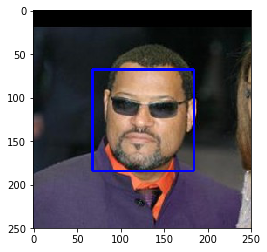

here*1


In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('Udacity_Projects/dog-project-master/haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
#print (img)
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print (gray)
# find faces in image
faces = face_cascade.detectMultiScale(gray)
print (faces)
# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()
print('here*1')

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0
print('here*1')

here*1


### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answers:__

- What percentage of the first 100 images in `human_files` have a detected human face?

**Answer**

    99%
- What percentage of the first 100 images in `dog_files` have a detected human face? 

**Answer**

    12%

In [5]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_faces_detected_count = 0
dog_faces_detected_count = 0

for i in human_files_short:
    if(face_detector(i)):
        human_faces_detected_count=human_faces_detected_count+1


for j in dog_files_short:
    if(face_detector(j)):
        dog_faces_detected_count=dog_faces_detected_count+1

print('No of Human faces detected')
print(human_faces_detected_count)
print('No of Dog faces detected')
print(dog_faces_detected_count)
print('here*1')

No of Human faces detected
99
No of Dog faces detected
12
here*1


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

**Answer**
I think in real world if a person is able to identify that the image is image of human and also be able to identify its face, then alogrithm should be able to accept the image even if it is not very clear view of face.

In [6]:
## (Optional) TODO: Report the performance of another  
## face detection algorithm on the LFW dataset
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a pre-trained [ResNet-50](http://ethereon.github.io/netscope/#/gist/db945b393d40bfa26006) model to detect dogs in images.  Our first line of code downloads the ResNet-50 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  Given an image, this pre-trained ResNet-50 model returns a prediction (derived from the available categories in ImageNet) for the object that is contained in the image.

In [7]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')
print('here*1')

here*1


### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [83]:
from keras.preprocessing import image                
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

print('here*1')

here*1


### Making Predictions with ResNet-50

Getting the 4D tensor ready for ResNet-50, and for any other pre-trained model in Keras, requires some additional processing.  First, the RGB image is converted to BGR by reordering the channels.  All pre-trained models have the additional normalization step that the mean pixel (expressed in RGB as $[103.939, 116.779, 123.68]$ and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.  This is implemented in the imported function `preprocess_input`.  If you're curious, you can check the code for `preprocess_input` [here](https://github.com/fchollet/keras/blob/master/keras/applications/imagenet_utils.py).

Now that we have a way to format our image for supplying to ResNet-50, we are now ready to use the model to extract the predictions.  This is accomplished with the `predict` method, which returns an array whose $i$-th entry is the model's predicted probability that the image belongs to the $i$-th ImageNet category.  This is implemented in the `ResNet50_predict_labels` function below.

By taking the argmax of the predicted probability vector, we obtain an integer corresponding to the model's predicted object class, which we can identify with an object category through the use of this [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a). 

In [78]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))
print('here*1')

here*1


### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [68]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 
#print('here*1')

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answers:__

- What percentage of the images in `human_files_short` have a detected dog? 

**Answer**

    1%
- What percentage of the images in `dog_files_short` have a detected dog?

**Answer**

    100%

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_faces_detected_count=0
dog_faces_detected_count=0

for i in human_files_short:
    if(dog_detector(i)):
        human_faces_detected_count=human_faces_detected_count+1


for j in dog_files_short:
    if(dog_detector(j)):
        dog_faces_detected_count=dog_faces_detected_count+1
        
print('No of images in human_files_short that have a detected dog')
print(human_faces_detected_count)
print('No of images in  dog_files_short that have a detected dog')
print(dog_faces_detected_count)
print('here*1') 

No of images in human_files_short that have a detected dog
1
No of images in  dog_files_short that have a detected dog
100
here*1


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 1%.  In Step 5 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

Be careful with adding too many trainable layers!  More parameters means longer training, which means you are more likely to need a GPU to accelerate the training process.  Thankfully, Keras provides a handy estimate of the time that each epoch is likely to take; you can extrapolate this estimate to figure out how long it will take for your algorithm to train. 

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have great difficulty in distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun! 

### Pre-process the Data

We rescale the images by dividing every pixel in every image by 255.

In [12]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255
print('here*1')

100%|██████████| 836/836 [00:11<00:00, 74.19it/s]


here*1


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ 

We have used 3 Convolutional layers in this architecture. For those three Convolutional layers we have number of filters slowly increase in sequence with 16, 32 and 64 filters respectively.

For first Convolutional layer we had to add additional parameter of input shape=(224, 224, 3) as it would act as input layer. 

I have used widely used architecture of MaxPooling layer after every one or two Convolutional layers (1 in my case). Pooling layers takes Convolutional layers as inputs and are used to reduce dimentionality that in turns reduces chances of overfitting. pool_size=2 show 2X2 window and maximum of each window is taken into account to reduce dimentionality. For both the cases of color and grayscale images, the input array will always be much taller and wider than it is deep.  Our CNN architecture is designed to make the array much deeper than it is tall or wide and Max pooling layer would be used to decrease the spatial dimensions.

activaltion=Relu used in Convolutional layers leaves positive values alone and makes negative value 0, It helps with vanishing Gradient problem and model is able to attain much better accuracy.

Padding = same makes sure that there is no loss of nodes in Convolutional layer during sliding of filters

Stride is the amount by which filter slides over the image, with stride=2, the convolutional layer is approx. half the width and height of the image

Drop out layers are added to minimize overfitting. The value .2 depicts a probabilty that any node in the network can be removed during training

The flatten layer is used to flatten the array to a vector and feed it to one or more fully connected layers to determine what object is contained in the image.

The last layer which is dense layer is having softmax function so that it returns probabilties and it has 133 nodes as per number of folders of images.


Breaking the dataset into three sets - Train, Test and Validation, the model only looks at the training data when deciding how to modify the weights. At every epoch the model checks how it is doing by checking its accuracy on validation set.

We can find the evidence of overfitting where the traing loss starts to decrease but validation loss starts to increase. 

In [14]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

### TODO: Define your architecture.
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2,strides=2, padding='same', activation='relu', 
                        input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(133, activation='softmax'))


model.summary()
print('here*1')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 112, 112, 16)      208       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
__________

### Compile the Model

In [15]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
print('here*1')

here*1


### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [16]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 100

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='Udacity_Projects/dog-project-master/saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

print('here*1')

Train on 6680 samples, validate on 835 samples
Epoch 1/100


4040/6680 [=================>............] - ETA: 10:19 - loss: 4.8357 - acc: 0.0000e+ - ETA: 6:16 - loss: 6.8183 - acc: 0.0000e+00 - ETA: 4:55 - loss: 6.2002 - acc: 0.0000e+0 - ETA: 4:16 - loss: 6.0965 - acc: 0.0000e+0 - ETA: 3:51 - loss: 5.9192 - acc: 0.0100    - ETA: 3:36 - loss: 5.7299 - acc: 0.008 - ETA: 3:24 - loss: 5.6178 - acc: 0.007 - ETA: 3:15 - loss: 5.5594 - acc: 0.006 - ETA: 3:07 - loss: 5.4884 - acc: 0.005 - ETA: 3:01 - loss: 5.4378 - acc: 0.005 - ETA: 2:57 - loss: 5.3869 - acc: 0.009 - ETA: 2:55 - loss: 5.3634 - acc: 0.008 - ETA: 2:52 - loss: 5.3270 - acc: 0.007 - ETA: 2:50 - loss: 5.2947 - acc: 0.007 - ETA: 2:47 - loss: 5.2682 - acc: 0.006 - ETA: 2:46 - loss: 5.2494 - acc: 0.006 - ETA: 2:45 - loss: 5.2269 - acc: 0.005 - ETA: 2:43 - loss: 5.2041 - acc: 0.005 - ETA: 2:42 - loss: 5.1884 - acc: 0.007 - ETA: 2:41 - loss: 5.1730 - acc: 0.007 - ETA: 2:40 - loss: 5.1622 - acc: 0.007 - ETA: 2:39 - loss: 5.1504 - acc: 0.006 - ETA: 2:37 - loss: 5.1372 - acc: 0.006 - ETA: 2:36 - lo

6680/6680 [==============================] - ETA: 57s - loss: 4.8975 - acc: 0.01 - ETA: 57s - loss: 4.8975 - acc: 0.01 - ETA: 56s - loss: 4.8975 - acc: 0.01 - ETA: 56s - loss: 4.8970 - acc: 0.01 - ETA: 55s - loss: 4.8968 - acc: 0.01 - ETA: 55s - loss: 4.8959 - acc: 0.01 - ETA: 54s - loss: 4.8953 - acc: 0.01 - ETA: 54s - loss: 4.8939 - acc: 0.01 - ETA: 53s - loss: 4.8946 - acc: 0.01 - ETA: 53s - loss: 4.8936 - acc: 0.01 - ETA: 53s - loss: 4.8927 - acc: 0.01 - ETA: 52s - loss: 4.8914 - acc: 0.01 - ETA: 52s - loss: 4.8908 - acc: 0.01 - ETA: 51s - loss: 4.8895 - acc: 0.01 - ETA: 51s - loss: 4.8896 - acc: 0.01 - ETA: 50s - loss: 4.8891 - acc: 0.01 - ETA: 50s - loss: 4.8890 - acc: 0.01 - ETA: 49s - loss: 4.8884 - acc: 0.01 - ETA: 49s - loss: 4.8873 - acc: 0.01 - ETA: 49s - loss: 4.8877 - acc: 0.01 - ETA: 48s - loss: 4.8871 - acc: 0.01 - ETA: 48s - loss: 4.8872 - acc: 0.01 - ETA: 47s - loss: 4.8860 - acc: 0.01 - ETA: 47s - loss: 4.8851 - acc: 0.01 - ETA: 46s - loss: 4.8847 - acc: 0.01 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 4.4903 - acc: 0.0000e+0 - ETA: 1:40 - loss: 4.4982 - acc: 0.0000e+0 - ETA: 1:40 - loss: 4.4629 - acc: 0.0167    - ETA: 1:42 - loss: 4.4864 - acc: 0.012 - ETA: 1:42 - loss: 4.4773 - acc: 0.010 - ETA: 1:41 - loss: 4.4808 - acc: 0.016 - ETA: 1:41 - loss: 4.4369 - acc: 0.028 - ETA: 1:41 - loss: 4.4495 - acc: 0.025 - ETA: 1:41 - loss: 4.4498 - acc: 0.022 - ETA: 1:41 - loss: 4.4470 - acc: 0.030 - ETA: 1:40 - loss: 4.4499 - acc: 0.031 - ETA: 1:40 - loss: 4.4217 - acc: 0.033 - ETA: 1:39 - loss: 4.4122 - acc: 0.034 - ETA: 1:39 - loss: 4.4293 - acc: 0.035 - ETA: 1:39 - loss: 4.4104 - acc: 0.033 - ETA: 1:39 - loss: 4.4124 - acc: 0.031 - ETA: 1:38 - loss: 4.3781 - acc: 0.035 - ETA: 1:38 - loss: 4.3530 - acc: 0.038 - ETA: 1:38 - loss: 4.3767 - acc: 0.036 - ETA: 1:38 - loss: 4.3809 - acc: 0.035 - ETA: 1:37 - loss: 4.3664 - acc: 0.035 - ETA: 1:37 - loss: 4.3712 - acc: 0.034 - ETA: 1:37 - loss: 4.3799 - acc: 0.032 - ETA: 1:36 - loss: 4.390

6680/6680 [==============================] - ETA: 39s - loss: 4.3398 - acc: 0.06 - ETA: 39s - loss: 4.3390 - acc: 0.06 - ETA: 39s - loss: 4.3378 - acc: 0.06 - ETA: 38s - loss: 4.3381 - acc: 0.06 - ETA: 38s - loss: 4.3363 - acc: 0.06 - ETA: 38s - loss: 4.3363 - acc: 0.06 - ETA: 37s - loss: 4.3354 - acc: 0.06 - ETA: 37s - loss: 4.3333 - acc: 0.06 - ETA: 37s - loss: 4.3320 - acc: 0.06 - ETA: 37s - loss: 4.3315 - acc: 0.06 - ETA: 36s - loss: 4.3314 - acc: 0.06 - ETA: 36s - loss: 4.3286 - acc: 0.06 - ETA: 36s - loss: 4.3295 - acc: 0.06 - ETA: 35s - loss: 4.3295 - acc: 0.06 - ETA: 35s - loss: 4.3287 - acc: 0.06 - ETA: 35s - loss: 4.3250 - acc: 0.06 - ETA: 34s - loss: 4.3222 - acc: 0.06 - ETA: 34s - loss: 4.3227 - acc: 0.06 - ETA: 34s - loss: 4.3225 - acc: 0.06 - ETA: 33s - loss: 4.3255 - acc: 0.06 - ETA: 33s - loss: 4.3250 - acc: 0.06 - ETA: 33s - loss: 4.3259 - acc: 0.06 - ETA: 32s - loss: 4.3259 - acc: 0.06 - ETA: 32s - loss: 4.3246 - acc: 0.06 - ETA: 32s - loss: 4.3246 - acc: 0.06 - ETA: 

4140/6680 [=================>............] - ETA: 1:47 - loss: 3.9770 - acc: 0.050 - ETA: 1:48 - loss: 3.8514 - acc: 0.125 - ETA: 1:49 - loss: 3.7710 - acc: 0.150 - ETA: 1:49 - loss: 3.8762 - acc: 0.137 - ETA: 1:49 - loss: 3.8603 - acc: 0.140 - ETA: 1:48 - loss: 3.8391 - acc: 0.133 - ETA: 1:48 - loss: 3.8287 - acc: 0.128 - ETA: 1:48 - loss: 3.7877 - acc: 0.125 - ETA: 1:47 - loss: 3.7895 - acc: 0.138 - ETA: 1:46 - loss: 3.7633 - acc: 0.130 - ETA: 1:45 - loss: 3.8128 - acc: 0.127 - ETA: 1:44 - loss: 3.7740 - acc: 0.137 - ETA: 1:44 - loss: 3.7763 - acc: 0.142 - ETA: 1:43 - loss: 3.7864 - acc: 0.135 - ETA: 1:43 - loss: 3.7610 - acc: 0.140 - ETA: 1:42 - loss: 3.7860 - acc: 0.137 - ETA: 1:42 - loss: 3.7929 - acc: 0.135 - ETA: 1:41 - loss: 3.7816 - acc: 0.136 - ETA: 1:41 - loss: 3.7664 - acc: 0.134 - ETA: 1:40 - loss: 3.7556 - acc: 0.137 - ETA: 1:40 - loss: 3.7579 - acc: 0.138 - ETA: 1:39 - loss: 3.7900 - acc: 0.131 - ETA: 1:39 - loss: 3.8000 - acc: 0.130 - ETA: 1:38 - loss: 3.7757 - acc: 0.1

6680/6680 [==============================] - ETA: 40s - loss: 3.7429 - acc: 0.13 - ETA: 39s - loss: 3.7450 - acc: 0.13 - ETA: 39s - loss: 3.7450 - acc: 0.13 - ETA: 39s - loss: 3.7463 - acc: 0.13 - ETA: 38s - loss: 3.7476 - acc: 0.13 - ETA: 38s - loss: 3.7448 - acc: 0.13 - ETA: 38s - loss: 3.7437 - acc: 0.13 - ETA: 37s - loss: 3.7453 - acc: 0.13 - ETA: 37s - loss: 3.7471 - acc: 0.13 - ETA: 37s - loss: 3.7475 - acc: 0.13 - ETA: 37s - loss: 3.7516 - acc: 0.13 - ETA: 36s - loss: 3.7502 - acc: 0.13 - ETA: 36s - loss: 3.7510 - acc: 0.13 - ETA: 36s - loss: 3.7527 - acc: 0.13 - ETA: 35s - loss: 3.7518 - acc: 0.13 - ETA: 35s - loss: 3.7522 - acc: 0.13 - ETA: 35s - loss: 3.7537 - acc: 0.13 - ETA: 34s - loss: 3.7542 - acc: 0.13 - ETA: 34s - loss: 3.7527 - acc: 0.13 - ETA: 34s - loss: 3.7516 - acc: 0.13 - ETA: 33s - loss: 3.7531 - acc: 0.13 - ETA: 33s - loss: 3.7523 - acc: 0.13 - ETA: 33s - loss: 3.7523 - acc: 0.13 - ETA: 32s - loss: 3.7510 - acc: 0.13 - ETA: 32s - loss: 3.7504 - acc: 0.13 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 3.2804 - acc: 0.300 - ETA: 1:39 - loss: 3.1753 - acc: 0.275 - ETA: 1:39 - loss: 3.1953 - acc: 0.283 - ETA: 1:40 - loss: 3.2883 - acc: 0.262 - ETA: 1:40 - loss: 3.3094 - acc: 0.260 - ETA: 1:40 - loss: 3.2077 - acc: 0.283 - ETA: 1:41 - loss: 3.1808 - acc: 0.292 - ETA: 1:40 - loss: 3.2250 - acc: 0.275 - ETA: 1:41 - loss: 3.1942 - acc: 0.272 - ETA: 1:41 - loss: 3.1207 - acc: 0.290 - ETA: 1:42 - loss: 3.1367 - acc: 0.277 - ETA: 1:42 - loss: 3.1464 - acc: 0.275 - ETA: 1:42 - loss: 3.1511 - acc: 0.257 - ETA: 1:42 - loss: 3.1157 - acc: 0.264 - ETA: 1:42 - loss: 3.0811 - acc: 0.276 - ETA: 1:42 - loss: 3.0583 - acc: 0.278 - ETA: 1:42 - loss: 3.0621 - acc: 0.276 - ETA: 1:41 - loss: 3.0814 - acc: 0.275 - ETA: 1:41 - loss: 3.0982 - acc: 0.268 - ETA: 1:40 - loss: 3.0748 - acc: 0.272 - ETA: 1:40 - loss: 3.0840 - acc: 0.273 - ETA: 1:40 - loss: 3.0936 - acc: 0.268 - ETA: 1:39 - loss: 3.0655 - acc: 0.278 - ETA: 1:39 - loss: 3.0702 - acc: 0.2

6680/6680 [==============================] - ETA: 39s - loss: 3.0632 - acc: 0.27 - ETA: 39s - loss: 3.0625 - acc: 0.27 - ETA: 39s - loss: 3.0618 - acc: 0.27 - ETA: 38s - loss: 3.0606 - acc: 0.27 - ETA: 38s - loss: 3.0596 - acc: 0.27 - ETA: 38s - loss: 3.0604 - acc: 0.27 - ETA: 37s - loss: 3.0582 - acc: 0.27 - ETA: 37s - loss: 3.0558 - acc: 0.27 - ETA: 37s - loss: 3.0576 - acc: 0.27 - ETA: 37s - loss: 3.0550 - acc: 0.27 - ETA: 36s - loss: 3.0580 - acc: 0.27 - ETA: 36s - loss: 3.0584 - acc: 0.27 - ETA: 36s - loss: 3.0590 - acc: 0.27 - ETA: 35s - loss: 3.0593 - acc: 0.27 - ETA: 35s - loss: 3.0597 - acc: 0.27 - ETA: 35s - loss: 3.0601 - acc: 0.27 - ETA: 34s - loss: 3.0597 - acc: 0.27 - ETA: 34s - loss: 3.0578 - acc: 0.27 - ETA: 34s - loss: 3.0576 - acc: 0.27 - ETA: 33s - loss: 3.0584 - acc: 0.27 - ETA: 33s - loss: 3.0575 - acc: 0.27 - ETA: 33s - loss: 3.0575 - acc: 0.27 - ETA: 32s - loss: 3.0611 - acc: 0.27 - ETA: 32s - loss: 3.0602 - acc: 0.27 - ETA: 32s - loss: 3.0601 - acc: 0.27 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 2.2948 - acc: 0.600 - ETA: 1:41 - loss: 2.3495 - acc: 0.525 - ETA: 1:42 - loss: 2.3148 - acc: 0.500 - ETA: 1:41 - loss: 2.2081 - acc: 0.525 - ETA: 1:41 - loss: 2.1488 - acc: 0.530 - ETA: 1:42 - loss: 2.2237 - acc: 0.516 - ETA: 1:41 - loss: 2.2556 - acc: 0.507 - ETA: 1:41 - loss: 2.2192 - acc: 0.500 - ETA: 1:41 - loss: 2.2571 - acc: 0.494 - ETA: 1:41 - loss: 2.2531 - acc: 0.485 - ETA: 1:40 - loss: 2.2608 - acc: 0.477 - ETA: 1:40 - loss: 2.2268 - acc: 0.483 - ETA: 1:40 - loss: 2.1779 - acc: 0.496 - ETA: 1:39 - loss: 2.2076 - acc: 0.489 - ETA: 1:39 - loss: 2.2335 - acc: 0.480 - ETA: 1:39 - loss: 2.2545 - acc: 0.475 - ETA: 1:38 - loss: 2.2414 - acc: 0.482 - ETA: 1:38 - loss: 2.2272 - acc: 0.486 - ETA: 1:38 - loss: 2.1981 - acc: 0.489 - ETA: 1:38 - loss: 2.1966 - acc: 0.485 - ETA: 1:38 - loss: 2.2229 - acc: 0.478 - ETA: 1:38 - loss: 2.2153 - acc: 0.477 - ETA: 1:38 - loss: 2.2153 - acc: 0.469 - ETA: 1:38 - loss: 2.1999 - acc: 0.4

6680/6680 [==============================] - ETA: 39s - loss: 2.2314 - acc: 0.44 - ETA: 39s - loss: 2.2339 - acc: 0.44 - ETA: 39s - loss: 2.2342 - acc: 0.44 - ETA: 38s - loss: 2.2339 - acc: 0.44 - ETA: 38s - loss: 2.2363 - acc: 0.44 - ETA: 38s - loss: 2.2349 - acc: 0.44 - ETA: 37s - loss: 2.2342 - acc: 0.44 - ETA: 37s - loss: 2.2377 - acc: 0.44 - ETA: 37s - loss: 2.2367 - acc: 0.44 - ETA: 37s - loss: 2.2377 - acc: 0.44 - ETA: 36s - loss: 2.2378 - acc: 0.44 - ETA: 36s - loss: 2.2374 - acc: 0.44 - ETA: 36s - loss: 2.2372 - acc: 0.44 - ETA: 35s - loss: 2.2347 - acc: 0.44 - ETA: 35s - loss: 2.2369 - acc: 0.44 - ETA: 35s - loss: 2.2348 - acc: 0.44 - ETA: 34s - loss: 2.2339 - acc: 0.44 - ETA: 34s - loss: 2.2369 - acc: 0.44 - ETA: 34s - loss: 2.2357 - acc: 0.44 - ETA: 33s - loss: 2.2354 - acc: 0.44 - ETA: 33s - loss: 2.2366 - acc: 0.44 - ETA: 33s - loss: 2.2393 - acc: 0.44 - ETA: 33s - loss: 2.2425 - acc: 0.44 - ETA: 32s - loss: 2.2455 - acc: 0.44 - ETA: 32s - loss: 2.2440 - acc: 0.44 - ETA: 

4140/6680 [=================>............] - ETA: 1:43 - loss: 1.2269 - acc: 0.750 - ETA: 1:44 - loss: 1.5231 - acc: 0.625 - ETA: 1:44 - loss: 1.7033 - acc: 0.566 - ETA: 1:45 - loss: 1.5676 - acc: 0.600 - ETA: 1:45 - loss: 1.5714 - acc: 0.590 - ETA: 1:45 - loss: 1.4937 - acc: 0.608 - ETA: 1:45 - loss: 1.4476 - acc: 0.628 - ETA: 1:44 - loss: 1.4824 - acc: 0.606 - ETA: 1:44 - loss: 1.4887 - acc: 0.605 - ETA: 1:43 - loss: 1.4973 - acc: 0.600 - ETA: 1:43 - loss: 1.4740 - acc: 0.595 - ETA: 1:43 - loss: 1.4206 - acc: 0.612 - ETA: 1:42 - loss: 1.4536 - acc: 0.603 - ETA: 1:42 - loss: 1.4276 - acc: 0.607 - ETA: 1:42 - loss: 1.3824 - acc: 0.626 - ETA: 1:41 - loss: 1.4202 - acc: 0.615 - ETA: 1:41 - loss: 1.3893 - acc: 0.629 - ETA: 1:40 - loss: 1.3985 - acc: 0.633 - ETA: 1:40 - loss: 1.4040 - acc: 0.634 - ETA: 1:39 - loss: 1.4045 - acc: 0.637 - ETA: 1:39 - loss: 1.3989 - acc: 0.635 - ETA: 1:39 - loss: 1.4022 - acc: 0.636 - ETA: 1:38 - loss: 1.3776 - acc: 0.643 - ETA: 1:38 - loss: 1.3951 - acc: 0.6

6680/6680 [==============================] - ETA: 40s - loss: 1.4299 - acc: 0.63 - ETA: 39s - loss: 1.4300 - acc: 0.63 - ETA: 39s - loss: 1.4315 - acc: 0.63 - ETA: 39s - loss: 1.4335 - acc: 0.63 - ETA: 38s - loss: 1.4337 - acc: 0.63 - ETA: 38s - loss: 1.4382 - acc: 0.63 - ETA: 38s - loss: 1.4353 - acc: 0.63 - ETA: 37s - loss: 1.4332 - acc: 0.63 - ETA: 37s - loss: 1.4322 - acc: 0.63 - ETA: 37s - loss: 1.4311 - acc: 0.63 - ETA: 36s - loss: 1.4327 - acc: 0.63 - ETA: 36s - loss: 1.4323 - acc: 0.63 - ETA: 36s - loss: 1.4310 - acc: 0.63 - ETA: 35s - loss: 1.4281 - acc: 0.63 - ETA: 35s - loss: 1.4287 - acc: 0.63 - ETA: 35s - loss: 1.4285 - acc: 0.63 - ETA: 34s - loss: 1.4281 - acc: 0.63 - ETA: 34s - loss: 1.4275 - acc: 0.63 - ETA: 34s - loss: 1.4268 - acc: 0.63 - ETA: 33s - loss: 1.4256 - acc: 0.63 - ETA: 33s - loss: 1.4276 - acc: 0.63 - ETA: 33s - loss: 1.4266 - acc: 0.63 - ETA: 32s - loss: 1.4283 - acc: 0.63 - ETA: 32s - loss: 1.4293 - acc: 0.63 - ETA: 32s - loss: 1.4304 - acc: 0.63 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.6336 - acc: 0.900 - ETA: 1:42 - loss: 0.7131 - acc: 0.875 - ETA: 1:42 - loss: 0.7158 - acc: 0.866 - ETA: 1:41 - loss: 0.6747 - acc: 0.862 - ETA: 1:41 - loss: 0.6165 - acc: 0.880 - ETA: 1:41 - loss: 0.6400 - acc: 0.891 - ETA: 1:40 - loss: 0.6382 - acc: 0.892 - ETA: 1:40 - loss: 0.6331 - acc: 0.887 - ETA: 1:40 - loss: 0.6203 - acc: 0.883 - ETA: 1:40 - loss: 0.6396 - acc: 0.870 - ETA: 1:40 - loss: 0.6235 - acc: 0.868 - ETA: 1:39 - loss: 0.6261 - acc: 0.870 - ETA: 1:39 - loss: 0.6559 - acc: 0.865 - ETA: 1:39 - loss: 0.6543 - acc: 0.864 - ETA: 1:39 - loss: 0.6637 - acc: 0.860 - ETA: 1:38 - loss: 0.6598 - acc: 0.859 - ETA: 1:38 - loss: 0.6605 - acc: 0.855 - ETA: 1:38 - loss: 0.6551 - acc: 0.855 - ETA: 1:37 - loss: 0.6613 - acc: 0.852 - ETA: 1:37 - loss: 0.6522 - acc: 0.855 - ETA: 1:37 - loss: 0.6687 - acc: 0.845 - ETA: 1:36 - loss: 0.6572 - acc: 0.850 - ETA: 1:36 - loss: 0.6615 - acc: 0.845 - ETA: 1:36 - loss: 0.6635 - acc: 0.8

6680/6680 [==============================] - ETA: 40s - loss: 0.7770 - acc: 0.79 - ETA: 40s - loss: 0.7775 - acc: 0.79 - ETA: 39s - loss: 0.7777 - acc: 0.79 - ETA: 39s - loss: 0.7786 - acc: 0.79 - ETA: 39s - loss: 0.7782 - acc: 0.79 - ETA: 38s - loss: 0.7771 - acc: 0.79 - ETA: 38s - loss: 0.7777 - acc: 0.79 - ETA: 38s - loss: 0.7763 - acc: 0.79 - ETA: 37s - loss: 0.7765 - acc: 0.79 - ETA: 37s - loss: 0.7787 - acc: 0.79 - ETA: 37s - loss: 0.7778 - acc: 0.79 - ETA: 36s - loss: 0.7794 - acc: 0.79 - ETA: 36s - loss: 0.7827 - acc: 0.79 - ETA: 36s - loss: 0.7812 - acc: 0.79 - ETA: 35s - loss: 0.7801 - acc: 0.79 - ETA: 35s - loss: 0.7799 - acc: 0.79 - ETA: 35s - loss: 0.7801 - acc: 0.79 - ETA: 34s - loss: 0.7796 - acc: 0.79 - ETA: 34s - loss: 0.7813 - acc: 0.79 - ETA: 34s - loss: 0.7830 - acc: 0.79 - ETA: 33s - loss: 0.7859 - acc: 0.79 - ETA: 33s - loss: 0.7876 - acc: 0.79 - ETA: 33s - loss: 0.7881 - acc: 0.79 - ETA: 32s - loss: 0.7885 - acc: 0.79 - ETA: 32s - loss: 0.7897 - acc: 0.79 - ETA: 

4140/6680 [=================>............] - ETA: 1:42 - loss: 0.6267 - acc: 0.900 - ETA: 1:41 - loss: 0.5452 - acc: 0.925 - ETA: 1:41 - loss: 0.4891 - acc: 0.916 - ETA: 1:41 - loss: 0.4652 - acc: 0.925 - ETA: 1:41 - loss: 0.4656 - acc: 0.910 - ETA: 1:41 - loss: 0.4147 - acc: 0.916 - ETA: 1:41 - loss: 0.4420 - acc: 0.907 - ETA: 1:41 - loss: 0.4574 - acc: 0.900 - ETA: 1:40 - loss: 0.4531 - acc: 0.905 - ETA: 1:40 - loss: 0.4347 - acc: 0.905 - ETA: 1:40 - loss: 0.4007 - acc: 0.913 - ETA: 1:40 - loss: 0.3994 - acc: 0.908 - ETA: 1:39 - loss: 0.4095 - acc: 0.907 - ETA: 1:39 - loss: 0.4017 - acc: 0.907 - ETA: 1:39 - loss: 0.3917 - acc: 0.906 - ETA: 1:39 - loss: 0.4406 - acc: 0.900 - ETA: 1:38 - loss: 0.4608 - acc: 0.894 - ETA: 1:38 - loss: 0.4689 - acc: 0.891 - ETA: 1:38 - loss: 0.4571 - acc: 0.897 - ETA: 1:38 - loss: 0.4525 - acc: 0.897 - ETA: 1:37 - loss: 0.4442 - acc: 0.897 - ETA: 1:37 - loss: 0.4447 - acc: 0.893 - ETA: 1:37 - loss: 0.4421 - acc: 0.891 - ETA: 1:36 - loss: 0.4299 - acc: 0.8

6680/6680 [==============================] - ETA: 40s - loss: 0.4731 - acc: 0.87 - ETA: 40s - loss: 0.4730 - acc: 0.87 - ETA: 39s - loss: 0.4717 - acc: 0.87 - ETA: 39s - loss: 0.4727 - acc: 0.87 - ETA: 39s - loss: 0.4723 - acc: 0.87 - ETA: 38s - loss: 0.4722 - acc: 0.87 - ETA: 38s - loss: 0.4740 - acc: 0.87 - ETA: 38s - loss: 0.4737 - acc: 0.87 - ETA: 37s - loss: 0.4723 - acc: 0.87 - ETA: 37s - loss: 0.4726 - acc: 0.87 - ETA: 37s - loss: 0.4713 - acc: 0.87 - ETA: 36s - loss: 0.4728 - acc: 0.87 - ETA: 36s - loss: 0.4738 - acc: 0.87 - ETA: 36s - loss: 0.4737 - acc: 0.87 - ETA: 35s - loss: 0.4734 - acc: 0.87 - ETA: 35s - loss: 0.4740 - acc: 0.87 - ETA: 35s - loss: 0.4749 - acc: 0.87 - ETA: 34s - loss: 0.4756 - acc: 0.87 - ETA: 34s - loss: 0.4754 - acc: 0.87 - ETA: 34s - loss: 0.4743 - acc: 0.87 - ETA: 33s - loss: 0.4748 - acc: 0.87 - ETA: 33s - loss: 0.4751 - acc: 0.87 - ETA: 33s - loss: 0.4754 - acc: 0.87 - ETA: 32s - loss: 0.4742 - acc: 0.87 - ETA: 32s - loss: 0.4729 - acc: 0.87 - ETA: 

4140/6680 [=================>............] - ETA: 1:44 - loss: 0.0788 - acc: 1.000 - ETA: 1:47 - loss: 0.1231 - acc: 0.975 - ETA: 1:47 - loss: 0.1451 - acc: 0.966 - ETA: 1:46 - loss: 0.1666 - acc: 0.950 - ETA: 1:45 - loss: 0.1494 - acc: 0.960 - ETA: 1:44 - loss: 0.1706 - acc: 0.941 - ETA: 1:43 - loss: 0.1686 - acc: 0.935 - ETA: 1:42 - loss: 0.1649 - acc: 0.943 - ETA: 1:43 - loss: 0.1707 - acc: 0.944 - ETA: 1:42 - loss: 0.1775 - acc: 0.945 - ETA: 1:42 - loss: 0.1879 - acc: 0.945 - ETA: 1:41 - loss: 0.1826 - acc: 0.945 - ETA: 1:41 - loss: 0.1774 - acc: 0.950 - ETA: 1:40 - loss: 0.1929 - acc: 0.946 - ETA: 1:40 - loss: 0.2035 - acc: 0.946 - ETA: 1:40 - loss: 0.2146 - acc: 0.937 - ETA: 1:39 - loss: 0.2306 - acc: 0.935 - ETA: 1:39 - loss: 0.2321 - acc: 0.933 - ETA: 1:38 - loss: 0.2318 - acc: 0.934 - ETA: 1:38 - loss: 0.2399 - acc: 0.930 - ETA: 1:38 - loss: 0.2323 - acc: 0.933 - ETA: 1:37 - loss: 0.2288 - acc: 0.936 - ETA: 1:37 - loss: 0.2264 - acc: 0.939 - ETA: 1:36 - loss: 0.2195 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.3066 - acc: 0.91 - ETA: 39s - loss: 0.3061 - acc: 0.91 - ETA: 38s - loss: 0.3061 - acc: 0.91 - ETA: 38s - loss: 0.3059 - acc: 0.91 - ETA: 38s - loss: 0.3057 - acc: 0.91 - ETA: 37s - loss: 0.3066 - acc: 0.91 - ETA: 37s - loss: 0.3057 - acc: 0.91 - ETA: 37s - loss: 0.3083 - acc: 0.91 - ETA: 36s - loss: 0.3085 - acc: 0.91 - ETA: 36s - loss: 0.3080 - acc: 0.91 - ETA: 36s - loss: 0.3080 - acc: 0.91 - ETA: 35s - loss: 0.3082 - acc: 0.91 - ETA: 35s - loss: 0.3093 - acc: 0.91 - ETA: 35s - loss: 0.3090 - acc: 0.91 - ETA: 34s - loss: 0.3095 - acc: 0.91 - ETA: 34s - loss: 0.3091 - acc: 0.91 - ETA: 34s - loss: 0.3093 - acc: 0.91 - ETA: 34s - loss: 0.3089 - acc: 0.91 - ETA: 33s - loss: 0.3092 - acc: 0.91 - ETA: 33s - loss: 0.3098 - acc: 0.91 - ETA: 33s - loss: 0.3095 - acc: 0.91 - ETA: 32s - loss: 0.3096 - acc: 0.91 - ETA: 32s - loss: 0.3112 - acc: 0.91 - ETA: 32s - loss: 0.3102 - acc: 0.91 - ETA: 31s - loss: 0.3112 - acc: 0.91 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.8876 - acc: 0.750 - ETA: 1:40 - loss: 0.6873 - acc: 0.825 - ETA: 1:40 - loss: 0.6381 - acc: 0.850 - ETA: 1:40 - loss: 0.5388 - acc: 0.875 - ETA: 1:40 - loss: 0.4557 - acc: 0.890 - ETA: 1:41 - loss: 0.3933 - acc: 0.900 - ETA: 1:43 - loss: 0.3942 - acc: 0.907 - ETA: 1:42 - loss: 0.3607 - acc: 0.918 - ETA: 1:41 - loss: 0.3393 - acc: 0.916 - ETA: 1:41 - loss: 0.3303 - acc: 0.920 - ETA: 1:40 - loss: 0.3130 - acc: 0.922 - ETA: 1:40 - loss: 0.2937 - acc: 0.929 - ETA: 1:41 - loss: 0.2771 - acc: 0.934 - ETA: 1:41 - loss: 0.2679 - acc: 0.935 - ETA: 1:41 - loss: 0.2659 - acc: 0.933 - ETA: 1:41 - loss: 0.2543 - acc: 0.934 - ETA: 1:41 - loss: 0.2521 - acc: 0.932 - ETA: 1:41 - loss: 0.2454 - acc: 0.933 - ETA: 1:41 - loss: 0.2463 - acc: 0.934 - ETA: 1:40 - loss: 0.2414 - acc: 0.932 - ETA: 1:40 - loss: 0.2345 - acc: 0.933 - ETA: 1:40 - loss: 0.2268 - acc: 0.936 - ETA: 1:39 - loss: 0.2306 - acc: 0.934 - ETA: 1:39 - loss: 0.2255 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.2451 - acc: 0.93 - ETA: 38s - loss: 0.2458 - acc: 0.93 - ETA: 38s - loss: 0.2456 - acc: 0.93 - ETA: 38s - loss: 0.2457 - acc: 0.93 - ETA: 38s - loss: 0.2447 - acc: 0.93 - ETA: 37s - loss: 0.2439 - acc: 0.93 - ETA: 37s - loss: 0.2432 - acc: 0.93 - ETA: 37s - loss: 0.2432 - acc: 0.93 - ETA: 36s - loss: 0.2440 - acc: 0.93 - ETA: 36s - loss: 0.2473 - acc: 0.93 - ETA: 36s - loss: 0.2489 - acc: 0.93 - ETA: 35s - loss: 0.2483 - acc: 0.93 - ETA: 35s - loss: 0.2492 - acc: 0.93 - ETA: 35s - loss: 0.2501 - acc: 0.93 - ETA: 34s - loss: 0.2514 - acc: 0.93 - ETA: 34s - loss: 0.2531 - acc: 0.93 - ETA: 34s - loss: 0.2528 - acc: 0.93 - ETA: 34s - loss: 0.2521 - acc: 0.93 - ETA: 33s - loss: 0.2521 - acc: 0.93 - ETA: 33s - loss: 0.2519 - acc: 0.93 - ETA: 33s - loss: 0.2522 - acc: 0.93 - ETA: 32s - loss: 0.2518 - acc: 0.93 - ETA: 32s - loss: 0.2513 - acc: 0.93 - ETA: 32s - loss: 0.2512 - acc: 0.93 - ETA: 31s - loss: 0.2519 - acc: 0.93 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.0416 - acc: 1.000 - ETA: 1:39 - loss: 0.0638 - acc: 0.975 - ETA: 1:40 - loss: 0.0573 - acc: 0.983 - ETA: 1:40 - loss: 0.0471 - acc: 0.987 - ETA: 1:40 - loss: 0.0410 - acc: 0.990 - ETA: 1:40 - loss: 0.0551 - acc: 0.983 - ETA: 1:39 - loss: 0.0596 - acc: 0.978 - ETA: 1:39 - loss: 0.0703 - acc: 0.975 - ETA: 1:39 - loss: 0.0640 - acc: 0.977 - ETA: 1:39 - loss: 0.0606 - acc: 0.980 - ETA: 1:38 - loss: 0.0633 - acc: 0.981 - ETA: 1:38 - loss: 0.0592 - acc: 0.983 - ETA: 1:38 - loss: 0.0615 - acc: 0.980 - ETA: 1:37 - loss: 0.0673 - acc: 0.975 - ETA: 1:37 - loss: 0.0657 - acc: 0.976 - ETA: 1:37 - loss: 0.0628 - acc: 0.978 - ETA: 1:37 - loss: 0.0799 - acc: 0.973 - ETA: 1:37 - loss: 0.0911 - acc: 0.972 - ETA: 1:36 - loss: 0.0927 - acc: 0.971 - ETA: 1:36 - loss: 0.1255 - acc: 0.962 - ETA: 1:36 - loss: 0.1234 - acc: 0.964 - ETA: 1:35 - loss: 0.1203 - acc: 0.963 - ETA: 1:35 - loss: 0.1164 - acc: 0.965 - ETA: 1:35 - loss: 0.1205 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.1806 - acc: 0.95 - ETA: 39s - loss: 0.1807 - acc: 0.95 - ETA: 38s - loss: 0.1803 - acc: 0.95 - ETA: 38s - loss: 0.1818 - acc: 0.95 - ETA: 38s - loss: 0.1816 - acc: 0.95 - ETA: 37s - loss: 0.1812 - acc: 0.95 - ETA: 37s - loss: 0.1810 - acc: 0.95 - ETA: 37s - loss: 0.1812 - acc: 0.95 - ETA: 36s - loss: 0.1827 - acc: 0.95 - ETA: 36s - loss: 0.1826 - acc: 0.95 - ETA: 36s - loss: 0.1824 - acc: 0.95 - ETA: 35s - loss: 0.1820 - acc: 0.95 - ETA: 35s - loss: 0.1815 - acc: 0.95 - ETA: 35s - loss: 0.1815 - acc: 0.95 - ETA: 34s - loss: 0.1822 - acc: 0.95 - ETA: 34s - loss: 0.1818 - acc: 0.95 - ETA: 34s - loss: 0.1815 - acc: 0.95 - ETA: 33s - loss: 0.1817 - acc: 0.95 - ETA: 33s - loss: 0.1825 - acc: 0.94 - ETA: 33s - loss: 0.1831 - acc: 0.94 - ETA: 33s - loss: 0.1830 - acc: 0.94 - ETA: 32s - loss: 0.1829 - acc: 0.94 - ETA: 32s - loss: 0.1828 - acc: 0.94 - ETA: 32s - loss: 0.1831 - acc: 0.94 - ETA: 31s - loss: 0.1852 - acc: 0.94 - ETA: 

4140/6680 [=================>............] - ETA: 1:44 - loss: 0.0555 - acc: 0.950 - ETA: 1:42 - loss: 0.1038 - acc: 0.950 - ETA: 1:42 - loss: 0.1176 - acc: 0.950 - ETA: 1:41 - loss: 0.1336 - acc: 0.950 - ETA: 1:41 - loss: 0.1163 - acc: 0.960 - ETA: 1:41 - loss: 0.1077 - acc: 0.958 - ETA: 1:40 - loss: 0.0976 - acc: 0.964 - ETA: 1:40 - loss: 0.0930 - acc: 0.962 - ETA: 1:39 - loss: 0.1273 - acc: 0.961 - ETA: 1:39 - loss: 0.1199 - acc: 0.960 - ETA: 1:38 - loss: 0.1134 - acc: 0.963 - ETA: 1:38 - loss: 0.1050 - acc: 0.966 - ETA: 1:38 - loss: 0.1040 - acc: 0.965 - ETA: 1:37 - loss: 0.1011 - acc: 0.967 - ETA: 1:37 - loss: 0.0956 - acc: 0.970 - ETA: 1:37 - loss: 0.0902 - acc: 0.971 - ETA: 1:37 - loss: 0.0852 - acc: 0.973 - ETA: 1:36 - loss: 0.0809 - acc: 0.975 - ETA: 1:36 - loss: 0.0781 - acc: 0.976 - ETA: 1:36 - loss: 0.0842 - acc: 0.975 - ETA: 1:35 - loss: 0.0813 - acc: 0.976 - ETA: 1:35 - loss: 0.0778 - acc: 0.977 - ETA: 1:35 - loss: 0.0818 - acc: 0.976 - ETA: 1:35 - loss: 0.0842 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.1415 - acc: 0.96 - ETA: 38s - loss: 0.1410 - acc: 0.96 - ETA: 38s - loss: 0.1404 - acc: 0.96 - ETA: 38s - loss: 0.1402 - acc: 0.96 - ETA: 38s - loss: 0.1398 - acc: 0.96 - ETA: 37s - loss: 0.1392 - acc: 0.96 - ETA: 37s - loss: 0.1389 - acc: 0.96 - ETA: 37s - loss: 0.1397 - acc: 0.96 - ETA: 36s - loss: 0.1393 - acc: 0.96 - ETA: 36s - loss: 0.1390 - acc: 0.96 - ETA: 36s - loss: 0.1388 - acc: 0.96 - ETA: 35s - loss: 0.1388 - acc: 0.96 - ETA: 35s - loss: 0.1386 - acc: 0.96 - ETA: 35s - loss: 0.1380 - acc: 0.96 - ETA: 34s - loss: 0.1376 - acc: 0.96 - ETA: 34s - loss: 0.1373 - acc: 0.96 - ETA: 34s - loss: 0.1374 - acc: 0.96 - ETA: 33s - loss: 0.1370 - acc: 0.96 - ETA: 33s - loss: 0.1368 - acc: 0.96 - ETA: 33s - loss: 0.1373 - acc: 0.96 - ETA: 32s - loss: 0.1369 - acc: 0.96 - ETA: 32s - loss: 0.1370 - acc: 0.96 - ETA: 32s - loss: 0.1366 - acc: 0.96 - ETA: 32s - loss: 0.1390 - acc: 0.96 - ETA: 31s - loss: 0.1389 - acc: 0.96 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.0748 - acc: 1.000 - ETA: 1:39 - loss: 0.0389 - acc: 1.000 - ETA: 1:39 - loss: 0.0276 - acc: 1.000 - ETA: 1:39 - loss: 0.0281 - acc: 1.000 - ETA: 1:39 - loss: 0.0664 - acc: 0.990 - ETA: 1:40 - loss: 0.0652 - acc: 0.991 - ETA: 1:39 - loss: 0.0645 - acc: 0.992 - ETA: 1:40 - loss: 0.1125 - acc: 0.987 - ETA: 1:41 - loss: 0.1003 - acc: 0.988 - ETA: 1:41 - loss: 0.0951 - acc: 0.990 - ETA: 1:41 - loss: 0.1065 - acc: 0.986 - ETA: 1:42 - loss: 0.1136 - acc: 0.983 - ETA: 1:42 - loss: 0.1204 - acc: 0.976 - ETA: 1:42 - loss: 0.1126 - acc: 0.978 - ETA: 1:42 - loss: 0.1135 - acc: 0.976 - ETA: 1:41 - loss: 0.1198 - acc: 0.971 - ETA: 1:41 - loss: 0.1200 - acc: 0.970 - ETA: 1:40 - loss: 0.1459 - acc: 0.963 - ETA: 1:40 - loss: 0.1421 - acc: 0.963 - ETA: 1:39 - loss: 0.1427 - acc: 0.962 - ETA: 1:39 - loss: 0.1533 - acc: 0.959 - ETA: 1:38 - loss: 0.1480 - acc: 0.961 - ETA: 1:38 - loss: 0.1431 - acc: 0.963 - ETA: 1:37 - loss: 0.1648 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.1449 - acc: 0.96 - ETA: 38s - loss: 0.1444 - acc: 0.96 - ETA: 38s - loss: 0.1455 - acc: 0.96 - ETA: 38s - loss: 0.1454 - acc: 0.96 - ETA: 37s - loss: 0.1457 - acc: 0.96 - ETA: 37s - loss: 0.1451 - acc: 0.96 - ETA: 37s - loss: 0.1467 - acc: 0.96 - ETA: 37s - loss: 0.1460 - acc: 0.96 - ETA: 36s - loss: 0.1455 - acc: 0.96 - ETA: 36s - loss: 0.1451 - acc: 0.96 - ETA: 36s - loss: 0.1452 - acc: 0.96 - ETA: 35s - loss: 0.1446 - acc: 0.96 - ETA: 35s - loss: 0.1440 - acc: 0.96 - ETA: 35s - loss: 0.1434 - acc: 0.96 - ETA: 34s - loss: 0.1428 - acc: 0.96 - ETA: 34s - loss: 0.1422 - acc: 0.96 - ETA: 34s - loss: 0.1417 - acc: 0.96 - ETA: 33s - loss: 0.1424 - acc: 0.96 - ETA: 33s - loss: 0.1418 - acc: 0.96 - ETA: 33s - loss: 0.1412 - acc: 0.96 - ETA: 33s - loss: 0.1434 - acc: 0.96 - ETA: 32s - loss: 0.1437 - acc: 0.96 - ETA: 32s - loss: 0.1433 - acc: 0.96 - ETA: 32s - loss: 0.1462 - acc: 0.96 - ETA: 31s - loss: 0.1457 - acc: 0.96 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 0.0542 - acc: 0.950 - ETA: 1:40 - loss: 0.1128 - acc: 0.950 - ETA: 1:40 - loss: 0.0903 - acc: 0.966 - ETA: 1:40 - loss: 0.1704 - acc: 0.962 - ETA: 1:40 - loss: 0.1680 - acc: 0.960 - ETA: 1:40 - loss: 0.1429 - acc: 0.966 - ETA: 1:39 - loss: 0.1341 - acc: 0.964 - ETA: 1:40 - loss: 0.1198 - acc: 0.968 - ETA: 1:39 - loss: 0.1287 - acc: 0.966 - ETA: 1:39 - loss: 0.1195 - acc: 0.970 - ETA: 1:38 - loss: 0.1277 - acc: 0.968 - ETA: 1:38 - loss: 0.1219 - acc: 0.970 - ETA: 1:38 - loss: 0.1360 - acc: 0.965 - ETA: 1:38 - loss: 0.1283 - acc: 0.967 - ETA: 1:38 - loss: 0.1205 - acc: 0.970 - ETA: 1:37 - loss: 0.1378 - acc: 0.968 - ETA: 1:37 - loss: 0.1489 - acc: 0.964 - ETA: 1:37 - loss: 0.1423 - acc: 0.966 - ETA: 1:36 - loss: 0.1356 - acc: 0.968 - ETA: 1:36 - loss: 0.1348 - acc: 0.967 - ETA: 1:36 - loss: 0.1322 - acc: 0.966 - ETA: 1:35 - loss: 0.1286 - acc: 0.968 - ETA: 1:35 - loss: 0.1280 - acc: 0.965 - ETA: 1:35 - loss: 0.1320 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.1271 - acc: 0.96 - ETA: 39s - loss: 0.1266 - acc: 0.96 - ETA: 38s - loss: 0.1272 - acc: 0.96 - ETA: 38s - loss: 0.1266 - acc: 0.96 - ETA: 38s - loss: 0.1275 - acc: 0.96 - ETA: 37s - loss: 0.1283 - acc: 0.96 - ETA: 37s - loss: 0.1285 - acc: 0.96 - ETA: 37s - loss: 0.1282 - acc: 0.96 - ETA: 36s - loss: 0.1279 - acc: 0.96 - ETA: 36s - loss: 0.1274 - acc: 0.96 - ETA: 36s - loss: 0.1273 - acc: 0.96 - ETA: 35s - loss: 0.1271 - acc: 0.96 - ETA: 35s - loss: 0.1265 - acc: 0.96 - ETA: 35s - loss: 0.1262 - acc: 0.96 - ETA: 34s - loss: 0.1265 - acc: 0.96 - ETA: 34s - loss: 0.1260 - acc: 0.96 - ETA: 34s - loss: 0.1258 - acc: 0.96 - ETA: 33s - loss: 0.1255 - acc: 0.96 - ETA: 33s - loss: 0.1251 - acc: 0.96 - ETA: 33s - loss: 0.1247 - acc: 0.96 - ETA: 33s - loss: 0.1241 - acc: 0.96 - ETA: 32s - loss: 0.1243 - acc: 0.96 - ETA: 32s - loss: 0.1239 - acc: 0.96 - ETA: 32s - loss: 0.1235 - acc: 0.96 - ETA: 31s - loss: 0.1230 - acc: 0.96 - ETA: 

4140/6680 [=================>............] - ETA: 1:48 - loss: 0.0146 - acc: 1.000 - ETA: 1:48 - loss: 0.2416 - acc: 0.950 - ETA: 1:48 - loss: 0.1868 - acc: 0.950 - ETA: 1:48 - loss: 0.1466 - acc: 0.962 - ETA: 1:48 - loss: 0.1302 - acc: 0.960 - ETA: 1:49 - loss: 0.1101 - acc: 0.966 - ETA: 1:48 - loss: 0.1016 - acc: 0.964 - ETA: 1:48 - loss: 0.0927 - acc: 0.968 - ETA: 1:48 - loss: 0.0829 - acc: 0.972 - ETA: 1:47 - loss: 0.0752 - acc: 0.975 - ETA: 1:47 - loss: 0.0711 - acc: 0.977 - ETA: 1:46 - loss: 0.0661 - acc: 0.979 - ETA: 1:46 - loss: 0.0625 - acc: 0.980 - ETA: 1:46 - loss: 0.0594 - acc: 0.982 - ETA: 1:45 - loss: 0.0556 - acc: 0.983 - ETA: 1:45 - loss: 0.0533 - acc: 0.984 - ETA: 1:45 - loss: 0.0508 - acc: 0.985 - ETA: 1:44 - loss: 0.0513 - acc: 0.983 - ETA: 1:44 - loss: 0.0494 - acc: 0.984 - ETA: 1:44 - loss: 0.0483 - acc: 0.985 - ETA: 1:43 - loss: 0.0489 - acc: 0.985 - ETA: 1:43 - loss: 0.0470 - acc: 0.986 - ETA: 1:43 - loss: 0.0459 - acc: 0.987 - ETA: 1:42 - loss: 0.0442 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.1120 - acc: 0.97 - ETA: 42s - loss: 0.1130 - acc: 0.97 - ETA: 41s - loss: 0.1127 - acc: 0.97 - ETA: 41s - loss: 0.1123 - acc: 0.97 - ETA: 41s - loss: 0.1118 - acc: 0.97 - ETA: 40s - loss: 0.1122 - acc: 0.97 - ETA: 40s - loss: 0.1119 - acc: 0.97 - ETA: 39s - loss: 0.1115 - acc: 0.97 - ETA: 39s - loss: 0.1110 - acc: 0.97 - ETA: 39s - loss: 0.1113 - acc: 0.97 - ETA: 38s - loss: 0.1110 - acc: 0.97 - ETA: 38s - loss: 0.1106 - acc: 0.97 - ETA: 38s - loss: 0.1102 - acc: 0.97 - ETA: 37s - loss: 0.1099 - acc: 0.97 - ETA: 37s - loss: 0.1096 - acc: 0.97 - ETA: 37s - loss: 0.1092 - acc: 0.97 - ETA: 36s - loss: 0.1103 - acc: 0.97 - ETA: 36s - loss: 0.1112 - acc: 0.97 - ETA: 36s - loss: 0.1111 - acc: 0.97 - ETA: 35s - loss: 0.1108 - acc: 0.97 - ETA: 35s - loss: 0.1111 - acc: 0.97 - ETA: 35s - loss: 0.1112 - acc: 0.97 - ETA: 34s - loss: 0.1108 - acc: 0.97 - ETA: 34s - loss: 0.1104 - acc: 0.97 - ETA: 34s - loss: 0.1100 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:46 - loss: 0.1475 - acc: 1.000 - ETA: 1:47 - loss: 0.0788 - acc: 1.000 - ETA: 1:48 - loss: 0.0699 - acc: 1.000 - ETA: 1:47 - loss: 0.0898 - acc: 0.987 - ETA: 1:47 - loss: 0.1030 - acc: 0.980 - ETA: 1:47 - loss: 0.0996 - acc: 0.975 - ETA: 1:47 - loss: 0.0858 - acc: 0.978 - ETA: 1:46 - loss: 0.0753 - acc: 0.981 - ETA: 1:46 - loss: 0.0674 - acc: 0.983 - ETA: 1:46 - loss: 0.0613 - acc: 0.985 - ETA: 1:46 - loss: 0.0578 - acc: 0.986 - ETA: 1:45 - loss: 0.0535 - acc: 0.987 - ETA: 1:45 - loss: 0.0611 - acc: 0.984 - ETA: 1:45 - loss: 0.0587 - acc: 0.985 - ETA: 1:45 - loss: 0.0567 - acc: 0.986 - ETA: 1:45 - loss: 0.0536 - acc: 0.987 - ETA: 1:44 - loss: 0.0581 - acc: 0.985 - ETA: 1:44 - loss: 0.0571 - acc: 0.983 - ETA: 1:43 - loss: 0.0621 - acc: 0.981 - ETA: 1:43 - loss: 0.0606 - acc: 0.982 - ETA: 1:43 - loss: 0.0583 - acc: 0.983 - ETA: 1:43 - loss: 0.0561 - acc: 0.984 - ETA: 1:44 - loss: 0.0575 - acc: 0.982 - ETA: 1:43 - loss: 0.0573 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.1093 - acc: 0.97 - ETA: 42s - loss: 0.1088 - acc: 0.97 - ETA: 42s - loss: 0.1083 - acc: 0.97 - ETA: 42s - loss: 0.1083 - acc: 0.97 - ETA: 41s - loss: 0.1088 - acc: 0.97 - ETA: 41s - loss: 0.1104 - acc: 0.97 - ETA: 41s - loss: 0.1106 - acc: 0.97 - ETA: 40s - loss: 0.1114 - acc: 0.97 - ETA: 40s - loss: 0.1109 - acc: 0.97 - ETA: 40s - loss: 0.1105 - acc: 0.97 - ETA: 39s - loss: 0.1100 - acc: 0.97 - ETA: 39s - loss: 0.1104 - acc: 0.97 - ETA: 39s - loss: 0.1100 - acc: 0.97 - ETA: 38s - loss: 0.1099 - acc: 0.97 - ETA: 38s - loss: 0.1099 - acc: 0.97 - ETA: 37s - loss: 0.1095 - acc: 0.97 - ETA: 37s - loss: 0.1106 - acc: 0.97 - ETA: 37s - loss: 0.1111 - acc: 0.97 - ETA: 36s - loss: 0.1109 - acc: 0.97 - ETA: 36s - loss: 0.1106 - acc: 0.97 - ETA: 36s - loss: 0.1102 - acc: 0.97 - ETA: 35s - loss: 0.1099 - acc: 0.97 - ETA: 35s - loss: 0.1096 - acc: 0.97 - ETA: 35s - loss: 0.1099 - acc: 0.97 - ETA: 34s - loss: 0.1099 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:48 - loss: 0.1130 - acc: 0.950 - ETA: 1:48 - loss: 0.2702 - acc: 0.950 - ETA: 1:48 - loss: 0.1959 - acc: 0.966 - ETA: 1:49 - loss: 0.1549 - acc: 0.975 - ETA: 1:51 - loss: 0.1253 - acc: 0.980 - ETA: 1:52 - loss: 0.1992 - acc: 0.966 - ETA: 1:52 - loss: 0.1771 - acc: 0.971 - ETA: 1:52 - loss: 0.1566 - acc: 0.975 - ETA: 1:52 - loss: 0.1435 - acc: 0.977 - ETA: 1:52 - loss: 0.1485 - acc: 0.975 - ETA: 1:52 - loss: 0.1357 - acc: 0.977 - ETA: 1:51 - loss: 0.1271 - acc: 0.979 - ETA: 1:51 - loss: 0.1176 - acc: 0.980 - ETA: 1:50 - loss: 0.1106 - acc: 0.982 - ETA: 1:50 - loss: 0.1046 - acc: 0.983 - ETA: 1:49 - loss: 0.0988 - acc: 0.984 - ETA: 1:49 - loss: 0.0931 - acc: 0.985 - ETA: 1:48 - loss: 0.0885 - acc: 0.986 - ETA: 1:48 - loss: 0.0844 - acc: 0.986 - ETA: 1:47 - loss: 0.0803 - acc: 0.987 - ETA: 1:46 - loss: 0.0844 - acc: 0.985 - ETA: 1:46 - loss: 0.0808 - acc: 0.986 - ETA: 1:46 - loss: 0.0806 - acc: 0.984 - ETA: 1:45 - loss: 0.0779 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0995 - acc: 0.97 - ETA: 42s - loss: 0.0998 - acc: 0.97 - ETA: 41s - loss: 0.1017 - acc: 0.97 - ETA: 41s - loss: 0.1021 - acc: 0.97 - ETA: 41s - loss: 0.1026 - acc: 0.97 - ETA: 40s - loss: 0.1028 - acc: 0.97 - ETA: 40s - loss: 0.1041 - acc: 0.97 - ETA: 40s - loss: 0.1060 - acc: 0.97 - ETA: 39s - loss: 0.1083 - acc: 0.97 - ETA: 39s - loss: 0.1099 - acc: 0.97 - ETA: 39s - loss: 0.1094 - acc: 0.97 - ETA: 38s - loss: 0.1090 - acc: 0.97 - ETA: 38s - loss: 0.1089 - acc: 0.97 - ETA: 38s - loss: 0.1098 - acc: 0.97 - ETA: 37s - loss: 0.1093 - acc: 0.97 - ETA: 37s - loss: 0.1091 - acc: 0.97 - ETA: 37s - loss: 0.1088 - acc: 0.97 - ETA: 36s - loss: 0.1084 - acc: 0.97 - ETA: 36s - loss: 0.1080 - acc: 0.97 - ETA: 36s - loss: 0.1081 - acc: 0.97 - ETA: 35s - loss: 0.1085 - acc: 0.97 - ETA: 35s - loss: 0.1083 - acc: 0.97 - ETA: 35s - loss: 0.1079 - acc: 0.97 - ETA: 34s - loss: 0.1082 - acc: 0.97 - ETA: 34s - loss: 0.1080 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:46 - loss: 0.0917 - acc: 0.950 - ETA: 1:46 - loss: 0.0513 - acc: 0.975 - ETA: 1:47 - loss: 0.0818 - acc: 0.966 - ETA: 1:47 - loss: 0.0785 - acc: 0.962 - ETA: 1:47 - loss: 0.0696 - acc: 0.970 - ETA: 1:47 - loss: 0.0660 - acc: 0.966 - ETA: 1:46 - loss: 0.0569 - acc: 0.971 - ETA: 1:46 - loss: 0.0499 - acc: 0.975 - ETA: 1:46 - loss: 0.0485 - acc: 0.977 - ETA: 1:46 - loss: 0.0499 - acc: 0.980 - ETA: 1:46 - loss: 0.0457 - acc: 0.981 - ETA: 1:45 - loss: 0.0429 - acc: 0.983 - ETA: 1:45 - loss: 0.0406 - acc: 0.984 - ETA: 1:45 - loss: 0.0387 - acc: 0.985 - ETA: 1:44 - loss: 0.0399 - acc: 0.983 - ETA: 1:44 - loss: 0.0532 - acc: 0.981 - ETA: 1:44 - loss: 0.0505 - acc: 0.982 - ETA: 1:43 - loss: 0.0478 - acc: 0.983 - ETA: 1:43 - loss: 0.0491 - acc: 0.981 - ETA: 1:43 - loss: 0.0471 - acc: 0.982 - ETA: 1:42 - loss: 0.0549 - acc: 0.981 - ETA: 1:42 - loss: 0.0530 - acc: 0.981 - ETA: 1:42 - loss: 0.0514 - acc: 0.982 - ETA: 1:41 - loss: 0.0871 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0823 - acc: 0.97 - ETA: 41s - loss: 0.0828 - acc: 0.97 - ETA: 41s - loss: 0.0828 - acc: 0.97 - ETA: 41s - loss: 0.0829 - acc: 0.97 - ETA: 40s - loss: 0.0826 - acc: 0.97 - ETA: 40s - loss: 0.0823 - acc: 0.97 - ETA: 40s - loss: 0.0819 - acc: 0.97 - ETA: 39s - loss: 0.0817 - acc: 0.97 - ETA: 39s - loss: 0.0815 - acc: 0.97 - ETA: 39s - loss: 0.0814 - acc: 0.97 - ETA: 38s - loss: 0.0823 - acc: 0.97 - ETA: 38s - loss: 0.0819 - acc: 0.97 - ETA: 38s - loss: 0.0816 - acc: 0.97 - ETA: 37s - loss: 0.0813 - acc: 0.97 - ETA: 37s - loss: 0.0811 - acc: 0.97 - ETA: 37s - loss: 0.0807 - acc: 0.97 - ETA: 36s - loss: 0.0805 - acc: 0.97 - ETA: 36s - loss: 0.0802 - acc: 0.97 - ETA: 36s - loss: 0.0814 - acc: 0.97 - ETA: 35s - loss: 0.0812 - acc: 0.97 - ETA: 35s - loss: 0.0812 - acc: 0.97 - ETA: 35s - loss: 0.0816 - acc: 0.97 - ETA: 34s - loss: 0.0812 - acc: 0.97 - ETA: 34s - loss: 0.0809 - acc: 0.97 - ETA: 34s - loss: 0.0806 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:48 - loss: 0.0022 - acc: 1.000 - ETA: 1:48 - loss: 0.0019 - acc: 1.000 - ETA: 1:48 - loss: 0.0141 - acc: 1.000 - ETA: 1:48 - loss: 0.0233 - acc: 0.987 - ETA: 1:47 - loss: 0.0202 - acc: 0.990 - ETA: 1:47 - loss: 0.0196 - acc: 0.991 - ETA: 1:47 - loss: 0.0170 - acc: 0.992 - ETA: 1:47 - loss: 0.0155 - acc: 0.993 - ETA: 1:46 - loss: 0.0152 - acc: 0.994 - ETA: 1:46 - loss: 0.0582 - acc: 0.985 - ETA: 1:46 - loss: 0.0543 - acc: 0.986 - ETA: 1:46 - loss: 0.0501 - acc: 0.987 - ETA: 1:45 - loss: 0.0463 - acc: 0.988 - ETA: 1:45 - loss: 0.0432 - acc: 0.989 - ETA: 1:45 - loss: 0.0406 - acc: 0.990 - ETA: 1:44 - loss: 0.0416 - acc: 0.987 - ETA: 1:44 - loss: 0.0393 - acc: 0.988 - ETA: 1:44 - loss: 0.0474 - acc: 0.983 - ETA: 1:43 - loss: 0.0468 - acc: 0.984 - ETA: 1:43 - loss: 0.0445 - acc: 0.985 - ETA: 1:43 - loss: 0.0425 - acc: 0.985 - ETA: 1:42 - loss: 0.0406 - acc: 0.986 - ETA: 1:42 - loss: 0.0392 - acc: 0.987 - ETA: 1:42 - loss: 0.0393 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0844 - acc: 0.97 - ETA: 41s - loss: 0.0848 - acc: 0.97 - ETA: 41s - loss: 0.0903 - acc: 0.97 - ETA: 41s - loss: 0.0917 - acc: 0.97 - ETA: 40s - loss: 0.0916 - acc: 0.97 - ETA: 40s - loss: 0.0912 - acc: 0.97 - ETA: 40s - loss: 0.0916 - acc: 0.97 - ETA: 39s - loss: 0.0912 - acc: 0.97 - ETA: 39s - loss: 0.0908 - acc: 0.97 - ETA: 39s - loss: 0.0904 - acc: 0.97 - ETA: 38s - loss: 0.0900 - acc: 0.97 - ETA: 38s - loss: 0.0906 - acc: 0.97 - ETA: 38s - loss: 0.0925 - acc: 0.97 - ETA: 37s - loss: 0.0921 - acc: 0.97 - ETA: 37s - loss: 0.0925 - acc: 0.97 - ETA: 37s - loss: 0.0930 - acc: 0.97 - ETA: 36s - loss: 0.0927 - acc: 0.97 - ETA: 36s - loss: 0.0923 - acc: 0.97 - ETA: 36s - loss: 0.0923 - acc: 0.97 - ETA: 35s - loss: 0.0920 - acc: 0.97 - ETA: 35s - loss: 0.0918 - acc: 0.97 - ETA: 35s - loss: 0.0914 - acc: 0.97 - ETA: 34s - loss: 0.0913 - acc: 0.97 - ETA: 34s - loss: 0.0912 - acc: 0.97 - ETA: 34s - loss: 0.0912 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:50 - loss: 0.0064 - acc: 1.000 - ETA: 1:48 - loss: 0.0195 - acc: 1.000 - ETA: 1:48 - loss: 0.0136 - acc: 1.000 - ETA: 1:48 - loss: 0.0102 - acc: 1.000 - ETA: 1:48 - loss: 0.0744 - acc: 0.990 - ETA: 1:48 - loss: 0.0629 - acc: 0.991 - ETA: 1:48 - loss: 0.0571 - acc: 0.992 - ETA: 1:47 - loss: 0.0504 - acc: 0.993 - ETA: 1:47 - loss: 0.0449 - acc: 0.994 - ETA: 1:47 - loss: 0.0791 - acc: 0.990 - ETA: 1:47 - loss: 0.0742 - acc: 0.990 - ETA: 1:46 - loss: 0.0682 - acc: 0.991 - ETA: 1:46 - loss: 0.0634 - acc: 0.992 - ETA: 1:45 - loss: 0.0622 - acc: 0.989 - ETA: 1:45 - loss: 0.0581 - acc: 0.990 - ETA: 1:45 - loss: 0.0572 - acc: 0.987 - ETA: 1:45 - loss: 0.0542 - acc: 0.988 - ETA: 1:44 - loss: 0.0513 - acc: 0.988 - ETA: 1:44 - loss: 0.0492 - acc: 0.989 - ETA: 1:44 - loss: 0.0474 - acc: 0.990 - ETA: 1:44 - loss: 0.0453 - acc: 0.990 - ETA: 1:44 - loss: 0.0434 - acc: 0.990 - ETA: 1:44 - loss: 0.0421 - acc: 0.991 - ETA: 1:44 - loss: 0.0407 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0837 - acc: 0.97 - ETA: 42s - loss: 0.0840 - acc: 0.97 - ETA: 41s - loss: 0.0837 - acc: 0.97 - ETA: 41s - loss: 0.0833 - acc: 0.97 - ETA: 41s - loss: 0.0836 - acc: 0.97 - ETA: 40s - loss: 0.0838 - acc: 0.97 - ETA: 40s - loss: 0.0838 - acc: 0.97 - ETA: 40s - loss: 0.0837 - acc: 0.97 - ETA: 39s - loss: 0.0835 - acc: 0.97 - ETA: 39s - loss: 0.0846 - acc: 0.97 - ETA: 39s - loss: 0.0843 - acc: 0.97 - ETA: 38s - loss: 0.0839 - acc: 0.97 - ETA: 38s - loss: 0.0836 - acc: 0.97 - ETA: 38s - loss: 0.0837 - acc: 0.97 - ETA: 37s - loss: 0.0835 - acc: 0.97 - ETA: 37s - loss: 0.0836 - acc: 0.97 - ETA: 37s - loss: 0.0876 - acc: 0.97 - ETA: 36s - loss: 0.0895 - acc: 0.97 - ETA: 36s - loss: 0.0891 - acc: 0.97 - ETA: 36s - loss: 0.0893 - acc: 0.97 - ETA: 35s - loss: 0.0889 - acc: 0.97 - ETA: 35s - loss: 0.0887 - acc: 0.97 - ETA: 35s - loss: 0.0886 - acc: 0.97 - ETA: 34s - loss: 0.0884 - acc: 0.97 - ETA: 34s - loss: 0.0880 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:49 - loss: 0.0564 - acc: 0.950 - ETA: 1:49 - loss: 0.3027 - acc: 0.950 - ETA: 1:48 - loss: 0.4888 - acc: 0.950 - ETA: 1:48 - loss: 0.3680 - acc: 0.962 - ETA: 1:48 - loss: 0.3484 - acc: 0.950 - ETA: 1:48 - loss: 0.2960 - acc: 0.958 - ETA: 1:47 - loss: 0.2544 - acc: 0.964 - ETA: 1:47 - loss: 0.2243 - acc: 0.968 - ETA: 1:47 - loss: 0.2002 - acc: 0.972 - ETA: 1:47 - loss: 0.1833 - acc: 0.975 - ETA: 1:48 - loss: 0.1695 - acc: 0.977 - ETA: 1:48 - loss: 0.1555 - acc: 0.979 - ETA: 1:49 - loss: 0.1438 - acc: 0.980 - ETA: 1:49 - loss: 0.1346 - acc: 0.982 - ETA: 1:49 - loss: 0.1262 - acc: 0.983 - ETA: 1:48 - loss: 0.1192 - acc: 0.984 - ETA: 1:48 - loss: 0.1136 - acc: 0.985 - ETA: 1:48 - loss: 0.1073 - acc: 0.986 - ETA: 1:47 - loss: 0.1017 - acc: 0.986 - ETA: 1:47 - loss: 0.1076 - acc: 0.985 - ETA: 1:47 - loss: 0.1033 - acc: 0.985 - ETA: 1:46 - loss: 0.0999 - acc: 0.986 - ETA: 1:46 - loss: 0.0955 - acc: 0.987 - ETA: 1:45 - loss: 0.0972 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.1015 - acc: 0.97 - ETA: 41s - loss: 0.1013 - acc: 0.97 - ETA: 41s - loss: 0.1012 - acc: 0.97 - ETA: 41s - loss: 0.1007 - acc: 0.97 - ETA: 40s - loss: 0.1004 - acc: 0.97 - ETA: 40s - loss: 0.0999 - acc: 0.97 - ETA: 40s - loss: 0.0998 - acc: 0.97 - ETA: 39s - loss: 0.0993 - acc: 0.97 - ETA: 39s - loss: 0.0990 - acc: 0.97 - ETA: 39s - loss: 0.0986 - acc: 0.97 - ETA: 38s - loss: 0.0982 - acc: 0.97 - ETA: 38s - loss: 0.0977 - acc: 0.97 - ETA: 38s - loss: 0.0974 - acc: 0.97 - ETA: 37s - loss: 0.0970 - acc: 0.97 - ETA: 37s - loss: 0.0991 - acc: 0.97 - ETA: 37s - loss: 0.1009 - acc: 0.97 - ETA: 36s - loss: 0.1022 - acc: 0.97 - ETA: 36s - loss: 0.1018 - acc: 0.97 - ETA: 36s - loss: 0.1013 - acc: 0.97 - ETA: 35s - loss: 0.1018 - acc: 0.97 - ETA: 35s - loss: 0.1017 - acc: 0.97 - ETA: 35s - loss: 0.1020 - acc: 0.97 - ETA: 34s - loss: 0.1016 - acc: 0.97 - ETA: 34s - loss: 0.1021 - acc: 0.97 - ETA: 34s - loss: 0.1018 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:54 - loss: 0.0701 - acc: 0.950 - ETA: 1:56 - loss: 0.0353 - acc: 0.975 - ETA: 1:57 - loss: 0.0633 - acc: 0.966 - ETA: 1:56 - loss: 0.0476 - acc: 0.975 - ETA: 1:56 - loss: 0.0382 - acc: 0.980 - ETA: 1:56 - loss: 0.0610 - acc: 0.975 - ETA: 1:56 - loss: 0.0528 - acc: 0.978 - ETA: 1:55 - loss: 0.0466 - acc: 0.981 - ETA: 1:54 - loss: 0.0436 - acc: 0.983 - ETA: 1:53 - loss: 0.0393 - acc: 0.985 - ETA: 1:52 - loss: 0.0381 - acc: 0.986 - ETA: 1:51 - loss: 0.0389 - acc: 0.987 - ETA: 1:50 - loss: 0.0987 - acc: 0.984 - ETA: 1:49 - loss: 0.1028 - acc: 0.982 - ETA: 1:49 - loss: 0.0995 - acc: 0.983 - ETA: 1:48 - loss: 0.0935 - acc: 0.984 - ETA: 1:48 - loss: 0.1016 - acc: 0.982 - ETA: 1:47 - loss: 0.0960 - acc: 0.983 - ETA: 1:47 - loss: 0.1162 - acc: 0.981 - ETA: 1:46 - loss: 0.1104 - acc: 0.982 - ETA: 1:46 - loss: 0.1094 - acc: 0.981 - ETA: 1:45 - loss: 0.1093 - acc: 0.977 - ETA: 1:45 - loss: 0.1049 - acc: 0.978 - ETA: 1:44 - loss: 0.1040 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0835 - acc: 0.97 - ETA: 42s - loss: 0.0831 - acc: 0.97 - ETA: 41s - loss: 0.0827 - acc: 0.97 - ETA: 41s - loss: 0.0824 - acc: 0.97 - ETA: 40s - loss: 0.0823 - acc: 0.97 - ETA: 40s - loss: 0.0830 - acc: 0.97 - ETA: 40s - loss: 0.0827 - acc: 0.97 - ETA: 39s - loss: 0.0823 - acc: 0.97 - ETA: 39s - loss: 0.0822 - acc: 0.97 - ETA: 39s - loss: 0.0819 - acc: 0.97 - ETA: 38s - loss: 0.0817 - acc: 0.97 - ETA: 38s - loss: 0.0813 - acc: 0.97 - ETA: 38s - loss: 0.0817 - acc: 0.97 - ETA: 37s - loss: 0.0817 - acc: 0.97 - ETA: 37s - loss: 0.0814 - acc: 0.97 - ETA: 37s - loss: 0.0810 - acc: 0.97 - ETA: 36s - loss: 0.0812 - acc: 0.97 - ETA: 36s - loss: 0.0809 - acc: 0.97 - ETA: 36s - loss: 0.0822 - acc: 0.97 - ETA: 35s - loss: 0.0827 - acc: 0.97 - ETA: 35s - loss: 0.0828 - acc: 0.97 - ETA: 35s - loss: 0.0825 - acc: 0.97 - ETA: 34s - loss: 0.0828 - acc: 0.97 - ETA: 34s - loss: 0.0825 - acc: 0.97 - ETA: 34s - loss: 0.0836 - acc: 0.97 - ETA: 

4140/6680 [=================>............] - ETA: 1:47 - loss: 0.0072 - acc: 1.000 - ETA: 1:48 - loss: 0.0265 - acc: 1.000 - ETA: 1:48 - loss: 0.0177 - acc: 1.000 - ETA: 1:48 - loss: 0.0267 - acc: 0.987 - ETA: 1:48 - loss: 0.0219 - acc: 0.990 - ETA: 1:48 - loss: 0.0192 - acc: 0.991 - ETA: 1:47 - loss: 0.0168 - acc: 0.992 - ETA: 1:47 - loss: 0.0163 - acc: 0.993 - ETA: 1:47 - loss: 0.0161 - acc: 0.994 - ETA: 1:46 - loss: 0.0210 - acc: 0.990 - ETA: 1:46 - loss: 0.0245 - acc: 0.986 - ETA: 1:46 - loss: 0.0229 - acc: 0.987 - ETA: 1:46 - loss: 0.0238 - acc: 0.988 - ETA: 1:45 - loss: 0.0242 - acc: 0.989 - ETA: 1:45 - loss: 0.0405 - acc: 0.986 - ETA: 1:45 - loss: 0.0382 - acc: 0.987 - ETA: 1:44 - loss: 0.0374 - acc: 0.988 - ETA: 1:44 - loss: 0.0409 - acc: 0.983 - ETA: 1:44 - loss: 0.0388 - acc: 0.984 - ETA: 1:43 - loss: 0.0370 - acc: 0.985 - ETA: 1:43 - loss: 0.0358 - acc: 0.985 - ETA: 1:43 - loss: 0.0342 - acc: 0.986 - ETA: 1:42 - loss: 0.0327 - acc: 0.987 - ETA: 1:42 - loss: 0.0318 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0645 - acc: 0.98 - ETA: 42s - loss: 0.0643 - acc: 0.98 - ETA: 41s - loss: 0.0645 - acc: 0.98 - ETA: 41s - loss: 0.0643 - acc: 0.98 - ETA: 41s - loss: 0.0653 - acc: 0.98 - ETA: 40s - loss: 0.0675 - acc: 0.98 - ETA: 40s - loss: 0.0671 - acc: 0.98 - ETA: 40s - loss: 0.0689 - acc: 0.98 - ETA: 39s - loss: 0.0686 - acc: 0.98 - ETA: 39s - loss: 0.0683 - acc: 0.98 - ETA: 39s - loss: 0.0680 - acc: 0.98 - ETA: 38s - loss: 0.0677 - acc: 0.98 - ETA: 38s - loss: 0.0689 - acc: 0.98 - ETA: 38s - loss: 0.0695 - acc: 0.98 - ETA: 37s - loss: 0.0696 - acc: 0.98 - ETA: 37s - loss: 0.0693 - acc: 0.98 - ETA: 37s - loss: 0.0691 - acc: 0.98 - ETA: 36s - loss: 0.0688 - acc: 0.98 - ETA: 36s - loss: 0.0685 - acc: 0.98 - ETA: 36s - loss: 0.0682 - acc: 0.98 - ETA: 35s - loss: 0.0679 - acc: 0.98 - ETA: 35s - loss: 0.0676 - acc: 0.98 - ETA: 35s - loss: 0.0673 - acc: 0.98 - ETA: 34s - loss: 0.0685 - acc: 0.98 - ETA: 34s - loss: 0.0683 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:47 - loss: 0.0036 - acc: 1.000 - ETA: 1:47 - loss: 0.0089 - acc: 1.000 - ETA: 1:47 - loss: 0.0626 - acc: 0.983 - ETA: 1:48 - loss: 0.0476 - acc: 0.987 - ETA: 1:48 - loss: 0.0381 - acc: 0.990 - ETA: 1:48 - loss: 0.0320 - acc: 0.991 - ETA: 1:48 - loss: 0.1288 - acc: 0.985 - ETA: 1:48 - loss: 0.1158 - acc: 0.987 - ETA: 1:47 - loss: 0.1030 - acc: 0.988 - ETA: 1:47 - loss: 0.0931 - acc: 0.990 - ETA: 1:46 - loss: 0.1605 - acc: 0.986 - ETA: 1:46 - loss: 0.1472 - acc: 0.987 - ETA: 1:46 - loss: 0.1360 - acc: 0.988 - ETA: 1:45 - loss: 0.1271 - acc: 0.989 - ETA: 1:45 - loss: 0.1199 - acc: 0.990 - ETA: 1:45 - loss: 0.1124 - acc: 0.990 - ETA: 1:44 - loss: 0.1096 - acc: 0.988 - ETA: 1:44 - loss: 0.1035 - acc: 0.988 - ETA: 1:44 - loss: 0.1104 - acc: 0.986 - ETA: 1:43 - loss: 0.1049 - acc: 0.987 - ETA: 1:43 - loss: 0.1191 - acc: 0.985 - ETA: 1:42 - loss: 0.1159 - acc: 0.984 - ETA: 1:42 - loss: 0.1159 - acc: 0.982 - ETA: 1:42 - loss: 0.1112 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0894 - acc: 0.98 - ETA: 41s - loss: 0.0890 - acc: 0.98 - ETA: 41s - loss: 0.0886 - acc: 0.98 - ETA: 41s - loss: 0.0899 - acc: 0.98 - ETA: 40s - loss: 0.0924 - acc: 0.98 - ETA: 40s - loss: 0.0920 - acc: 0.98 - ETA: 40s - loss: 0.0930 - acc: 0.98 - ETA: 39s - loss: 0.0926 - acc: 0.98 - ETA: 39s - loss: 0.0923 - acc: 0.98 - ETA: 39s - loss: 0.0919 - acc: 0.98 - ETA: 38s - loss: 0.0915 - acc: 0.98 - ETA: 38s - loss: 0.0919 - acc: 0.98 - ETA: 38s - loss: 0.0917 - acc: 0.98 - ETA: 37s - loss: 0.0913 - acc: 0.98 - ETA: 37s - loss: 0.0909 - acc: 0.98 - ETA: 37s - loss: 0.0905 - acc: 0.98 - ETA: 36s - loss: 0.0901 - acc: 0.98 - ETA: 36s - loss: 0.0897 - acc: 0.98 - ETA: 36s - loss: 0.0895 - acc: 0.98 - ETA: 35s - loss: 0.0902 - acc: 0.98 - ETA: 35s - loss: 0.0901 - acc: 0.98 - ETA: 35s - loss: 0.0915 - acc: 0.98 - ETA: 34s - loss: 0.0911 - acc: 0.98 - ETA: 34s - loss: 0.0910 - acc: 0.98 - ETA: 34s - loss: 0.0906 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:49 - loss: 0.0014 - acc: 1.000 - ETA: 1:49 - loss: 0.0027 - acc: 1.000 - ETA: 1:48 - loss: 0.0059 - acc: 1.000 - ETA: 1:49 - loss: 0.2077 - acc: 0.987 - ETA: 1:49 - loss: 0.2084 - acc: 0.980 - ETA: 1:49 - loss: 0.1749 - acc: 0.983 - ETA: 1:48 - loss: 0.1542 - acc: 0.985 - ETA: 1:48 - loss: 0.1350 - acc: 0.987 - ETA: 1:47 - loss: 0.1201 - acc: 0.988 - ETA: 1:47 - loss: 0.1191 - acc: 0.985 - ETA: 1:47 - loss: 0.1085 - acc: 0.986 - ETA: 1:47 - loss: 0.0995 - acc: 0.987 - ETA: 1:47 - loss: 0.0919 - acc: 0.988 - ETA: 1:47 - loss: 0.0854 - acc: 0.989 - ETA: 1:47 - loss: 0.0801 - acc: 0.990 - ETA: 1:47 - loss: 0.0774 - acc: 0.987 - ETA: 1:47 - loss: 0.0729 - acc: 0.988 - ETA: 1:47 - loss: 0.0688 - acc: 0.988 - ETA: 1:47 - loss: 0.0721 - acc: 0.986 - ETA: 1:47 - loss: 0.1033 - acc: 0.985 - ETA: 1:47 - loss: 0.0991 - acc: 0.985 - ETA: 1:47 - loss: 0.0947 - acc: 0.986 - ETA: 1:47 - loss: 0.0907 - acc: 0.987 - ETA: 1:47 - loss: 0.0870 - acc: 0.9

6680/6680 [==============================] - ETA: 43s - loss: 0.0772 - acc: 0.98 - ETA: 42s - loss: 0.0768 - acc: 0.98 - ETA: 42s - loss: 0.0765 - acc: 0.98 - ETA: 42s - loss: 0.0767 - acc: 0.98 - ETA: 41s - loss: 0.0763 - acc: 0.98 - ETA: 41s - loss: 0.0761 - acc: 0.98 - ETA: 41s - loss: 0.0759 - acc: 0.98 - ETA: 40s - loss: 0.0757 - acc: 0.98 - ETA: 40s - loss: 0.0753 - acc: 0.98 - ETA: 40s - loss: 0.0761 - acc: 0.98 - ETA: 39s - loss: 0.0777 - acc: 0.98 - ETA: 39s - loss: 0.0776 - acc: 0.98 - ETA: 38s - loss: 0.0776 - acc: 0.98 - ETA: 38s - loss: 0.0773 - acc: 0.98 - ETA: 38s - loss: 0.0769 - acc: 0.98 - ETA: 37s - loss: 0.0767 - acc: 0.98 - ETA: 37s - loss: 0.0777 - acc: 0.98 - ETA: 37s - loss: 0.0778 - acc: 0.98 - ETA: 36s - loss: 0.0778 - acc: 0.98 - ETA: 36s - loss: 0.0776 - acc: 0.98 - ETA: 36s - loss: 0.0773 - acc: 0.98 - ETA: 35s - loss: 0.0770 - acc: 0.98 - ETA: 35s - loss: 0.0767 - acc: 0.98 - ETA: 35s - loss: 0.0764 - acc: 0.98 - ETA: 34s - loss: 0.0761 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:59 - loss: 0.0020 - acc: 1.000 - ETA: 1:58 - loss: 0.0431 - acc: 0.975 - ETA: 1:59 - loss: 0.0390 - acc: 0.983 - ETA: 1:57 - loss: 0.0372 - acc: 0.987 - ETA: 1:57 - loss: 0.0789 - acc: 0.980 - ETA: 1:57 - loss: 0.0663 - acc: 0.983 - ETA: 1:55 - loss: 0.0620 - acc: 0.985 - ETA: 1:54 - loss: 0.0544 - acc: 0.987 - ETA: 1:53 - loss: 0.0859 - acc: 0.977 - ETA: 1:52 - loss: 0.0792 - acc: 0.980 - ETA: 1:52 - loss: 0.0721 - acc: 0.981 - ETA: 1:51 - loss: 0.0686 - acc: 0.983 - ETA: 1:50 - loss: 0.0636 - acc: 0.984 - ETA: 1:49 - loss: 0.0592 - acc: 0.985 - ETA: 1:48 - loss: 0.0661 - acc: 0.983 - ETA: 1:48 - loss: 0.0643 - acc: 0.984 - ETA: 1:47 - loss: 0.0719 - acc: 0.979 - ETA: 1:47 - loss: 0.0679 - acc: 0.980 - ETA: 1:46 - loss: 0.0762 - acc: 0.978 - ETA: 1:46 - loss: 0.0736 - acc: 0.980 - ETA: 1:45 - loss: 0.0702 - acc: 0.981 - ETA: 1:45 - loss: 0.0670 - acc: 0.981 - ETA: 1:45 - loss: 0.0644 - acc: 0.982 - ETA: 1:44 - loss: 0.0633 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0889 - acc: 0.98 - ETA: 41s - loss: 0.0885 - acc: 0.98 - ETA: 41s - loss: 0.0882 - acc: 0.98 - ETA: 41s - loss: 0.0887 - acc: 0.98 - ETA: 40s - loss: 0.0894 - acc: 0.98 - ETA: 40s - loss: 0.0899 - acc: 0.98 - ETA: 40s - loss: 0.0895 - acc: 0.98 - ETA: 39s - loss: 0.0899 - acc: 0.98 - ETA: 39s - loss: 0.0895 - acc: 0.98 - ETA: 39s - loss: 0.0911 - acc: 0.97 - ETA: 38s - loss: 0.0907 - acc: 0.97 - ETA: 38s - loss: 0.0904 - acc: 0.97 - ETA: 38s - loss: 0.0902 - acc: 0.98 - ETA: 37s - loss: 0.0898 - acc: 0.98 - ETA: 37s - loss: 0.0894 - acc: 0.98 - ETA: 37s - loss: 0.0894 - acc: 0.98 - ETA: 36s - loss: 0.0891 - acc: 0.98 - ETA: 36s - loss: 0.0887 - acc: 0.98 - ETA: 36s - loss: 0.0893 - acc: 0.98 - ETA: 35s - loss: 0.0890 - acc: 0.98 - ETA: 35s - loss: 0.0896 - acc: 0.98 - ETA: 35s - loss: 0.0898 - acc: 0.97 - ETA: 34s - loss: 0.0894 - acc: 0.98 - ETA: 34s - loss: 0.0891 - acc: 0.98 - ETA: 34s - loss: 0.0890 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:46 - loss: 0.2682 - acc: 0.950 - ETA: 1:47 - loss: 0.1344 - acc: 0.975 - ETA: 1:47 - loss: 0.0911 - acc: 0.983 - ETA: 1:46 - loss: 0.0685 - acc: 0.987 - ETA: 1:46 - loss: 0.1244 - acc: 0.980 - ETA: 1:46 - loss: 0.1067 - acc: 0.983 - ETA: 1:46 - loss: 0.0915 - acc: 0.985 - ETA: 1:46 - loss: 0.0815 - acc: 0.987 - ETA: 1:46 - loss: 0.0725 - acc: 0.988 - ETA: 1:46 - loss: 0.0672 - acc: 0.990 - ETA: 1:45 - loss: 0.0611 - acc: 0.990 - ETA: 1:45 - loss: 0.0560 - acc: 0.991 - ETA: 1:45 - loss: 0.0517 - acc: 0.992 - ETA: 1:45 - loss: 0.0481 - acc: 0.992 - ETA: 1:44 - loss: 0.0449 - acc: 0.993 - ETA: 1:44 - loss: 0.0421 - acc: 0.993 - ETA: 1:44 - loss: 0.0510 - acc: 0.991 - ETA: 1:43 - loss: 0.0483 - acc: 0.991 - ETA: 1:43 - loss: 0.0549 - acc: 0.989 - ETA: 1:42 - loss: 0.0524 - acc: 0.990 - ETA: 1:42 - loss: 0.0500 - acc: 0.990 - ETA: 1:42 - loss: 0.0478 - acc: 0.990 - ETA: 1:41 - loss: 0.0503 - acc: 0.989 - ETA: 1:41 - loss: 0.0483 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0629 - acc: 0.98 - ETA: 41s - loss: 0.0628 - acc: 0.98 - ETA: 41s - loss: 0.0625 - acc: 0.98 - ETA: 41s - loss: 0.0623 - acc: 0.98 - ETA: 40s - loss: 0.0624 - acc: 0.98 - ETA: 40s - loss: 0.0625 - acc: 0.98 - ETA: 40s - loss: 0.0648 - acc: 0.98 - ETA: 39s - loss: 0.0645 - acc: 0.98 - ETA: 39s - loss: 0.0643 - acc: 0.98 - ETA: 39s - loss: 0.0647 - acc: 0.98 - ETA: 38s - loss: 0.0645 - acc: 0.98 - ETA: 38s - loss: 0.0649 - acc: 0.98 - ETA: 38s - loss: 0.0647 - acc: 0.98 - ETA: 37s - loss: 0.0644 - acc: 0.98 - ETA: 37s - loss: 0.0641 - acc: 0.98 - ETA: 37s - loss: 0.0644 - acc: 0.98 - ETA: 36s - loss: 0.0641 - acc: 0.98 - ETA: 36s - loss: 0.0639 - acc: 0.98 - ETA: 36s - loss: 0.0637 - acc: 0.98 - ETA: 35s - loss: 0.0634 - acc: 0.98 - ETA: 35s - loss: 0.0631 - acc: 0.98 - ETA: 35s - loss: 0.0629 - acc: 0.98 - ETA: 34s - loss: 0.0626 - acc: 0.98 - ETA: 34s - loss: 0.0624 - acc: 0.98 - ETA: 34s - loss: 0.0621 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:47 - loss: 0.0016 - acc: 1.000 - ETA: 1:48 - loss: 0.0045 - acc: 1.000 - ETA: 1:48 - loss: 0.0031 - acc: 1.000 - ETA: 1:49 - loss: 0.1100 - acc: 0.975 - ETA: 1:48 - loss: 0.0883 - acc: 0.980 - ETA: 1:48 - loss: 0.0917 - acc: 0.975 - ETA: 1:48 - loss: 0.0787 - acc: 0.978 - ETA: 1:48 - loss: 0.0698 - acc: 0.981 - ETA: 1:47 - loss: 0.0930 - acc: 0.977 - ETA: 1:47 - loss: 0.0844 - acc: 0.980 - ETA: 1:46 - loss: 0.0783 - acc: 0.981 - ETA: 1:46 - loss: 0.0817 - acc: 0.979 - ETA: 1:46 - loss: 0.0971 - acc: 0.973 - ETA: 1:45 - loss: 0.0901 - acc: 0.975 - ETA: 1:45 - loss: 0.0880 - acc: 0.973 - ETA: 1:45 - loss: 0.0992 - acc: 0.971 - ETA: 1:44 - loss: 0.1000 - acc: 0.970 - ETA: 1:44 - loss: 0.1003 - acc: 0.969 - ETA: 1:44 - loss: 0.0980 - acc: 0.971 - ETA: 1:43 - loss: 0.0935 - acc: 0.972 - ETA: 1:43 - loss: 0.0969 - acc: 0.971 - ETA: 1:42 - loss: 0.0929 - acc: 0.972 - ETA: 1:42 - loss: 0.0889 - acc: 0.973 - ETA: 1:42 - loss: 0.0881 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0717 - acc: 0.98 - ETA: 42s - loss: 0.0721 - acc: 0.98 - ETA: 41s - loss: 0.0717 - acc: 0.98 - ETA: 41s - loss: 0.0714 - acc: 0.98 - ETA: 41s - loss: 0.0711 - acc: 0.98 - ETA: 40s - loss: 0.0708 - acc: 0.98 - ETA: 40s - loss: 0.0706 - acc: 0.98 - ETA: 40s - loss: 0.0703 - acc: 0.98 - ETA: 39s - loss: 0.0702 - acc: 0.98 - ETA: 39s - loss: 0.0702 - acc: 0.98 - ETA: 39s - loss: 0.0711 - acc: 0.98 - ETA: 38s - loss: 0.0713 - acc: 0.98 - ETA: 38s - loss: 0.0725 - acc: 0.98 - ETA: 38s - loss: 0.0747 - acc: 0.98 - ETA: 37s - loss: 0.0744 - acc: 0.98 - ETA: 37s - loss: 0.0745 - acc: 0.98 - ETA: 37s - loss: 0.0748 - acc: 0.98 - ETA: 36s - loss: 0.0744 - acc: 0.98 - ETA: 36s - loss: 0.0742 - acc: 0.98 - ETA: 36s - loss: 0.0739 - acc: 0.98 - ETA: 35s - loss: 0.0736 - acc: 0.98 - ETA: 35s - loss: 0.0737 - acc: 0.98 - ETA: 35s - loss: 0.0735 - acc: 0.98 - ETA: 34s - loss: 0.0749 - acc: 0.98 - ETA: 34s - loss: 0.0758 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:48 - loss: 0.3432 - acc: 0.900 - ETA: 1:49 - loss: 0.2282 - acc: 0.925 - ETA: 1:48 - loss: 0.2074 - acc: 0.933 - ETA: 1:48 - loss: 0.1834 - acc: 0.937 - ETA: 1:48 - loss: 0.1476 - acc: 0.950 - ETA: 1:47 - loss: 0.1234 - acc: 0.958 - ETA: 1:47 - loss: 0.1111 - acc: 0.964 - ETA: 1:48 - loss: 0.0986 - acc: 0.968 - ETA: 1:48 - loss: 0.0877 - acc: 0.972 - ETA: 1:48 - loss: 0.0790 - acc: 0.975 - ETA: 1:47 - loss: 0.0722 - acc: 0.977 - ETA: 1:47 - loss: 0.0662 - acc: 0.979 - ETA: 1:46 - loss: 0.0642 - acc: 0.976 - ETA: 1:47 - loss: 0.0619 - acc: 0.978 - ETA: 1:47 - loss: 0.0682 - acc: 0.976 - ETA: 1:47 - loss: 0.0640 - acc: 0.978 - ETA: 1:47 - loss: 0.0632 - acc: 0.976 - ETA: 1:47 - loss: 0.0599 - acc: 0.977 - ETA: 1:47 - loss: 0.0713 - acc: 0.976 - ETA: 1:47 - loss: 0.0693 - acc: 0.977 - ETA: 1:47 - loss: 0.0661 - acc: 0.978 - ETA: 1:47 - loss: 0.0633 - acc: 0.979 - ETA: 1:46 - loss: 0.0614 - acc: 0.980 - ETA: 1:46 - loss: 0.0590 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0749 - acc: 0.98 - ETA: 42s - loss: 0.0761 - acc: 0.98 - ETA: 41s - loss: 0.0760 - acc: 0.98 - ETA: 41s - loss: 0.0757 - acc: 0.98 - ETA: 41s - loss: 0.0754 - acc: 0.98 - ETA: 40s - loss: 0.0751 - acc: 0.98 - ETA: 40s - loss: 0.0747 - acc: 0.98 - ETA: 40s - loss: 0.0750 - acc: 0.98 - ETA: 39s - loss: 0.0749 - acc: 0.98 - ETA: 39s - loss: 0.0748 - acc: 0.98 - ETA: 39s - loss: 0.0745 - acc: 0.98 - ETA: 38s - loss: 0.0766 - acc: 0.98 - ETA: 38s - loss: 0.0763 - acc: 0.98 - ETA: 38s - loss: 0.0768 - acc: 0.98 - ETA: 37s - loss: 0.0772 - acc: 0.98 - ETA: 37s - loss: 0.0777 - acc: 0.98 - ETA: 36s - loss: 0.0774 - acc: 0.98 - ETA: 36s - loss: 0.0773 - acc: 0.98 - ETA: 36s - loss: 0.0770 - acc: 0.98 - ETA: 35s - loss: 0.0766 - acc: 0.98 - ETA: 35s - loss: 0.0763 - acc: 0.98 - ETA: 35s - loss: 0.0775 - acc: 0.98 - ETA: 34s - loss: 0.0772 - acc: 0.98 - ETA: 34s - loss: 0.0768 - acc: 0.98 - ETA: 34s - loss: 0.0766 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:49 - loss: 0.0049 - acc: 1.000 - ETA: 1:49 - loss: 0.0032 - acc: 1.000 - ETA: 1:51 - loss: 0.0025 - acc: 1.000 - ETA: 1:53 - loss: 0.0019 - acc: 1.000 - ETA: 1:53 - loss: 0.0015 - acc: 1.000 - ETA: 1:54 - loss: 0.0014 - acc: 1.000 - ETA: 1:54 - loss: 0.0012 - acc: 1.000 - ETA: 1:54 - loss: 0.0094 - acc: 0.993 - ETA: 1:54 - loss: 0.0212 - acc: 0.988 - ETA: 1:53 - loss: 0.0202 - acc: 0.990 - ETA: 1:53 - loss: 0.0185 - acc: 0.990 - ETA: 1:52 - loss: 0.0180 - acc: 0.991 - ETA: 1:51 - loss: 0.0169 - acc: 0.992 - ETA: 1:51 - loss: 0.0533 - acc: 0.985 - ETA: 1:50 - loss: 0.0499 - acc: 0.986 - ETA: 1:50 - loss: 0.0468 - acc: 0.987 - ETA: 1:49 - loss: 0.0443 - acc: 0.988 - ETA: 1:48 - loss: 0.0420 - acc: 0.988 - ETA: 1:48 - loss: 0.0405 - acc: 0.989 - ETA: 1:47 - loss: 0.0385 - acc: 0.990 - ETA: 1:47 - loss: 0.0367 - acc: 0.990 - ETA: 1:47 - loss: 0.0350 - acc: 0.990 - ETA: 1:47 - loss: 0.0335 - acc: 0.991 - ETA: 1:46 - loss: 0.0322 - acc: 0.9

6680/6680 [==============================] - ETA: 43s - loss: 0.0606 - acc: 0.98 - ETA: 43s - loss: 0.0604 - acc: 0.98 - ETA: 43s - loss: 0.0601 - acc: 0.98 - ETA: 42s - loss: 0.0598 - acc: 0.98 - ETA: 42s - loss: 0.0595 - acc: 0.98 - ETA: 42s - loss: 0.0600 - acc: 0.98 - ETA: 41s - loss: 0.0597 - acc: 0.98 - ETA: 41s - loss: 0.0596 - acc: 0.98 - ETA: 41s - loss: 0.0594 - acc: 0.98 - ETA: 40s - loss: 0.0629 - acc: 0.98 - ETA: 40s - loss: 0.0644 - acc: 0.98 - ETA: 40s - loss: 0.0662 - acc: 0.98 - ETA: 39s - loss: 0.0659 - acc: 0.98 - ETA: 39s - loss: 0.0656 - acc: 0.98 - ETA: 39s - loss: 0.0659 - acc: 0.98 - ETA: 38s - loss: 0.0657 - acc: 0.98 - ETA: 38s - loss: 0.0654 - acc: 0.98 - ETA: 38s - loss: 0.0652 - acc: 0.98 - ETA: 37s - loss: 0.0655 - acc: 0.98 - ETA: 37s - loss: 0.0652 - acc: 0.98 - ETA: 37s - loss: 0.0649 - acc: 0.98 - ETA: 36s - loss: 0.0648 - acc: 0.98 - ETA: 36s - loss: 0.0648 - acc: 0.98 - ETA: 36s - loss: 0.0646 - acc: 0.98 - ETA: 35s - loss: 0.0658 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:46 - loss: 0.0531 - acc: 0.950 - ETA: 1:47 - loss: 0.0360 - acc: 0.975 - ETA: 1:48 - loss: 0.0261 - acc: 0.983 - ETA: 1:47 - loss: 0.0199 - acc: 0.987 - ETA: 1:47 - loss: 0.0295 - acc: 0.990 - ETA: 1:47 - loss: 0.0246 - acc: 0.991 - ETA: 1:47 - loss: 0.0219 - acc: 0.992 - ETA: 1:46 - loss: 0.0192 - acc: 0.993 - ETA: 1:46 - loss: 0.0171 - acc: 0.994 - ETA: 1:46 - loss: 0.0157 - acc: 0.995 - ETA: 1:46 - loss: 0.0143 - acc: 0.995 - ETA: 1:45 - loss: 0.0176 - acc: 0.991 - ETA: 1:45 - loss: 0.0169 - acc: 0.992 - ETA: 1:46 - loss: 0.0450 - acc: 0.985 - ETA: 1:49 - loss: 0.0426 - acc: 0.986 - ETA: 1:49 - loss: 0.0400 - acc: 0.987 - ETA: 1:48 - loss: 0.0378 - acc: 0.988 - ETA: 1:48 - loss: 0.0429 - acc: 0.986 - ETA: 1:48 - loss: 0.0467 - acc: 0.981 - ETA: 1:48 - loss: 0.0445 - acc: 0.982 - ETA: 1:48 - loss: 0.0424 - acc: 0.983 - ETA: 1:49 - loss: 0.0406 - acc: 0.984 - ETA: 1:49 - loss: 0.0392 - acc: 0.984 - ETA: 1:49 - loss: 0.0377 - acc: 0.9

6680/6680 [==============================] - ETA: 44s - loss: 0.0582 - acc: 0.98 - ETA: 44s - loss: 0.0580 - acc: 0.98 - ETA: 43s - loss: 0.0577 - acc: 0.98 - ETA: 43s - loss: 0.0574 - acc: 0.98 - ETA: 43s - loss: 0.0572 - acc: 0.98 - ETA: 42s - loss: 0.0569 - acc: 0.98 - ETA: 42s - loss: 0.0569 - acc: 0.98 - ETA: 42s - loss: 0.0604 - acc: 0.98 - ETA: 41s - loss: 0.0610 - acc: 0.98 - ETA: 41s - loss: 0.0608 - acc: 0.98 - ETA: 41s - loss: 0.0605 - acc: 0.98 - ETA: 40s - loss: 0.0607 - acc: 0.98 - ETA: 40s - loss: 0.0604 - acc: 0.98 - ETA: 40s - loss: 0.0601 - acc: 0.98 - ETA: 39s - loss: 0.0599 - acc: 0.98 - ETA: 39s - loss: 0.0618 - acc: 0.98 - ETA: 39s - loss: 0.0625 - acc: 0.98 - ETA: 38s - loss: 0.0622 - acc: 0.98 - ETA: 38s - loss: 0.0626 - acc: 0.98 - ETA: 37s - loss: 0.0624 - acc: 0.98 - ETA: 37s - loss: 0.0622 - acc: 0.98 - ETA: 37s - loss: 0.0619 - acc: 0.98 - ETA: 36s - loss: 0.0618 - acc: 0.98 - ETA: 36s - loss: 0.0615 - acc: 0.98 - ETA: 36s - loss: 0.0613 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:57 - loss: 0.0020 - acc: 1.000 - ETA: 1:56 - loss: 0.0059 - acc: 1.000 - ETA: 1:55 - loss: 0.0063 - acc: 1.000 - ETA: 1:55 - loss: 0.0063 - acc: 1.000 - ETA: 1:57 - loss: 0.0053 - acc: 1.000 - ETA: 2:00 - loss: 0.0049 - acc: 1.000 - ETA: 2:00 - loss: 0.0410 - acc: 0.992 - ETA: 1:59 - loss: 0.0365 - acc: 0.993 - ETA: 2:01 - loss: 0.0827 - acc: 0.983 - ETA: 2:00 - loss: 0.0746 - acc: 0.985 - ETA: 2:01 - loss: 0.0735 - acc: 0.981 - ETA: 2:01 - loss: 0.0674 - acc: 0.983 - ETA: 2:01 - loss: 0.1243 - acc: 0.980 - ETA: 2:02 - loss: 0.1168 - acc: 0.982 - ETA: 2:01 - loss: 0.1090 - acc: 0.983 - ETA: 2:02 - loss: 0.1031 - acc: 0.984 - ETA: 2:01 - loss: 0.0971 - acc: 0.985 - ETA: 2:01 - loss: 0.0917 - acc: 0.986 - ETA: 2:01 - loss: 0.0869 - acc: 0.986 - ETA: 2:00 - loss: 0.0826 - acc: 0.987 - ETA: 2:00 - loss: 0.0787 - acc: 0.988 - ETA: 1:59 - loss: 0.0767 - acc: 0.988 - ETA: 1:58 - loss: 0.0735 - acc: 0.989 - ETA: 1:57 - loss: 0.0705 - acc: 0.9

6680/6680 [==============================] - ETA: 45s - loss: 0.0640 - acc: 0.98 - ETA: 45s - loss: 0.0637 - acc: 0.98 - ETA: 44s - loss: 0.0634 - acc: 0.98 - ETA: 44s - loss: 0.0638 - acc: 0.98 - ETA: 43s - loss: 0.0635 - acc: 0.98 - ETA: 43s - loss: 0.0633 - acc: 0.98 - ETA: 43s - loss: 0.0631 - acc: 0.98 - ETA: 42s - loss: 0.0628 - acc: 0.98 - ETA: 42s - loss: 0.0629 - acc: 0.98 - ETA: 42s - loss: 0.0626 - acc: 0.98 - ETA: 41s - loss: 0.0630 - acc: 0.98 - ETA: 41s - loss: 0.0629 - acc: 0.98 - ETA: 41s - loss: 0.0626 - acc: 0.98 - ETA: 40s - loss: 0.0624 - acc: 0.98 - ETA: 40s - loss: 0.0622 - acc: 0.98 - ETA: 40s - loss: 0.0619 - acc: 0.98 - ETA: 39s - loss: 0.0616 - acc: 0.98 - ETA: 39s - loss: 0.0614 - acc: 0.98 - ETA: 39s - loss: 0.0611 - acc: 0.98 - ETA: 38s - loss: 0.0626 - acc: 0.98 - ETA: 38s - loss: 0.0623 - acc: 0.98 - ETA: 37s - loss: 0.0621 - acc: 0.98 - ETA: 37s - loss: 0.0618 - acc: 0.98 - ETA: 37s - loss: 0.0615 - acc: 0.98 - ETA: 36s - loss: 0.0638 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:53 - loss: 0.0012 - acc: 1.000 - ETA: 1:52 - loss: 0.0594 - acc: 0.975 - ETA: 1:51 - loss: 0.0402 - acc: 0.983 - ETA: 1:52 - loss: 0.0303 - acc: 0.987 - ETA: 1:54 - loss: 0.0254 - acc: 0.990 - ETA: 1:57 - loss: 0.0212 - acc: 0.991 - ETA: 1:57 - loss: 0.0192 - acc: 0.992 - ETA: 1:57 - loss: 0.0172 - acc: 0.993 - ETA: 1:57 - loss: 0.0168 - acc: 0.994 - ETA: 1:57 - loss: 0.0152 - acc: 0.995 - ETA: 1:57 - loss: 0.0199 - acc: 0.990 - ETA: 1:56 - loss: 0.0182 - acc: 0.991 - ETA: 1:56 - loss: 0.0169 - acc: 0.992 - ETA: 1:55 - loss: 0.0157 - acc: 0.992 - ETA: 1:54 - loss: 0.0337 - acc: 0.990 - ETA: 1:54 - loss: 0.0727 - acc: 0.987 - ETA: 1:53 - loss: 0.0698 - acc: 0.988 - ETA: 1:52 - loss: 0.0666 - acc: 0.988 - ETA: 1:52 - loss: 0.0633 - acc: 0.989 - ETA: 1:51 - loss: 0.0602 - acc: 0.990 - ETA: 1:51 - loss: 0.0575 - acc: 0.990 - ETA: 1:50 - loss: 0.0587 - acc: 0.988 - ETA: 1:50 - loss: 0.0562 - acc: 0.989 - ETA: 1:49 - loss: 0.0542 - acc: 0.9

6680/6680 [==============================] - ETA: 44s - loss: 0.0866 - acc: 0.97 - ETA: 44s - loss: 0.0867 - acc: 0.97 - ETA: 44s - loss: 0.0866 - acc: 0.97 - ETA: 43s - loss: 0.0863 - acc: 0.97 - ETA: 43s - loss: 0.0858 - acc: 0.97 - ETA: 42s - loss: 0.0863 - acc: 0.97 - ETA: 42s - loss: 0.0859 - acc: 0.97 - ETA: 42s - loss: 0.0857 - acc: 0.97 - ETA: 41s - loss: 0.0856 - acc: 0.97 - ETA: 41s - loss: 0.0852 - acc: 0.97 - ETA: 41s - loss: 0.0848 - acc: 0.97 - ETA: 40s - loss: 0.0851 - acc: 0.97 - ETA: 40s - loss: 0.0849 - acc: 0.97 - ETA: 40s - loss: 0.0846 - acc: 0.97 - ETA: 39s - loss: 0.0842 - acc: 0.97 - ETA: 39s - loss: 0.0838 - acc: 0.97 - ETA: 39s - loss: 0.0835 - acc: 0.97 - ETA: 38s - loss: 0.0831 - acc: 0.97 - ETA: 38s - loss: 0.0827 - acc: 0.97 - ETA: 38s - loss: 0.0824 - acc: 0.97 - ETA: 37s - loss: 0.0820 - acc: 0.97 - ETA: 37s - loss: 0.0817 - acc: 0.97 - ETA: 36s - loss: 0.0813 - acc: 0.97 - ETA: 36s - loss: 0.0810 - acc: 0.98 - ETA: 36s - loss: 0.0807 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:51 - loss: 0.0246 - acc: 1.000 - ETA: 1:51 - loss: 0.0124 - acc: 1.000 - ETA: 1:55 - loss: 0.0097 - acc: 1.000 - ETA: 1:54 - loss: 0.0073 - acc: 1.000 - ETA: 1:53 - loss: 0.0074 - acc: 1.000 - ETA: 1:53 - loss: 0.0062 - acc: 1.000 - ETA: 1:53 - loss: 0.0108 - acc: 1.000 - ETA: 1:52 - loss: 0.0133 - acc: 1.000 - ETA: 1:51 - loss: 0.0745 - acc: 0.988 - ETA: 1:51 - loss: 0.0672 - acc: 0.990 - ETA: 1:50 - loss: 0.0917 - acc: 0.981 - ETA: 1:50 - loss: 0.0923 - acc: 0.979 - ETA: 1:50 - loss: 0.0855 - acc: 0.980 - ETA: 1:49 - loss: 0.0797 - acc: 0.982 - ETA: 1:49 - loss: 0.0798 - acc: 0.980 - ETA: 1:49 - loss: 0.0902 - acc: 0.975 - ETA: 1:48 - loss: 0.0849 - acc: 0.976 - ETA: 1:48 - loss: 0.0812 - acc: 0.977 - ETA: 1:48 - loss: 0.0769 - acc: 0.978 - ETA: 1:47 - loss: 0.0731 - acc: 0.980 - ETA: 1:47 - loss: 0.0718 - acc: 0.981 - ETA: 1:47 - loss: 0.0686 - acc: 0.981 - ETA: 1:46 - loss: 0.0658 - acc: 0.982 - ETA: 1:46 - loss: 0.0720 - acc: 0.9

6680/6680 [==============================] - ETA: 44s - loss: 0.0840 - acc: 0.98 - ETA: 43s - loss: 0.0838 - acc: 0.98 - ETA: 43s - loss: 0.0835 - acc: 0.98 - ETA: 43s - loss: 0.0831 - acc: 0.98 - ETA: 42s - loss: 0.0828 - acc: 0.98 - ETA: 42s - loss: 0.0828 - acc: 0.98 - ETA: 42s - loss: 0.0833 - acc: 0.98 - ETA: 41s - loss: 0.0837 - acc: 0.98 - ETA: 41s - loss: 0.0833 - acc: 0.98 - ETA: 41s - loss: 0.0830 - acc: 0.98 - ETA: 40s - loss: 0.0827 - acc: 0.98 - ETA: 40s - loss: 0.0825 - acc: 0.98 - ETA: 40s - loss: 0.0822 - acc: 0.98 - ETA: 39s - loss: 0.0818 - acc: 0.98 - ETA: 39s - loss: 0.0814 - acc: 0.98 - ETA: 38s - loss: 0.0811 - acc: 0.98 - ETA: 38s - loss: 0.0807 - acc: 0.98 - ETA: 38s - loss: 0.0804 - acc: 0.98 - ETA: 37s - loss: 0.0801 - acc: 0.98 - ETA: 37s - loss: 0.0798 - acc: 0.98 - ETA: 37s - loss: 0.0795 - acc: 0.98 - ETA: 36s - loss: 0.0802 - acc: 0.98 - ETA: 36s - loss: 0.0801 - acc: 0.98 - ETA: 36s - loss: 0.0807 - acc: 0.98 - ETA: 35s - loss: 0.0820 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:59 - loss: 0.2552 - acc: 0.950 - ETA: 2:04 - loss: 0.1392 - acc: 0.975 - ETA: 2:08 - loss: 0.0937 - acc: 0.983 - ETA: 2:07 - loss: 0.1727 - acc: 0.950 - ETA: 2:06 - loss: 0.1391 - acc: 0.960 - ETA: 2:05 - loss: 0.1163 - acc: 0.966 - ETA: 2:05 - loss: 0.1059 - acc: 0.971 - ETA: 2:04 - loss: 0.0929 - acc: 0.975 - ETA: 2:03 - loss: 0.0833 - acc: 0.977 - ETA: 2:02 - loss: 0.0756 - acc: 0.980 - ETA: 2:01 - loss: 0.0721 - acc: 0.981 - ETA: 2:00 - loss: 0.0666 - acc: 0.983 - ETA: 1:59 - loss: 0.0621 - acc: 0.984 - ETA: 1:58 - loss: 0.0607 - acc: 0.982 - ETA: 1:57 - loss: 0.0567 - acc: 0.983 - ETA: 1:56 - loss: 0.0532 - acc: 0.984 - ETA: 1:56 - loss: 0.0500 - acc: 0.985 - ETA: 1:55 - loss: 0.0491 - acc: 0.986 - ETA: 1:54 - loss: 0.0475 - acc: 0.986 - ETA: 1:53 - loss: 0.0455 - acc: 0.987 - ETA: 1:52 - loss: 0.0434 - acc: 0.988 - ETA: 1:52 - loss: 0.0425 - acc: 0.988 - ETA: 1:51 - loss: 0.0763 - acc: 0.987 - ETA: 1:51 - loss: 0.0755 - acc: 0.9

6680/6680 [==============================] - ETA: 44s - loss: 0.0710 - acc: 0.98 - ETA: 44s - loss: 0.0707 - acc: 0.98 - ETA: 43s - loss: 0.0705 - acc: 0.98 - ETA: 43s - loss: 0.0740 - acc: 0.98 - ETA: 42s - loss: 0.0736 - acc: 0.98 - ETA: 42s - loss: 0.0733 - acc: 0.98 - ETA: 42s - loss: 0.0730 - acc: 0.98 - ETA: 41s - loss: 0.0726 - acc: 0.98 - ETA: 41s - loss: 0.0724 - acc: 0.98 - ETA: 41s - loss: 0.0721 - acc: 0.98 - ETA: 40s - loss: 0.0717 - acc: 0.98 - ETA: 40s - loss: 0.0746 - acc: 0.98 - ETA: 40s - loss: 0.0743 - acc: 0.98 - ETA: 39s - loss: 0.0740 - acc: 0.98 - ETA: 39s - loss: 0.0754 - acc: 0.98 - ETA: 39s - loss: 0.0751 - acc: 0.98 - ETA: 38s - loss: 0.0754 - acc: 0.98 - ETA: 38s - loss: 0.0751 - acc: 0.98 - ETA: 37s - loss: 0.0748 - acc: 0.98 - ETA: 37s - loss: 0.0745 - acc: 0.98 - ETA: 37s - loss: 0.0751 - acc: 0.98 - ETA: 36s - loss: 0.0749 - acc: 0.98 - ETA: 36s - loss: 0.0756 - acc: 0.98 - ETA: 36s - loss: 0.0753 - acc: 0.98 - ETA: 35s - loss: 0.0750 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:56 - loss: 3.1287e-04 - acc: 1.000 - ETA: 1:56 - loss: 8.9125e-04 - acc: 1.000 - ETA: 1:59 - loss: 0.0090 - acc: 1.0000    - ETA: 1:57 - loss: 0.0210 - acc: 1.000 - ETA: 1:57 - loss: 0.0180 - acc: 1.000 - ETA: 1:56 - loss: 0.0187 - acc: 1.000 - ETA: 1:56 - loss: 0.0268 - acc: 0.992 - ETA: 1:55 - loss: 0.0253 - acc: 0.993 - ETA: 1:54 - loss: 0.0268 - acc: 0.988 - ETA: 1:53 - loss: 0.0455 - acc: 0.985 - ETA: 1:52 - loss: 0.0415 - acc: 0.986 - ETA: 1:52 - loss: 0.0383 - acc: 0.987 - ETA: 1:51 - loss: 0.0355 - acc: 0.988 - ETA: 1:51 - loss: 0.0380 - acc: 0.985 - ETA: 1:50 - loss: 0.0355 - acc: 0.986 - ETA: 1:50 - loss: 0.0333 - acc: 0.987 - ETA: 1:50 - loss: 0.0314 - acc: 0.988 - ETA: 1:49 - loss: 0.0297 - acc: 0.988 - ETA: 1:49 - loss: 0.0284 - acc: 0.989 - ETA: 1:48 - loss: 0.0279 - acc: 0.990 - ETA: 1:48 - loss: 0.0266 - acc: 0.990 - ETA: 1:48 - loss: 0.0254 - acc: 0.990 - ETA: 1:47 - loss: 0.0243 - acc: 0.991 - ETA: 1:47 - loss: 0.023

6680/6680 [==============================] - ETA: 44s - loss: 0.0703 - acc: 0.98 - ETA: 43s - loss: 0.0700 - acc: 0.98 - ETA: 43s - loss: 0.0697 - acc: 0.98 - ETA: 43s - loss: 0.0693 - acc: 0.98 - ETA: 42s - loss: 0.0690 - acc: 0.98 - ETA: 42s - loss: 0.0688 - acc: 0.98 - ETA: 42s - loss: 0.0685 - acc: 0.98 - ETA: 41s - loss: 0.0682 - acc: 0.98 - ETA: 41s - loss: 0.0679 - acc: 0.98 - ETA: 41s - loss: 0.0676 - acc: 0.98 - ETA: 40s - loss: 0.0673 - acc: 0.98 - ETA: 40s - loss: 0.0670 - acc: 0.98 - ETA: 40s - loss: 0.0667 - acc: 0.98 - ETA: 39s - loss: 0.0664 - acc: 0.98 - ETA: 39s - loss: 0.0661 - acc: 0.98 - ETA: 39s - loss: 0.0661 - acc: 0.98 - ETA: 38s - loss: 0.0671 - acc: 0.98 - ETA: 38s - loss: 0.0682 - acc: 0.98 - ETA: 37s - loss: 0.0688 - acc: 0.98 - ETA: 37s - loss: 0.0685 - acc: 0.98 - ETA: 37s - loss: 0.0682 - acc: 0.98 - ETA: 36s - loss: 0.0679 - acc: 0.98 - ETA: 36s - loss: 0.0677 - acc: 0.98 - ETA: 36s - loss: 0.0676 - acc: 0.98 - ETA: 35s - loss: 0.0673 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:53 - loss: 0.0170 - acc: 1.000 - ETA: 1:53 - loss: 0.0136 - acc: 1.000 - ETA: 1:57 - loss: 0.0094 - acc: 1.000 - ETA: 2:00 - loss: 0.0071 - acc: 1.000 - ETA: 2:00 - loss: 0.1010 - acc: 0.990 - ETA: 2:00 - loss: 0.1014 - acc: 0.983 - ETA: 2:00 - loss: 0.1199 - acc: 0.978 - ETA: 1:59 - loss: 0.1086 - acc: 0.981 - ETA: 1:59 - loss: 0.0987 - acc: 0.983 - ETA: 1:59 - loss: 0.1162 - acc: 0.975 - ETA: 1:58 - loss: 0.1378 - acc: 0.972 - ETA: 1:57 - loss: 0.1266 - acc: 0.975 - ETA: 1:56 - loss: 0.1198 - acc: 0.976 - ETA: 1:55 - loss: 0.1120 - acc: 0.978 - ETA: 1:55 - loss: 0.1047 - acc: 0.980 - ETA: 1:54 - loss: 0.0984 - acc: 0.981 - ETA: 1:53 - loss: 0.0926 - acc: 0.982 - ETA: 1:53 - loss: 0.0875 - acc: 0.983 - ETA: 1:52 - loss: 0.0880 - acc: 0.981 - ETA: 1:51 - loss: 0.0838 - acc: 0.982 - ETA: 1:51 - loss: 0.0798 - acc: 0.983 - ETA: 1:50 - loss: 0.0762 - acc: 0.984 - ETA: 1:50 - loss: 0.0737 - acc: 0.984 - ETA: 1:49 - loss: 0.0708 - acc: 0.9

6680/6680 [==============================] - ETA: 44s - loss: 0.0696 - acc: 0.98 - ETA: 43s - loss: 0.0697 - acc: 0.98 - ETA: 43s - loss: 0.0694 - acc: 0.98 - ETA: 43s - loss: 0.0691 - acc: 0.98 - ETA: 42s - loss: 0.0688 - acc: 0.98 - ETA: 42s - loss: 0.0685 - acc: 0.98 - ETA: 42s - loss: 0.0681 - acc: 0.98 - ETA: 41s - loss: 0.0678 - acc: 0.98 - ETA: 41s - loss: 0.0675 - acc: 0.98 - ETA: 41s - loss: 0.0672 - acc: 0.98 - ETA: 40s - loss: 0.0671 - acc: 0.98 - ETA: 40s - loss: 0.0668 - acc: 0.98 - ETA: 40s - loss: 0.0665 - acc: 0.98 - ETA: 39s - loss: 0.0662 - acc: 0.98 - ETA: 39s - loss: 0.0659 - acc: 0.98 - ETA: 39s - loss: 0.0657 - acc: 0.98 - ETA: 38s - loss: 0.0654 - acc: 0.98 - ETA: 38s - loss: 0.0652 - acc: 0.98 - ETA: 37s - loss: 0.0650 - acc: 0.98 - ETA: 37s - loss: 0.0650 - acc: 0.98 - ETA: 37s - loss: 0.0651 - acc: 0.98 - ETA: 36s - loss: 0.0648 - acc: 0.98 - ETA: 36s - loss: 0.0645 - acc: 0.98 - ETA: 36s - loss: 0.0642 - acc: 0.98 - ETA: 35s - loss: 0.0640 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:51 - loss: 7.9222e-05 - acc: 1.000 - ETA: 1:52 - loss: 4.5725e-04 - acc: 1.000 - ETA: 1:53 - loss: 4.4934e-04 - acc: 1.000 - ETA: 1:55 - loss: 5.8991e-04 - acc: 1.000 - ETA: 1:54 - loss: 0.0034 - acc: 1.0000    - ETA: 1:53 - loss: 0.0033 - acc: 1.000 - ETA: 1:53 - loss: 0.0113 - acc: 1.000 - ETA: 1:52 - loss: 0.0103 - acc: 1.000 - ETA: 1:52 - loss: 0.0092 - acc: 1.000 - ETA: 1:51 - loss: 0.0089 - acc: 1.000 - ETA: 1:51 - loss: 0.0081 - acc: 1.000 - ETA: 1:51 - loss: 0.0078 - acc: 1.000 - ETA: 1:50 - loss: 0.0072 - acc: 1.000 - ETA: 1:49 - loss: 0.0087 - acc: 1.000 - ETA: 1:49 - loss: 0.0107 - acc: 1.000 - ETA: 1:49 - loss: 0.0101 - acc: 1.000 - ETA: 1:48 - loss: 0.0442 - acc: 0.997 - ETA: 1:48 - loss: 0.0417 - acc: 0.997 - ETA: 1:48 - loss: 0.0443 - acc: 0.994 - ETA: 1:47 - loss: 0.0421 - acc: 0.995 - ETA: 1:47 - loss: 0.0402 - acc: 0.995 - ETA: 1:47 - loss: 0.0405 - acc: 0.993 - ETA: 1:46 - loss: 0.0388 - acc: 0.993 - ETA: 1:46 - los

6680/6680 [==============================] - ETA: 44s - loss: 0.0675 - acc: 0.98 - ETA: 43s - loss: 0.0711 - acc: 0.98 - ETA: 43s - loss: 0.0709 - acc: 0.98 - ETA: 43s - loss: 0.0706 - acc: 0.98 - ETA: 42s - loss: 0.0719 - acc: 0.98 - ETA: 42s - loss: 0.0715 - acc: 0.98 - ETA: 42s - loss: 0.0713 - acc: 0.98 - ETA: 41s - loss: 0.0710 - acc: 0.98 - ETA: 41s - loss: 0.0707 - acc: 0.98 - ETA: 41s - loss: 0.0704 - acc: 0.98 - ETA: 40s - loss: 0.0702 - acc: 0.98 - ETA: 40s - loss: 0.0699 - acc: 0.98 - ETA: 40s - loss: 0.0696 - acc: 0.98 - ETA: 39s - loss: 0.0695 - acc: 0.98 - ETA: 39s - loss: 0.0691 - acc: 0.98 - ETA: 38s - loss: 0.0689 - acc: 0.98 - ETA: 38s - loss: 0.0695 - acc: 0.98 - ETA: 38s - loss: 0.0731 - acc: 0.98 - ETA: 37s - loss: 0.0730 - acc: 0.98 - ETA: 37s - loss: 0.0727 - acc: 0.98 - ETA: 37s - loss: 0.0724 - acc: 0.98 - ETA: 36s - loss: 0.0722 - acc: 0.98 - ETA: 36s - loss: 0.0719 - acc: 0.98 - ETA: 36s - loss: 0.0716 - acc: 0.98 - ETA: 35s - loss: 0.0714 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:51 - loss: 9.8903e-04 - acc: 1.000 - ETA: 1:53 - loss: 0.0714 - acc: 0.9750    - ETA: 1:53 - loss: 0.0476 - acc: 0.983 - ETA: 1:54 - loss: 0.0358 - acc: 0.987 - ETA: 1:56 - loss: 0.0290 - acc: 0.990 - ETA: 1:57 - loss: 0.0245 - acc: 0.991 - ETA: 1:57 - loss: 0.0210 - acc: 0.992 - ETA: 1:57 - loss: 0.0187 - acc: 0.993 - ETA: 1:57 - loss: 0.0167 - acc: 0.994 - ETA: 1:57 - loss: 0.0150 - acc: 0.995 - ETA: 1:57 - loss: 0.0146 - acc: 0.995 - ETA: 1:57 - loss: 0.0810 - acc: 0.991 - ETA: 1:56 - loss: 0.0747 - acc: 0.992 - ETA: 1:55 - loss: 0.0698 - acc: 0.992 - ETA: 1:54 - loss: 0.1190 - acc: 0.990 - ETA: 1:54 - loss: 0.1115 - acc: 0.990 - ETA: 1:53 - loss: 0.1052 - acc: 0.991 - ETA: 1:52 - loss: 0.0993 - acc: 0.991 - ETA: 1:52 - loss: 0.1026 - acc: 0.989 - ETA: 1:51 - loss: 0.0977 - acc: 0.990 - ETA: 1:51 - loss: 0.0969 - acc: 0.988 - ETA: 1:50 - loss: 0.1040 - acc: 0.986 - ETA: 1:50 - loss: 0.0995 - acc: 0.987 - ETA: 1:49 - loss: 0.0955 - 

6680/6680 [==============================] - ETA: 44s - loss: 0.0697 - acc: 0.98 - ETA: 43s - loss: 0.0694 - acc: 0.98 - ETA: 43s - loss: 0.0691 - acc: 0.98 - ETA: 43s - loss: 0.0687 - acc: 0.98 - ETA: 42s - loss: 0.0684 - acc: 0.98 - ETA: 42s - loss: 0.0688 - acc: 0.98 - ETA: 42s - loss: 0.0687 - acc: 0.98 - ETA: 41s - loss: 0.0683 - acc: 0.98 - ETA: 41s - loss: 0.0718 - acc: 0.98 - ETA: 40s - loss: 0.0715 - acc: 0.98 - ETA: 40s - loss: 0.0749 - acc: 0.98 - ETA: 40s - loss: 0.0745 - acc: 0.98 - ETA: 39s - loss: 0.0742 - acc: 0.98 - ETA: 39s - loss: 0.0739 - acc: 0.98 - ETA: 39s - loss: 0.0735 - acc: 0.98 - ETA: 38s - loss: 0.0734 - acc: 0.98 - ETA: 38s - loss: 0.0735 - acc: 0.98 - ETA: 38s - loss: 0.0733 - acc: 0.98 - ETA: 37s - loss: 0.0740 - acc: 0.98 - ETA: 37s - loss: 0.0741 - acc: 0.98 - ETA: 37s - loss: 0.0737 - acc: 0.98 - ETA: 36s - loss: 0.0734 - acc: 0.98 - ETA: 36s - loss: 0.0732 - acc: 0.98 - ETA: 36s - loss: 0.0729 - acc: 0.98 - ETA: 35s - loss: 0.0735 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:57 - loss: 7.0182e-04 - acc: 1.000 - ETA: 1:55 - loss: 8.7585e-04 - acc: 1.000 - ETA: 1:54 - loss: 0.0076 - acc: 1.0000    - ETA: 1:53 - loss: 0.0329 - acc: 0.987 - ETA: 1:53 - loss: 0.0288 - acc: 0.990 - ETA: 1:53 - loss: 0.0242 - acc: 0.991 - ETA: 1:53 - loss: 0.1397 - acc: 0.985 - ETA: 1:52 - loss: 0.1280 - acc: 0.981 - ETA: 1:52 - loss: 0.1139 - acc: 0.983 - ETA: 1:51 - loss: 0.1043 - acc: 0.985 - ETA: 1:51 - loss: 0.0948 - acc: 0.986 - ETA: 1:50 - loss: 0.0869 - acc: 0.987 - ETA: 1:50 - loss: 0.1601 - acc: 0.980 - ETA: 1:49 - loss: 0.1493 - acc: 0.982 - ETA: 1:49 - loss: 0.1394 - acc: 0.983 - ETA: 1:49 - loss: 0.1307 - acc: 0.984 - ETA: 1:48 - loss: 0.1234 - acc: 0.985 - ETA: 1:48 - loss: 0.1165 - acc: 0.986 - ETA: 1:48 - loss: 0.1104 - acc: 0.986 - ETA: 1:47 - loss: 0.1049 - acc: 0.987 - ETA: 1:47 - loss: 0.1004 - acc: 0.988 - ETA: 1:46 - loss: 0.0961 - acc: 0.988 - ETA: 1:46 - loss: 0.0920 - acc: 0.989 - ETA: 1:46 - loss: 0.095

6680/6680 [==============================] - ETA: 44s - loss: 0.0797 - acc: 0.98 - ETA: 43s - loss: 0.0793 - acc: 0.98 - ETA: 43s - loss: 0.0790 - acc: 0.98 - ETA: 43s - loss: 0.0786 - acc: 0.98 - ETA: 42s - loss: 0.0804 - acc: 0.98 - ETA: 42s - loss: 0.0800 - acc: 0.98 - ETA: 42s - loss: 0.0797 - acc: 0.98 - ETA: 41s - loss: 0.0793 - acc: 0.98 - ETA: 41s - loss: 0.0794 - acc: 0.98 - ETA: 40s - loss: 0.0791 - acc: 0.98 - ETA: 40s - loss: 0.0787 - acc: 0.98 - ETA: 40s - loss: 0.0783 - acc: 0.98 - ETA: 39s - loss: 0.0780 - acc: 0.98 - ETA: 39s - loss: 0.0777 - acc: 0.98 - ETA: 39s - loss: 0.0773 - acc: 0.98 - ETA: 38s - loss: 0.0770 - acc: 0.98 - ETA: 38s - loss: 0.0767 - acc: 0.98 - ETA: 38s - loss: 0.0764 - acc: 0.98 - ETA: 37s - loss: 0.0761 - acc: 0.98 - ETA: 37s - loss: 0.0760 - acc: 0.98 - ETA: 37s - loss: 0.0756 - acc: 0.98 - ETA: 36s - loss: 0.0753 - acc: 0.98 - ETA: 36s - loss: 0.0750 - acc: 0.98 - ETA: 36s - loss: 0.0747 - acc: 0.98 - ETA: 35s - loss: 0.0744 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 2:01 - loss: 1.8576e-04 - acc: 1.000 - ETA: 2:01 - loss: 0.0367 - acc: 0.9750    - ETA: 1:59 - loss: 0.0252 - acc: 0.983 - ETA: 1:57 - loss: 0.0195 - acc: 0.987 - ETA: 1:57 - loss: 0.0156 - acc: 0.990 - ETA: 1:57 - loss: 0.0131 - acc: 0.991 - ETA: 1:57 - loss: 0.0132 - acc: 0.992 - ETA: 1:58 - loss: 0.0116 - acc: 0.993 - ETA: 1:58 - loss: 0.0107 - acc: 0.994 - ETA: 1:58 - loss: 0.0097 - acc: 0.995 - ETA: 1:58 - loss: 0.0202 - acc: 0.990 - ETA: 1:57 - loss: 0.0185 - acc: 0.991 - ETA: 1:57 - loss: 0.0171 - acc: 0.992 - ETA: 1:56 - loss: 0.0182 - acc: 0.992 - ETA: 1:55 - loss: 0.0174 - acc: 0.993 - ETA: 1:55 - loss: 0.0163 - acc: 0.993 - ETA: 1:54 - loss: 0.0158 - acc: 0.994 - ETA: 1:53 - loss: 0.0150 - acc: 0.994 - ETA: 1:53 - loss: 0.0279 - acc: 0.992 - ETA: 1:52 - loss: 0.0547 - acc: 0.990 - ETA: 1:51 - loss: 0.0933 - acc: 0.985 - ETA: 1:51 - loss: 0.1105 - acc: 0.984 - ETA: 1:50 - loss: 0.1060 - acc: 0.984 - ETA: 1:50 - loss: 0.1016 - 

6680/6680 [==============================] - ETA: 44s - loss: 0.0504 - acc: 0.98 - ETA: 43s - loss: 0.0514 - acc: 0.98 - ETA: 43s - loss: 0.0511 - acc: 0.98 - ETA: 43s - loss: 0.0515 - acc: 0.98 - ETA: 42s - loss: 0.0521 - acc: 0.98 - ETA: 42s - loss: 0.0523 - acc: 0.98 - ETA: 42s - loss: 0.0525 - acc: 0.98 - ETA: 41s - loss: 0.0522 - acc: 0.98 - ETA: 41s - loss: 0.0520 - acc: 0.98 - ETA: 41s - loss: 0.0517 - acc: 0.98 - ETA: 40s - loss: 0.0515 - acc: 0.98 - ETA: 40s - loss: 0.0513 - acc: 0.98 - ETA: 40s - loss: 0.0511 - acc: 0.98 - ETA: 39s - loss: 0.0517 - acc: 0.98 - ETA: 39s - loss: 0.0515 - acc: 0.98 - ETA: 39s - loss: 0.0527 - acc: 0.98 - ETA: 38s - loss: 0.0525 - acc: 0.98 - ETA: 38s - loss: 0.0523 - acc: 0.98 - ETA: 38s - loss: 0.0521 - acc: 0.98 - ETA: 37s - loss: 0.0544 - acc: 0.98 - ETA: 37s - loss: 0.0541 - acc: 0.98 - ETA: 37s - loss: 0.0539 - acc: 0.98 - ETA: 36s - loss: 0.0537 - acc: 0.98 - ETA: 36s - loss: 0.0538 - acc: 0.98 - ETA: 35s - loss: 0.0545 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:53 - loss: 0.1612 - acc: 0.950 - ETA: 1:56 - loss: 0.0806 - acc: 0.975 - ETA: 1:55 - loss: 0.0538 - acc: 0.983 - ETA: 1:54 - loss: 0.0405 - acc: 0.987 - ETA: 1:53 - loss: 0.0559 - acc: 0.980 - ETA: 1:54 - loss: 0.0897 - acc: 0.975 - ETA: 1:54 - loss: 0.0794 - acc: 0.978 - ETA: 1:53 - loss: 0.0697 - acc: 0.981 - ETA: 1:53 - loss: 0.0623 - acc: 0.983 - ETA: 1:53 - loss: 0.0654 - acc: 0.980 - ETA: 1:53 - loss: 0.0596 - acc: 0.981 - ETA: 1:52 - loss: 0.0547 - acc: 0.983 - ETA: 1:52 - loss: 0.0747 - acc: 0.980 - ETA: 1:51 - loss: 0.0696 - acc: 0.982 - ETA: 1:51 - loss: 0.0657 - acc: 0.983 - ETA: 1:50 - loss: 0.0620 - acc: 0.984 - ETA: 1:50 - loss: 0.0587 - acc: 0.985 - ETA: 1:50 - loss: 0.0651 - acc: 0.983 - ETA: 1:50 - loss: 0.0617 - acc: 0.984 - ETA: 1:49 - loss: 0.0610 - acc: 0.982 - ETA: 1:49 - loss: 0.0648 - acc: 0.981 - ETA: 1:48 - loss: 0.0619 - acc: 0.981 - ETA: 1:48 - loss: 0.0593 - acc: 0.982 - ETA: 1:47 - loss: 0.0569 - acc: 0.9

6680/6680 [==============================] - ETA: 44s - loss: 0.0518 - acc: 0.98 - ETA: 44s - loss: 0.0516 - acc: 0.98 - ETA: 43s - loss: 0.0513 - acc: 0.98 - ETA: 43s - loss: 0.0519 - acc: 0.98 - ETA: 43s - loss: 0.0517 - acc: 0.98 - ETA: 42s - loss: 0.0515 - acc: 0.98 - ETA: 42s - loss: 0.0512 - acc: 0.98 - ETA: 42s - loss: 0.0513 - acc: 0.98 - ETA: 41s - loss: 0.0511 - acc: 0.98 - ETA: 41s - loss: 0.0508 - acc: 0.98 - ETA: 41s - loss: 0.0509 - acc: 0.98 - ETA: 40s - loss: 0.0512 - acc: 0.98 - ETA: 40s - loss: 0.0511 - acc: 0.98 - ETA: 40s - loss: 0.0538 - acc: 0.98 - ETA: 39s - loss: 0.0535 - acc: 0.98 - ETA: 39s - loss: 0.0533 - acc: 0.98 - ETA: 38s - loss: 0.0535 - acc: 0.98 - ETA: 38s - loss: 0.0560 - acc: 0.98 - ETA: 38s - loss: 0.0561 - acc: 0.98 - ETA: 37s - loss: 0.0562 - acc: 0.98 - ETA: 37s - loss: 0.0559 - acc: 0.98 - ETA: 37s - loss: 0.0562 - acc: 0.98 - ETA: 36s - loss: 0.0562 - acc: 0.98 - ETA: 36s - loss: 0.0568 - acc: 0.98 - ETA: 36s - loss: 0.0568 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:55 - loss: 0.0387 - acc: 0.950 - ETA: 1:55 - loss: 0.0215 - acc: 0.975 - ETA: 1:54 - loss: 0.0145 - acc: 0.983 - ETA: 1:54 - loss: 0.0159 - acc: 0.987 - ETA: 1:55 - loss: 0.0129 - acc: 0.990 - ETA: 1:58 - loss: 0.0132 - acc: 0.991 - ETA: 1:58 - loss: 0.0117 - acc: 0.992 - ETA: 1:58 - loss: 0.0141 - acc: 0.993 - ETA: 1:58 - loss: 0.0126 - acc: 0.994 - ETA: 1:58 - loss: 0.0113 - acc: 0.995 - ETA: 1:57 - loss: 0.0109 - acc: 0.995 - ETA: 1:57 - loss: 0.0100 - acc: 0.995 - ETA: 1:57 - loss: 0.0093 - acc: 0.996 - ETA: 1:56 - loss: 0.0087 - acc: 0.996 - ETA: 1:55 - loss: 0.0084 - acc: 0.996 - ETA: 1:54 - loss: 0.0108 - acc: 0.993 - ETA: 1:54 - loss: 0.0167 - acc: 0.988 - ETA: 1:53 - loss: 0.0606 - acc: 0.986 - ETA: 1:53 - loss: 0.0574 - acc: 0.986 - ETA: 1:52 - loss: 0.0570 - acc: 0.985 - ETA: 1:51 - loss: 0.0543 - acc: 0.985 - ETA: 1:51 - loss: 0.0571 - acc: 0.984 - ETA: 1:50 - loss: 0.0548 - acc: 0.984 - ETA: 1:50 - loss: 0.0528 - acc: 0.9

6680/6680 [==============================] - ETA: 45s - loss: 0.0444 - acc: 0.98 - ETA: 45s - loss: 0.0443 - acc: 0.98 - ETA: 45s - loss: 0.0440 - acc: 0.98 - ETA: 44s - loss: 0.0438 - acc: 0.98 - ETA: 44s - loss: 0.0436 - acc: 0.98 - ETA: 44s - loss: 0.0434 - acc: 0.98 - ETA: 43s - loss: 0.0433 - acc: 0.98 - ETA: 43s - loss: 0.0437 - acc: 0.98 - ETA: 42s - loss: 0.0446 - acc: 0.98 - ETA: 42s - loss: 0.0444 - acc: 0.98 - ETA: 42s - loss: 0.0442 - acc: 0.98 - ETA: 41s - loss: 0.0440 - acc: 0.98 - ETA: 41s - loss: 0.0438 - acc: 0.98 - ETA: 41s - loss: 0.0437 - acc: 0.98 - ETA: 40s - loss: 0.0435 - acc: 0.98 - ETA: 40s - loss: 0.0435 - acc: 0.98 - ETA: 39s - loss: 0.0433 - acc: 0.98 - ETA: 39s - loss: 0.0431 - acc: 0.98 - ETA: 39s - loss: 0.0431 - acc: 0.98 - ETA: 38s - loss: 0.0430 - acc: 0.98 - ETA: 38s - loss: 0.0428 - acc: 0.98 - ETA: 38s - loss: 0.0426 - acc: 0.98 - ETA: 37s - loss: 0.0425 - acc: 0.98 - ETA: 37s - loss: 0.0423 - acc: 0.98 - ETA: 36s - loss: 0.0422 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:48 - loss: 8.4297e-04 - acc: 1.000 - ETA: 1:49 - loss: 0.0187 - acc: 1.0000    - ETA: 1:49 - loss: 0.0601 - acc: 0.983 - ETA: 1:50 - loss: 0.0946 - acc: 0.975 - ETA: 1:50 - loss: 0.0944 - acc: 0.970 - ETA: 1:50 - loss: 0.0789 - acc: 0.975 - ETA: 1:49 - loss: 0.0908 - acc: 0.971 - ETA: 1:49 - loss: 0.0797 - acc: 0.975 - ETA: 1:49 - loss: 0.0729 - acc: 0.977 - ETA: 1:48 - loss: 0.0657 - acc: 0.980 - ETA: 1:48 - loss: 0.0597 - acc: 0.981 - ETA: 1:48 - loss: 0.0548 - acc: 0.983 - ETA: 1:47 - loss: 0.0519 - acc: 0.984 - ETA: 1:47 - loss: 0.0494 - acc: 0.985 - ETA: 1:47 - loss: 0.0472 - acc: 0.986 - ETA: 1:46 - loss: 0.0449 - acc: 0.987 - ETA: 1:46 - loss: 0.0425 - acc: 0.988 - ETA: 1:46 - loss: 0.0422 - acc: 0.988 - ETA: 1:45 - loss: 0.0402 - acc: 0.989 - ETA: 1:45 - loss: 0.0384 - acc: 0.990 - ETA: 1:45 - loss: 0.0366 - acc: 0.990 - ETA: 1:45 - loss: 0.0350 - acc: 0.990 - ETA: 1:46 - loss: 0.0335 - acc: 0.991 - ETA: 1:45 - loss: 0.0322 - 

6680/6680 [==============================] - ETA: 43s - loss: 0.0813 - acc: 0.98 - ETA: 42s - loss: 0.0812 - acc: 0.98 - ETA: 42s - loss: 0.0809 - acc: 0.98 - ETA: 42s - loss: 0.0812 - acc: 0.98 - ETA: 41s - loss: 0.0809 - acc: 0.98 - ETA: 41s - loss: 0.0805 - acc: 0.98 - ETA: 41s - loss: 0.0801 - acc: 0.98 - ETA: 40s - loss: 0.0797 - acc: 0.98 - ETA: 40s - loss: 0.0794 - acc: 0.98 - ETA: 40s - loss: 0.0791 - acc: 0.98 - ETA: 39s - loss: 0.0787 - acc: 0.98 - ETA: 39s - loss: 0.0784 - acc: 0.98 - ETA: 39s - loss: 0.0780 - acc: 0.98 - ETA: 38s - loss: 0.0778 - acc: 0.98 - ETA: 38s - loss: 0.0775 - acc: 0.98 - ETA: 38s - loss: 0.0771 - acc: 0.98 - ETA: 37s - loss: 0.0768 - acc: 0.98 - ETA: 37s - loss: 0.0764 - acc: 0.98 - ETA: 37s - loss: 0.0761 - acc: 0.98 - ETA: 36s - loss: 0.0758 - acc: 0.98 - ETA: 36s - loss: 0.0756 - acc: 0.98 - ETA: 36s - loss: 0.0753 - acc: 0.98 - ETA: 35s - loss: 0.0754 - acc: 0.98 - ETA: 35s - loss: 0.0764 - acc: 0.98 - ETA: 35s - loss: 0.0761 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 2:00 - loss: 8.9834e-05 - acc: 1.000 - ETA: 2:02 - loss: 0.0131 - acc: 1.0000    - ETA: 1:59 - loss: 0.0088 - acc: 1.000 - ETA: 1:58 - loss: 0.0069 - acc: 1.000 - ETA: 2:01 - loss: 0.0068 - acc: 1.000 - ETA: 2:02 - loss: 0.0156 - acc: 1.000 - ETA: 2:03 - loss: 0.0169 - acc: 1.000 - ETA: 2:03 - loss: 0.0148 - acc: 1.000 - ETA: 2:05 - loss: 0.0132 - acc: 1.000 - ETA: 2:04 - loss: 0.0119 - acc: 1.000 - ETA: 2:04 - loss: 0.0112 - acc: 1.000 - ETA: 2:04 - loss: 0.0274 - acc: 0.995 - ETA: 2:03 - loss: 0.0253 - acc: 0.996 - ETA: 2:02 - loss: 0.0236 - acc: 0.996 - ETA: 2:00 - loss: 0.0225 - acc: 0.996 - ETA: 1:59 - loss: 0.0213 - acc: 0.996 - ETA: 1:57 - loss: 0.0201 - acc: 0.997 - ETA: 1:56 - loss: 0.0265 - acc: 0.994 - ETA: 1:55 - loss: 0.0252 - acc: 0.994 - ETA: 1:53 - loss: 0.0241 - acc: 0.995 - ETA: 1:52 - loss: 0.0230 - acc: 0.995 - ETA: 1:51 - loss: 0.0221 - acc: 0.995 - ETA: 1:50 - loss: 0.0211 - acc: 0.995 - ETA: 1:49 - loss: 0.0203 - 

6680/6680 [==============================] - ETA: 40s - loss: 0.0683 - acc: 0.98 - ETA: 39s - loss: 0.0683 - acc: 0.98 - ETA: 39s - loss: 0.0680 - acc: 0.98 - ETA: 39s - loss: 0.0677 - acc: 0.98 - ETA: 38s - loss: 0.0673 - acc: 0.98 - ETA: 38s - loss: 0.0671 - acc: 0.98 - ETA: 38s - loss: 0.0668 - acc: 0.98 - ETA: 38s - loss: 0.0664 - acc: 0.98 - ETA: 37s - loss: 0.0661 - acc: 0.98 - ETA: 37s - loss: 0.0658 - acc: 0.98 - ETA: 37s - loss: 0.0655 - acc: 0.98 - ETA: 36s - loss: 0.0652 - acc: 0.98 - ETA: 36s - loss: 0.0649 - acc: 0.98 - ETA: 36s - loss: 0.0674 - acc: 0.98 - ETA: 35s - loss: 0.0677 - acc: 0.98 - ETA: 35s - loss: 0.0674 - acc: 0.98 - ETA: 35s - loss: 0.0671 - acc: 0.98 - ETA: 34s - loss: 0.0669 - acc: 0.98 - ETA: 34s - loss: 0.0666 - acc: 0.98 - ETA: 34s - loss: 0.0663 - acc: 0.98 - ETA: 33s - loss: 0.0660 - acc: 0.98 - ETA: 33s - loss: 0.0660 - acc: 0.98 - ETA: 33s - loss: 0.0657 - acc: 0.98 - ETA: 32s - loss: 0.0667 - acc: 0.98 - ETA: 32s - loss: 0.0695 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:41 - loss: 0.4668 - acc: 0.950 - ETA: 1:41 - loss: 0.2384 - acc: 0.975 - ETA: 1:42 - loss: 0.4034 - acc: 0.966 - ETA: 1:42 - loss: 0.3027 - acc: 0.975 - ETA: 1:42 - loss: 0.3019 - acc: 0.970 - ETA: 1:41 - loss: 0.2673 - acc: 0.966 - ETA: 1:41 - loss: 0.2293 - acc: 0.971 - ETA: 1:41 - loss: 0.2047 - acc: 0.975 - ETA: 1:41 - loss: 0.1821 - acc: 0.977 - ETA: 1:40 - loss: 0.2088 - acc: 0.975 - ETA: 1:40 - loss: 0.1898 - acc: 0.977 - ETA: 1:39 - loss: 0.1741 - acc: 0.979 - ETA: 1:40 - loss: 0.1619 - acc: 0.980 - ETA: 1:40 - loss: 0.1504 - acc: 0.982 - ETA: 1:40 - loss: 0.1403 - acc: 0.983 - ETA: 1:40 - loss: 0.1318 - acc: 0.984 - ETA: 1:40 - loss: 0.1241 - acc: 0.985 - ETA: 1:40 - loss: 0.1211 - acc: 0.983 - ETA: 1:40 - loss: 0.1206 - acc: 0.981 - ETA: 1:40 - loss: 0.1147 - acc: 0.982 - ETA: 1:40 - loss: 0.1092 - acc: 0.983 - ETA: 1:39 - loss: 0.1045 - acc: 0.984 - ETA: 1:39 - loss: 0.1109 - acc: 0.982 - ETA: 1:39 - loss: 0.1102 - acc: 0.9

6680/6680 [==============================] - ETA: 40s - loss: 0.0874 - acc: 0.98 - ETA: 39s - loss: 0.0870 - acc: 0.98 - ETA: 39s - loss: 0.0866 - acc: 0.98 - ETA: 39s - loss: 0.0862 - acc: 0.98 - ETA: 38s - loss: 0.0858 - acc: 0.98 - ETA: 38s - loss: 0.0854 - acc: 0.98 - ETA: 38s - loss: 0.0850 - acc: 0.98 - ETA: 37s - loss: 0.0846 - acc: 0.98 - ETA: 37s - loss: 0.0844 - acc: 0.98 - ETA: 37s - loss: 0.0840 - acc: 0.98 - ETA: 36s - loss: 0.0837 - acc: 0.98 - ETA: 36s - loss: 0.0833 - acc: 0.98 - ETA: 36s - loss: 0.0829 - acc: 0.98 - ETA: 35s - loss: 0.0825 - acc: 0.98 - ETA: 35s - loss: 0.0823 - acc: 0.98 - ETA: 35s - loss: 0.0820 - acc: 0.98 - ETA: 35s - loss: 0.0827 - acc: 0.98 - ETA: 34s - loss: 0.0824 - acc: 0.98 - ETA: 34s - loss: 0.0821 - acc: 0.98 - ETA: 34s - loss: 0.0818 - acc: 0.98 - ETA: 33s - loss: 0.0815 - acc: 0.98 - ETA: 33s - loss: 0.0811 - acc: 0.98 - ETA: 33s - loss: 0.0809 - acc: 0.98 - ETA: 32s - loss: 0.0806 - acc: 0.98 - ETA: 32s - loss: 0.0802 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:47 - loss: 0.2256 - acc: 0.950 - ETA: 1:46 - loss: 0.1328 - acc: 0.975 - ETA: 1:44 - loss: 0.0889 - acc: 0.983 - ETA: 1:44 - loss: 0.0667 - acc: 0.987 - ETA: 1:44 - loss: 0.0644 - acc: 0.980 - ETA: 1:42 - loss: 0.1094 - acc: 0.975 - ETA: 1:42 - loss: 0.0939 - acc: 0.978 - ETA: 1:41 - loss: 0.1022 - acc: 0.975 - ETA: 1:41 - loss: 0.0909 - acc: 0.977 - ETA: 1:41 - loss: 0.0819 - acc: 0.980 - ETA: 1:40 - loss: 0.0744 - acc: 0.981 - ETA: 1:40 - loss: 0.0750 - acc: 0.979 - ETA: 1:40 - loss: 0.0700 - acc: 0.980 - ETA: 1:40 - loss: 0.0669 - acc: 0.982 - ETA: 1:39 - loss: 0.0627 - acc: 0.983 - ETA: 1:39 - loss: 0.0587 - acc: 0.984 - ETA: 1:38 - loss: 0.0763 - acc: 0.982 - ETA: 1:38 - loss: 0.0721 - acc: 0.983 - ETA: 1:38 - loss: 0.0734 - acc: 0.981 - ETA: 1:38 - loss: 0.0713 - acc: 0.982 - ETA: 1:38 - loss: 0.0679 - acc: 0.983 - ETA: 1:38 - loss: 0.0655 - acc: 0.984 - ETA: 1:37 - loss: 0.0629 - acc: 0.984 - ETA: 1:37 - loss: 0.0603 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0703 - acc: 0.98 - ETA: 39s - loss: 0.0700 - acc: 0.98 - ETA: 39s - loss: 0.0736 - acc: 0.98 - ETA: 38s - loss: 0.0732 - acc: 0.98 - ETA: 38s - loss: 0.0729 - acc: 0.98 - ETA: 38s - loss: 0.0725 - acc: 0.98 - ETA: 37s - loss: 0.0722 - acc: 0.98 - ETA: 37s - loss: 0.0720 - acc: 0.98 - ETA: 37s - loss: 0.0717 - acc: 0.98 - ETA: 36s - loss: 0.0714 - acc: 0.98 - ETA: 36s - loss: 0.0710 - acc: 0.98 - ETA: 36s - loss: 0.0707 - acc: 0.98 - ETA: 36s - loss: 0.0704 - acc: 0.98 - ETA: 35s - loss: 0.0702 - acc: 0.98 - ETA: 35s - loss: 0.0706 - acc: 0.98 - ETA: 35s - loss: 0.0708 - acc: 0.98 - ETA: 34s - loss: 0.0706 - acc: 0.98 - ETA: 34s - loss: 0.0702 - acc: 0.98 - ETA: 34s - loss: 0.0699 - acc: 0.98 - ETA: 33s - loss: 0.0696 - acc: 0.98 - ETA: 33s - loss: 0.0695 - acc: 0.98 - ETA: 33s - loss: 0.0692 - acc: 0.98 - ETA: 32s - loss: 0.0689 - acc: 0.98 - ETA: 32s - loss: 0.0686 - acc: 0.98 - ETA: 32s - loss: 0.0683 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:43 - loss: 3.9651e-04 - acc: 1.000 - ETA: 1:42 - loss: 2.1227e-04 - acc: 1.000 - ETA: 1:42 - loss: 1.4743e-04 - acc: 1.000 - ETA: 1:42 - loss: 6.4437e-04 - acc: 1.000 - ETA: 1:42 - loss: 5.2325e-04 - acc: 1.000 - ETA: 1:41 - loss: 0.0356 - acc: 0.9917    - ETA: 1:41 - loss: 0.0575 - acc: 0.985 - ETA: 1:40 - loss: 0.0503 - acc: 0.987 - ETA: 1:40 - loss: 0.0454 - acc: 0.988 - ETA: 1:40 - loss: 0.0409 - acc: 0.990 - ETA: 1:39 - loss: 0.0375 - acc: 0.990 - ETA: 1:39 - loss: 0.0361 - acc: 0.991 - ETA: 1:39 - loss: 0.0367 - acc: 0.988 - ETA: 1:39 - loss: 0.0346 - acc: 0.989 - ETA: 1:38 - loss: 0.0328 - acc: 0.990 - ETA: 1:38 - loss: 0.0307 - acc: 0.990 - ETA: 1:38 - loss: 0.0289 - acc: 0.991 - ETA: 1:38 - loss: 0.0721 - acc: 0.988 - ETA: 1:37 - loss: 0.0683 - acc: 0.989 - ETA: 1:37 - loss: 0.0773 - acc: 0.987 - ETA: 1:37 - loss: 0.0762 - acc: 0.985 - ETA: 1:36 - loss: 0.0765 - acc: 0.984 - ETA: 1:36 - loss: 0.0738 - acc: 0.984 - ETA: 1:36 -

6680/6680 [==============================] - ETA: 40s - loss: 0.0637 - acc: 0.98 - ETA: 39s - loss: 0.0634 - acc: 0.98 - ETA: 39s - loss: 0.0631 - acc: 0.98 - ETA: 39s - loss: 0.0629 - acc: 0.98 - ETA: 38s - loss: 0.0626 - acc: 0.98 - ETA: 38s - loss: 0.0647 - acc: 0.98 - ETA: 38s - loss: 0.0645 - acc: 0.98 - ETA: 37s - loss: 0.0642 - acc: 0.98 - ETA: 37s - loss: 0.0642 - acc: 0.98 - ETA: 37s - loss: 0.0639 - acc: 0.98 - ETA: 36s - loss: 0.0636 - acc: 0.98 - ETA: 36s - loss: 0.0633 - acc: 0.98 - ETA: 36s - loss: 0.0667 - acc: 0.98 - ETA: 35s - loss: 0.0664 - acc: 0.98 - ETA: 35s - loss: 0.0661 - acc: 0.98 - ETA: 35s - loss: 0.0658 - acc: 0.98 - ETA: 34s - loss: 0.0655 - acc: 0.98 - ETA: 34s - loss: 0.0652 - acc: 0.98 - ETA: 34s - loss: 0.0650 - acc: 0.98 - ETA: 33s - loss: 0.0647 - acc: 0.98 - ETA: 33s - loss: 0.0667 - acc: 0.98 - ETA: 33s - loss: 0.0664 - acc: 0.98 - ETA: 33s - loss: 0.0661 - acc: 0.98 - ETA: 32s - loss: 0.0659 - acc: 0.98 - ETA: 32s - loss: 0.0656 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 0.0329 - acc: 1.000 - ETA: 1:40 - loss: 0.0171 - acc: 1.000 - ETA: 1:41 - loss: 0.0114 - acc: 1.000 - ETA: 1:40 - loss: 0.0086 - acc: 1.000 - ETA: 1:41 - loss: 0.0084 - acc: 1.000 - ETA: 1:40 - loss: 0.0569 - acc: 0.991 - ETA: 1:40 - loss: 0.0489 - acc: 0.992 - ETA: 1:40 - loss: 0.0429 - acc: 0.993 - ETA: 1:40 - loss: 0.0571 - acc: 0.988 - ETA: 1:40 - loss: 0.0555 - acc: 0.990 - ETA: 1:39 - loss: 0.0504 - acc: 0.990 - ETA: 1:39 - loss: 0.0488 - acc: 0.991 - ETA: 1:39 - loss: 0.0548 - acc: 0.988 - ETA: 1:39 - loss: 0.0686 - acc: 0.982 - ETA: 1:38 - loss: 0.0640 - acc: 0.983 - ETA: 1:38 - loss: 0.0601 - acc: 0.984 - ETA: 1:38 - loss: 0.0582 - acc: 0.985 - ETA: 1:37 - loss: 0.0565 - acc: 0.986 - ETA: 1:37 - loss: 0.0736 - acc: 0.984 - ETA: 1:37 - loss: 0.0978 - acc: 0.977 - ETA: 1:36 - loss: 0.0960 - acc: 0.976 - ETA: 1:36 - loss: 0.0918 - acc: 0.977 - ETA: 1:36 - loss: 0.0878 - acc: 0.978 - ETA: 1:36 - loss: 0.0841 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0649 - acc: 0.98 - ETA: 39s - loss: 0.0646 - acc: 0.98 - ETA: 39s - loss: 0.0643 - acc: 0.98 - ETA: 38s - loss: 0.0640 - acc: 0.98 - ETA: 38s - loss: 0.0637 - acc: 0.98 - ETA: 38s - loss: 0.0634 - acc: 0.98 - ETA: 37s - loss: 0.0634 - acc: 0.98 - ETA: 37s - loss: 0.0634 - acc: 0.98 - ETA: 37s - loss: 0.0664 - acc: 0.98 - ETA: 36s - loss: 0.0662 - acc: 0.98 - ETA: 36s - loss: 0.0675 - acc: 0.98 - ETA: 36s - loss: 0.0672 - acc: 0.98 - ETA: 35s - loss: 0.0669 - acc: 0.98 - ETA: 35s - loss: 0.0666 - acc: 0.98 - ETA: 35s - loss: 0.0663 - acc: 0.98 - ETA: 34s - loss: 0.0660 - acc: 0.98 - ETA: 34s - loss: 0.0676 - acc: 0.98 - ETA: 34s - loss: 0.0674 - acc: 0.98 - ETA: 34s - loss: 0.0671 - acc: 0.98 - ETA: 33s - loss: 0.0692 - acc: 0.98 - ETA: 33s - loss: 0.0689 - acc: 0.98 - ETA: 33s - loss: 0.0687 - acc: 0.98 - ETA: 32s - loss: 0.0690 - acc: 0.98 - ETA: 32s - loss: 0.0691 - acc: 0.98 - ETA: 32s - loss: 0.0700 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:49 - loss: 0.3797 - acc: 0.950 - ETA: 1:49 - loss: 0.1917 - acc: 0.975 - ETA: 1:50 - loss: 0.1279 - acc: 0.983 - ETA: 1:49 - loss: 0.0986 - acc: 0.987 - ETA: 1:48 - loss: 0.0799 - acc: 0.990 - ETA: 1:47 - loss: 0.0666 - acc: 0.991 - ETA: 1:46 - loss: 0.0571 - acc: 0.992 - ETA: 1:45 - loss: 0.0549 - acc: 0.987 - ETA: 1:44 - loss: 0.0488 - acc: 0.988 - ETA: 1:44 - loss: 0.0629 - acc: 0.980 - ETA: 1:43 - loss: 0.0579 - acc: 0.981 - ETA: 1:43 - loss: 0.0531 - acc: 0.983 - ETA: 1:42 - loss: 0.0495 - acc: 0.984 - ETA: 1:41 - loss: 0.0460 - acc: 0.985 - ETA: 1:41 - loss: 0.0429 - acc: 0.986 - ETA: 1:40 - loss: 0.0483 - acc: 0.984 - ETA: 1:40 - loss: 0.0455 - acc: 0.985 - ETA: 1:40 - loss: 0.0429 - acc: 0.986 - ETA: 1:39 - loss: 0.0407 - acc: 0.986 - ETA: 1:39 - loss: 0.0387 - acc: 0.987 - ETA: 1:38 - loss: 0.0369 - acc: 0.988 - ETA: 1:38 - loss: 0.0352 - acc: 0.988 - ETA: 1:38 - loss: 0.0731 - acc: 0.984 - ETA: 1:37 - loss: 0.0708 - acc: 0.9

6680/6680 [==============================] - ETA: 40s - loss: 0.0756 - acc: 0.98 - ETA: 39s - loss: 0.0753 - acc: 0.98 - ETA: 39s - loss: 0.0749 - acc: 0.98 - ETA: 39s - loss: 0.0748 - acc: 0.98 - ETA: 38s - loss: 0.0744 - acc: 0.98 - ETA: 38s - loss: 0.0741 - acc: 0.98 - ETA: 38s - loss: 0.0739 - acc: 0.98 - ETA: 38s - loss: 0.0736 - acc: 0.98 - ETA: 37s - loss: 0.0749 - acc: 0.98 - ETA: 37s - loss: 0.0746 - acc: 0.98 - ETA: 37s - loss: 0.0743 - acc: 0.98 - ETA: 36s - loss: 0.0740 - acc: 0.98 - ETA: 36s - loss: 0.0736 - acc: 0.98 - ETA: 36s - loss: 0.0734 - acc: 0.98 - ETA: 35s - loss: 0.0731 - acc: 0.98 - ETA: 35s - loss: 0.0727 - acc: 0.98 - ETA: 35s - loss: 0.0724 - acc: 0.98 - ETA: 34s - loss: 0.0734 - acc: 0.98 - ETA: 34s - loss: 0.0731 - acc: 0.98 - ETA: 34s - loss: 0.0727 - acc: 0.98 - ETA: 33s - loss: 0.0724 - acc: 0.98 - ETA: 33s - loss: 0.0721 - acc: 0.98 - ETA: 33s - loss: 0.0720 - acc: 0.98 - ETA: 32s - loss: 0.0717 - acc: 0.98 - ETA: 32s - loss: 0.0715 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:43 - loss: 0.0020 - acc: 1.000 - ETA: 1:42 - loss: 0.0074 - acc: 1.000 - ETA: 1:42 - loss: 0.0060 - acc: 1.000 - ETA: 1:45 - loss: 0.0067 - acc: 1.000 - ETA: 1:46 - loss: 0.1665 - acc: 0.990 - ETA: 1:46 - loss: 0.1388 - acc: 0.991 - ETA: 1:46 - loss: 0.1201 - acc: 0.992 - ETA: 1:47 - loss: 0.1207 - acc: 0.987 - ETA: 1:46 - loss: 0.1097 - acc: 0.988 - ETA: 1:46 - loss: 0.0988 - acc: 0.990 - ETA: 1:46 - loss: 0.1326 - acc: 0.986 - ETA: 1:46 - loss: 0.1216 - acc: 0.987 - ETA: 1:45 - loss: 0.1123 - acc: 0.988 - ETA: 1:44 - loss: 0.1049 - acc: 0.989 - ETA: 1:43 - loss: 0.0979 - acc: 0.990 - ETA: 1:43 - loss: 0.0919 - acc: 0.990 - ETA: 1:42 - loss: 0.0974 - acc: 0.988 - ETA: 1:42 - loss: 0.0923 - acc: 0.988 - ETA: 1:41 - loss: 0.0875 - acc: 0.989 - ETA: 1:41 - loss: 0.0831 - acc: 0.990 - ETA: 1:40 - loss: 0.0792 - acc: 0.990 - ETA: 1:39 - loss: 0.0756 - acc: 0.990 - ETA: 1:39 - loss: 0.0732 - acc: 0.991 - ETA: 1:39 - loss: 0.0706 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0668 - acc: 0.98 - ETA: 39s - loss: 0.0667 - acc: 0.98 - ETA: 39s - loss: 0.0664 - acc: 0.98 - ETA: 38s - loss: 0.0661 - acc: 0.98 - ETA: 38s - loss: 0.0658 - acc: 0.98 - ETA: 38s - loss: 0.0655 - acc: 0.98 - ETA: 37s - loss: 0.0652 - acc: 0.98 - ETA: 37s - loss: 0.0650 - acc: 0.98 - ETA: 37s - loss: 0.0646 - acc: 0.98 - ETA: 36s - loss: 0.0644 - acc: 0.98 - ETA: 36s - loss: 0.0641 - acc: 0.98 - ETA: 36s - loss: 0.0638 - acc: 0.98 - ETA: 35s - loss: 0.0635 - acc: 0.98 - ETA: 35s - loss: 0.0632 - acc: 0.98 - ETA: 35s - loss: 0.0629 - acc: 0.98 - ETA: 34s - loss: 0.0627 - acc: 0.98 - ETA: 34s - loss: 0.0624 - acc: 0.98 - ETA: 34s - loss: 0.0621 - acc: 0.98 - ETA: 34s - loss: 0.0618 - acc: 0.98 - ETA: 33s - loss: 0.0622 - acc: 0.98 - ETA: 33s - loss: 0.0633 - acc: 0.98 - ETA: 33s - loss: 0.0631 - acc: 0.98 - ETA: 32s - loss: 0.0628 - acc: 0.98 - ETA: 32s - loss: 0.0625 - acc: 0.98 - ETA: 32s - loss: 0.0622 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 5.5939e-04 - acc: 1.000 - ETA: 1:41 - loss: 3.6393e-04 - acc: 1.000 - ETA: 1:41 - loss: 0.0153 - acc: 0.9833    - ETA: 1:42 - loss: 0.0234 - acc: 0.987 - ETA: 1:41 - loss: 0.0188 - acc: 0.990 - ETA: 1:41 - loss: 0.0514 - acc: 0.983 - ETA: 1:41 - loss: 0.0440 - acc: 0.985 - ETA: 1:41 - loss: 0.0723 - acc: 0.981 - ETA: 1:40 - loss: 0.0779 - acc: 0.977 - ETA: 1:40 - loss: 0.0733 - acc: 0.980 - ETA: 1:40 - loss: 0.0847 - acc: 0.977 - ETA: 1:39 - loss: 0.0859 - acc: 0.975 - ETA: 1:39 - loss: 0.0852 - acc: 0.973 - ETA: 1:38 - loss: 0.0792 - acc: 0.975 - ETA: 1:38 - loss: 0.0795 - acc: 0.973 - ETA: 1:39 - loss: 0.0746 - acc: 0.975 - ETA: 1:39 - loss: 0.0707 - acc: 0.976 - ETA: 1:39 - loss: 0.0668 - acc: 0.977 - ETA: 1:39 - loss: 0.0651 - acc: 0.978 - ETA: 1:38 - loss: 0.0642 - acc: 0.977 - ETA: 1:38 - loss: 0.0733 - acc: 0.976 - ETA: 1:38 - loss: 0.1103 - acc: 0.975 - ETA: 1:38 - loss: 0.1070 - acc: 0.976 - ETA: 1:38 - loss: 0.102

6680/6680 [==============================] - ETA: 39s - loss: 0.0744 - acc: 0.98 - ETA: 39s - loss: 0.0741 - acc: 0.98 - ETA: 38s - loss: 0.0742 - acc: 0.98 - ETA: 38s - loss: 0.0753 - acc: 0.98 - ETA: 38s - loss: 0.0749 - acc: 0.98 - ETA: 38s - loss: 0.0746 - acc: 0.98 - ETA: 37s - loss: 0.0742 - acc: 0.98 - ETA: 37s - loss: 0.0741 - acc: 0.98 - ETA: 37s - loss: 0.0737 - acc: 0.98 - ETA: 36s - loss: 0.0738 - acc: 0.98 - ETA: 36s - loss: 0.0734 - acc: 0.98 - ETA: 36s - loss: 0.0731 - acc: 0.98 - ETA: 35s - loss: 0.0728 - acc: 0.98 - ETA: 35s - loss: 0.0724 - acc: 0.98 - ETA: 35s - loss: 0.0721 - acc: 0.98 - ETA: 34s - loss: 0.0719 - acc: 0.98 - ETA: 34s - loss: 0.0716 - acc: 0.98 - ETA: 34s - loss: 0.0713 - acc: 0.98 - ETA: 33s - loss: 0.0710 - acc: 0.98 - ETA: 33s - loss: 0.0707 - acc: 0.98 - ETA: 33s - loss: 0.0704 - acc: 0.98 - ETA: 33s - loss: 0.0701 - acc: 0.98 - ETA: 32s - loss: 0.0698 - acc: 0.98 - ETA: 32s - loss: 0.0695 - acc: 0.98 - ETA: 32s - loss: 0.0692 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.3274 - acc: 0.950 - ETA: 1:41 - loss: 0.1648 - acc: 0.975 - ETA: 1:41 - loss: 0.1099 - acc: 0.983 - ETA: 1:41 - loss: 0.0828 - acc: 0.987 - ETA: 1:41 - loss: 0.0663 - acc: 0.990 - ETA: 1:41 - loss: 0.0662 - acc: 0.983 - ETA: 1:41 - loss: 0.1002 - acc: 0.978 - ETA: 1:41 - loss: 0.0880 - acc: 0.981 - ETA: 1:40 - loss: 0.0887 - acc: 0.983 - ETA: 1:40 - loss: 0.0810 - acc: 0.985 - ETA: 1:40 - loss: 0.0804 - acc: 0.981 - ETA: 1:39 - loss: 0.0778 - acc: 0.979 - ETA: 1:39 - loss: 0.0720 - acc: 0.980 - ETA: 1:39 - loss: 0.0669 - acc: 0.982 - ETA: 1:38 - loss: 0.0624 - acc: 0.983 - ETA: 1:38 - loss: 0.0585 - acc: 0.984 - ETA: 1:37 - loss: 0.0551 - acc: 0.985 - ETA: 1:37 - loss: 0.0542 - acc: 0.983 - ETA: 1:37 - loss: 0.0559 - acc: 0.981 - ETA: 1:36 - loss: 0.0538 - acc: 0.982 - ETA: 1:36 - loss: 0.0527 - acc: 0.983 - ETA: 1:36 - loss: 0.0538 - acc: 0.981 - ETA: 1:35 - loss: 0.0836 - acc: 0.978 - ETA: 1:35 - loss: 0.0834 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0592 - acc: 0.98 - ETA: 39s - loss: 0.0589 - acc: 0.98 - ETA: 39s - loss: 0.0587 - acc: 0.98 - ETA: 38s - loss: 0.0584 - acc: 0.98 - ETA: 38s - loss: 0.0581 - acc: 0.98 - ETA: 38s - loss: 0.0586 - acc: 0.98 - ETA: 37s - loss: 0.0593 - acc: 0.98 - ETA: 37s - loss: 0.0591 - acc: 0.98 - ETA: 37s - loss: 0.0589 - acc: 0.98 - ETA: 36s - loss: 0.0587 - acc: 0.98 - ETA: 36s - loss: 0.0584 - acc: 0.98 - ETA: 36s - loss: 0.0593 - acc: 0.98 - ETA: 35s - loss: 0.0591 - acc: 0.98 - ETA: 35s - loss: 0.0588 - acc: 0.98 - ETA: 35s - loss: 0.0585 - acc: 0.98 - ETA: 34s - loss: 0.0583 - acc: 0.98 - ETA: 34s - loss: 0.0580 - acc: 0.98 - ETA: 34s - loss: 0.0578 - acc: 0.98 - ETA: 33s - loss: 0.0575 - acc: 0.98 - ETA: 33s - loss: 0.0573 - acc: 0.98 - ETA: 33s - loss: 0.0570 - acc: 0.98 - ETA: 33s - loss: 0.0568 - acc: 0.98 - ETA: 32s - loss: 0.0565 - acc: 0.98 - ETA: 32s - loss: 0.0563 - acc: 0.98 - ETA: 32s - loss: 0.0560 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.0048 - acc: 1.000 - ETA: 1:40 - loss: 0.0072 - acc: 1.000 - ETA: 1:40 - loss: 0.0273 - acc: 0.983 - ETA: 1:40 - loss: 0.0922 - acc: 0.975 - ETA: 1:40 - loss: 0.0738 - acc: 0.980 - ETA: 1:40 - loss: 0.0615 - acc: 0.983 - ETA: 1:40 - loss: 0.0527 - acc: 0.985 - ETA: 1:40 - loss: 0.0476 - acc: 0.987 - ETA: 1:40 - loss: 0.0524 - acc: 0.983 - ETA: 1:40 - loss: 0.0864 - acc: 0.980 - ETA: 1:40 - loss: 0.0907 - acc: 0.977 - ETA: 1:39 - loss: 0.0832 - acc: 0.979 - ETA: 1:39 - loss: 0.0790 - acc: 0.980 - ETA: 1:39 - loss: 0.1310 - acc: 0.978 - ETA: 1:39 - loss: 0.1223 - acc: 0.980 - ETA: 1:38 - loss: 0.1149 - acc: 0.981 - ETA: 1:38 - loss: 0.1081 - acc: 0.982 - ETA: 1:38 - loss: 0.1021 - acc: 0.983 - ETA: 1:37 - loss: 0.0970 - acc: 0.984 - ETA: 1:37 - loss: 0.0922 - acc: 0.985 - ETA: 1:37 - loss: 0.0935 - acc: 0.983 - ETA: 1:36 - loss: 0.0926 - acc: 0.981 - ETA: 1:36 - loss: 0.0887 - acc: 0.982 - ETA: 1:36 - loss: 0.0989 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0567 - acc: 0.98 - ETA: 39s - loss: 0.0565 - acc: 0.98 - ETA: 39s - loss: 0.0574 - acc: 0.98 - ETA: 38s - loss: 0.0585 - acc: 0.98 - ETA: 38s - loss: 0.0628 - acc: 0.98 - ETA: 38s - loss: 0.0626 - acc: 0.98 - ETA: 37s - loss: 0.0667 - acc: 0.98 - ETA: 37s - loss: 0.0670 - acc: 0.98 - ETA: 37s - loss: 0.0667 - acc: 0.98 - ETA: 36s - loss: 0.0665 - acc: 0.98 - ETA: 36s - loss: 0.0662 - acc: 0.98 - ETA: 36s - loss: 0.0659 - acc: 0.98 - ETA: 35s - loss: 0.0656 - acc: 0.98 - ETA: 35s - loss: 0.0653 - acc: 0.98 - ETA: 35s - loss: 0.0650 - acc: 0.98 - ETA: 34s - loss: 0.0659 - acc: 0.98 - ETA: 34s - loss: 0.0675 - acc: 0.98 - ETA: 34s - loss: 0.0673 - acc: 0.98 - ETA: 33s - loss: 0.0690 - acc: 0.98 - ETA: 33s - loss: 0.0687 - acc: 0.98 - ETA: 33s - loss: 0.0690 - acc: 0.98 - ETA: 33s - loss: 0.0687 - acc: 0.98 - ETA: 32s - loss: 0.0684 - acc: 0.98 - ETA: 32s - loss: 0.0694 - acc: 0.98 - ETA: 32s - loss: 0.0692 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:42 - loss: 0.0015 - acc: 1.000 - ETA: 1:42 - loss: 7.6411e-04 - acc: 1.000 - ETA: 1:42 - loss: 0.0012 - acc: 1.0000    - ETA: 1:42 - loss: 9.4523e-04 - acc: 1.000 - ETA: 1:41 - loss: 0.0011 - acc: 1.0000    - ETA: 1:41 - loss: 9.6132e-04 - acc: 1.000 - ETA: 1:41 - loss: 8.2712e-04 - acc: 1.000 - ETA: 1:41 - loss: 7.2833e-04 - acc: 1.000 - ETA: 1:41 - loss: 6.8428e-04 - acc: 1.000 - ETA: 1:40 - loss: 6.1632e-04 - acc: 1.000 - ETA: 1:40 - loss: 5.8394e-04 - acc: 1.000 - ETA: 1:40 - loss: 0.0013 - acc: 1.0000    - ETA: 1:39 - loss: 0.0012 - acc: 1.000 - ETA: 1:39 - loss: 0.0012 - acc: 1.000 - ETA: 1:39 - loss: 0.0018 - acc: 1.000 - ETA: 1:38 - loss: 0.0017 - acc: 1.000 - ETA: 1:38 - loss: 0.0018 - acc: 1.000 - ETA: 1:38 - loss: 0.0017 - acc: 1.000 - ETA: 1:37 - loss: 0.0016 - acc: 1.000 - ETA: 1:37 - loss: 0.0016 - acc: 1.000 - ETA: 1:37 - loss: 0.0015 - acc: 1.000 - ETA: 1:36 - loss: 0.0014 - acc: 1.000 - ETA: 1:36 - loss: 0.0014 - acc:

6680/6680 [==============================] - ETA: 39s - loss: 0.0459 - acc: 0.98 - ETA: 39s - loss: 0.0457 - acc: 0.98 - ETA: 39s - loss: 0.0459 - acc: 0.98 - ETA: 38s - loss: 0.0457 - acc: 0.98 - ETA: 38s - loss: 0.0455 - acc: 0.98 - ETA: 38s - loss: 0.0453 - acc: 0.98 - ETA: 37s - loss: 0.0488 - acc: 0.98 - ETA: 37s - loss: 0.0486 - acc: 0.98 - ETA: 37s - loss: 0.0484 - acc: 0.98 - ETA: 37s - loss: 0.0482 - acc: 0.98 - ETA: 36s - loss: 0.0479 - acc: 0.98 - ETA: 36s - loss: 0.0479 - acc: 0.98 - ETA: 36s - loss: 0.0477 - acc: 0.98 - ETA: 35s - loss: 0.0477 - acc: 0.98 - ETA: 35s - loss: 0.0475 - acc: 0.98 - ETA: 35s - loss: 0.0473 - acc: 0.98 - ETA: 34s - loss: 0.0478 - acc: 0.98 - ETA: 34s - loss: 0.0476 - acc: 0.98 - ETA: 34s - loss: 0.0474 - acc: 0.98 - ETA: 33s - loss: 0.0472 - acc: 0.98 - ETA: 33s - loss: 0.0470 - acc: 0.98 - ETA: 33s - loss: 0.0467 - acc: 0.98 - ETA: 32s - loss: 0.0465 - acc: 0.98 - ETA: 32s - loss: 0.0463 - acc: 0.98 - ETA: 32s - loss: 0.0462 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:41 - loss: 3.0101e-06 - acc: 1.000 - ETA: 1:45 - loss: 7.2577e-05 - acc: 1.000 - ETA: 1:46 - loss: 5.0097e-05 - acc: 1.000 - ETA: 1:47 - loss: 4.4988e-05 - acc: 1.000 - ETA: 1:49 - loss: 6.2023e-05 - acc: 1.000 - ETA: 1:49 - loss: 6.4254e-05 - acc: 1.000 - ETA: 1:48 - loss: 5.5604e-05 - acc: 1.000 - ETA: 1:48 - loss: 1.1566e-04 - acc: 1.000 - ETA: 1:48 - loss: 0.0370 - acc: 0.9944    - ETA: 1:48 - loss: 0.0593 - acc: 0.990 - ETA: 1:47 - loss: 0.1250 - acc: 0.981 - ETA: 1:46 - loss: 0.1147 - acc: 0.983 - ETA: 1:45 - loss: 0.1127 - acc: 0.980 - ETA: 1:45 - loss: 0.1050 - acc: 0.982 - ETA: 1:44 - loss: 0.1006 - acc: 0.980 - ETA: 1:43 - loss: 0.0946 - acc: 0.981 - ETA: 1:43 - loss: 0.0926 - acc: 0.979 - ETA: 1:42 - loss: 0.1262 - acc: 0.977 - ETA: 1:41 - loss: 0.1229 - acc: 0.976 - ETA: 1:41 - loss: 0.1168 - acc: 0.977 - ETA: 1:40 - loss: 0.1126 - acc: 0.978 - ETA: 1:40 - loss: 0.1075 - acc: 0.979 - ETA: 1:39 - loss: 0.1028 - acc: 0.980 -

6680/6680 [==============================] - ETA: 39s - loss: 0.0792 - acc: 0.98 - ETA: 39s - loss: 0.0788 - acc: 0.98 - ETA: 39s - loss: 0.0785 - acc: 0.98 - ETA: 39s - loss: 0.0782 - acc: 0.98 - ETA: 38s - loss: 0.0813 - acc: 0.98 - ETA: 38s - loss: 0.0809 - acc: 0.98 - ETA: 38s - loss: 0.0805 - acc: 0.98 - ETA: 37s - loss: 0.0802 - acc: 0.98 - ETA: 37s - loss: 0.0799 - acc: 0.98 - ETA: 37s - loss: 0.0795 - acc: 0.98 - ETA: 36s - loss: 0.0792 - acc: 0.98 - ETA: 36s - loss: 0.0796 - acc: 0.98 - ETA: 36s - loss: 0.0829 - acc: 0.98 - ETA: 35s - loss: 0.0825 - acc: 0.98 - ETA: 35s - loss: 0.0821 - acc: 0.98 - ETA: 35s - loss: 0.0832 - acc: 0.98 - ETA: 34s - loss: 0.0829 - acc: 0.98 - ETA: 34s - loss: 0.0826 - acc: 0.98 - ETA: 34s - loss: 0.0822 - acc: 0.98 - ETA: 34s - loss: 0.0818 - acc: 0.98 - ETA: 33s - loss: 0.0815 - acc: 0.98 - ETA: 33s - loss: 0.0811 - acc: 0.98 - ETA: 33s - loss: 0.0808 - acc: 0.98 - ETA: 32s - loss: 0.0813 - acc: 0.98 - ETA: 32s - loss: 0.0811 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 0.3326 - acc: 0.900 - ETA: 1:40 - loss: 0.1691 - acc: 0.950 - ETA: 1:40 - loss: 0.1130 - acc: 0.966 - ETA: 1:40 - loss: 0.0848 - acc: 0.975 - ETA: 1:40 - loss: 0.1746 - acc: 0.970 - ETA: 1:40 - loss: 0.1467 - acc: 0.975 - ETA: 1:40 - loss: 0.1259 - acc: 0.978 - ETA: 1:40 - loss: 0.1104 - acc: 0.981 - ETA: 1:39 - loss: 0.1055 - acc: 0.977 - ETA: 1:39 - loss: 0.1177 - acc: 0.975 - ETA: 1:39 - loss: 0.1072 - acc: 0.977 - ETA: 1:39 - loss: 0.1147 - acc: 0.975 - ETA: 1:39 - loss: 0.1060 - acc: 0.976 - ETA: 1:39 - loss: 0.0985 - acc: 0.978 - ETA: 1:40 - loss: 0.0922 - acc: 0.980 - ETA: 1:40 - loss: 0.0864 - acc: 0.981 - ETA: 1:40 - loss: 0.0814 - acc: 0.982 - ETA: 1:40 - loss: 0.0770 - acc: 0.983 - ETA: 1:40 - loss: 0.0729 - acc: 0.984 - ETA: 1:40 - loss: 0.0693 - acc: 0.985 - ETA: 1:40 - loss: 0.0776 - acc: 0.983 - ETA: 1:39 - loss: 0.0771 - acc: 0.981 - ETA: 1:39 - loss: 0.0738 - acc: 0.982 - ETA: 1:39 - loss: 0.0707 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0654 - acc: 0.98 - ETA: 39s - loss: 0.0651 - acc: 0.98 - ETA: 39s - loss: 0.0648 - acc: 0.98 - ETA: 38s - loss: 0.0645 - acc: 0.98 - ETA: 38s - loss: 0.0642 - acc: 0.98 - ETA: 38s - loss: 0.0639 - acc: 0.98 - ETA: 37s - loss: 0.0653 - acc: 0.98 - ETA: 37s - loss: 0.0650 - acc: 0.98 - ETA: 37s - loss: 0.0647 - acc: 0.98 - ETA: 36s - loss: 0.0699 - acc: 0.98 - ETA: 36s - loss: 0.0703 - acc: 0.98 - ETA: 36s - loss: 0.0700 - acc: 0.98 - ETA: 36s - loss: 0.0697 - acc: 0.98 - ETA: 35s - loss: 0.0694 - acc: 0.98 - ETA: 35s - loss: 0.0695 - acc: 0.98 - ETA: 35s - loss: 0.0699 - acc: 0.98 - ETA: 34s - loss: 0.0699 - acc: 0.98 - ETA: 34s - loss: 0.0695 - acc: 0.98 - ETA: 34s - loss: 0.0728 - acc: 0.98 - ETA: 33s - loss: 0.0745 - acc: 0.98 - ETA: 33s - loss: 0.0741 - acc: 0.98 - ETA: 33s - loss: 0.0738 - acc: 0.98 - ETA: 32s - loss: 0.0735 - acc: 0.98 - ETA: 32s - loss: 0.0739 - acc: 0.98 - ETA: 32s - loss: 0.0751 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:41 - loss: 9.0126e-06 - acc: 1.000 - ETA: 1:41 - loss: 7.3387e-05 - acc: 1.000 - ETA: 1:41 - loss: 5.5721e-05 - acc: 1.000 - ETA: 1:40 - loss: 0.1142 - acc: 0.9875    - ETA: 1:40 - loss: 0.0914 - acc: 0.990 - ETA: 1:40 - loss: 0.1709 - acc: 0.983 - ETA: 1:40 - loss: 0.1569 - acc: 0.978 - ETA: 1:40 - loss: 0.1373 - acc: 0.981 - ETA: 1:40 - loss: 0.1230 - acc: 0.983 - ETA: 1:39 - loss: 0.1108 - acc: 0.985 - ETA: 1:39 - loss: 0.1114 - acc: 0.981 - ETA: 1:39 - loss: 0.1024 - acc: 0.983 - ETA: 1:39 - loss: 0.0945 - acc: 0.984 - ETA: 1:38 - loss: 0.0878 - acc: 0.985 - ETA: 1:38 - loss: 0.0820 - acc: 0.986 - ETA: 1:38 - loss: 0.0774 - acc: 0.987 - ETA: 1:38 - loss: 0.1202 - acc: 0.985 - ETA: 1:37 - loss: 0.1136 - acc: 0.986 - ETA: 1:37 - loss: 0.1076 - acc: 0.986 - ETA: 1:37 - loss: 0.1023 - acc: 0.987 - ETA: 1:36 - loss: 0.0974 - acc: 0.988 - ETA: 1:36 - loss: 0.0930 - acc: 0.988 - ETA: 1:36 - loss: 0.0901 - acc: 0.989 - ETA: 1:36 - loss: 0

6680/6680 [==============================] - ETA: 39s - loss: 0.0608 - acc: 0.98 - ETA: 39s - loss: 0.0634 - acc: 0.98 - ETA: 39s - loss: 0.0632 - acc: 0.98 - ETA: 38s - loss: 0.0629 - acc: 0.98 - ETA: 38s - loss: 0.0626 - acc: 0.98 - ETA: 38s - loss: 0.0623 - acc: 0.98 - ETA: 37s - loss: 0.0638 - acc: 0.98 - ETA: 37s - loss: 0.0635 - acc: 0.98 - ETA: 37s - loss: 0.0632 - acc: 0.98 - ETA: 36s - loss: 0.0630 - acc: 0.98 - ETA: 36s - loss: 0.0627 - acc: 0.98 - ETA: 36s - loss: 0.0624 - acc: 0.98 - ETA: 35s - loss: 0.0622 - acc: 0.98 - ETA: 35s - loss: 0.0619 - acc: 0.98 - ETA: 35s - loss: 0.0616 - acc: 0.98 - ETA: 34s - loss: 0.0614 - acc: 0.98 - ETA: 34s - loss: 0.0611 - acc: 0.98 - ETA: 34s - loss: 0.0608 - acc: 0.98 - ETA: 33s - loss: 0.0606 - acc: 0.98 - ETA: 33s - loss: 0.0603 - acc: 0.98 - ETA: 33s - loss: 0.0602 - acc: 0.98 - ETA: 33s - loss: 0.0599 - acc: 0.98 - ETA: 32s - loss: 0.0596 - acc: 0.98 - ETA: 32s - loss: 0.0606 - acc: 0.98 - ETA: 32s - loss: 0.0603 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:43 - loss: 0.3945 - acc: 0.900 - ETA: 1:43 - loss: 0.2016 - acc: 0.950 - ETA: 1:42 - loss: 0.1378 - acc: 0.966 - ETA: 1:42 - loss: 0.1034 - acc: 0.975 - ETA: 1:41 - loss: 0.0827 - acc: 0.980 - ETA: 1:41 - loss: 0.0689 - acc: 0.983 - ETA: 1:40 - loss: 0.0592 - acc: 0.985 - ETA: 1:40 - loss: 0.0521 - acc: 0.987 - ETA: 1:40 - loss: 0.0463 - acc: 0.988 - ETA: 1:40 - loss: 0.0438 - acc: 0.990 - ETA: 1:39 - loss: 0.0399 - acc: 0.990 - ETA: 1:39 - loss: 0.0548 - acc: 0.987 - ETA: 1:39 - loss: 0.0548 - acc: 0.984 - ETA: 1:38 - loss: 0.0509 - acc: 0.985 - ETA: 1:38 - loss: 0.0475 - acc: 0.986 - ETA: 1:38 - loss: 0.0785 - acc: 0.984 - ETA: 1:37 - loss: 0.0740 - acc: 0.985 - ETA: 1:37 - loss: 0.0715 - acc: 0.986 - ETA: 1:37 - loss: 0.0720 - acc: 0.984 - ETA: 1:37 - loss: 0.0688 - acc: 0.985 - ETA: 1:36 - loss: 0.0665 - acc: 0.985 - ETA: 1:36 - loss: 0.0636 - acc: 0.986 - ETA: 1:36 - loss: 0.0610 - acc: 0.987 - ETA: 1:35 - loss: 0.0584 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0807 - acc: 0.98 - ETA: 39s - loss: 0.0804 - acc: 0.98 - ETA: 39s - loss: 0.0809 - acc: 0.98 - ETA: 38s - loss: 0.0805 - acc: 0.98 - ETA: 38s - loss: 0.0803 - acc: 0.98 - ETA: 38s - loss: 0.0799 - acc: 0.98 - ETA: 37s - loss: 0.0796 - acc: 0.98 - ETA: 37s - loss: 0.0792 - acc: 0.98 - ETA: 37s - loss: 0.0790 - acc: 0.98 - ETA: 36s - loss: 0.0787 - acc: 0.98 - ETA: 36s - loss: 0.0810 - acc: 0.98 - ETA: 36s - loss: 0.0806 - acc: 0.98 - ETA: 36s - loss: 0.0803 - acc: 0.98 - ETA: 35s - loss: 0.0814 - acc: 0.98 - ETA: 35s - loss: 0.0811 - acc: 0.98 - ETA: 35s - loss: 0.0807 - acc: 0.98 - ETA: 34s - loss: 0.0815 - acc: 0.98 - ETA: 34s - loss: 0.0820 - acc: 0.98 - ETA: 34s - loss: 0.0821 - acc: 0.98 - ETA: 33s - loss: 0.0817 - acc: 0.98 - ETA: 33s - loss: 0.0815 - acc: 0.98 - ETA: 33s - loss: 0.0813 - acc: 0.98 - ETA: 32s - loss: 0.0810 - acc: 0.98 - ETA: 32s - loss: 0.0852 - acc: 0.98 - ETA: 32s - loss: 0.0848 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 4.1748e-05 - acc: 1.000 - ETA: 1:41 - loss: 7.5313e-04 - acc: 1.000 - ETA: 1:40 - loss: 0.1655 - acc: 0.9833    - ETA: 1:40 - loss: 0.1275 - acc: 0.987 - ETA: 1:40 - loss: 0.1535 - acc: 0.980 - ETA: 1:40 - loss: 0.1419 - acc: 0.975 - ETA: 1:40 - loss: 0.1216 - acc: 0.978 - ETA: 1:40 - loss: 0.1064 - acc: 0.981 - ETA: 1:40 - loss: 0.0946 - acc: 0.983 - ETA: 1:40 - loss: 0.0852 - acc: 0.985 - ETA: 1:39 - loss: 0.0774 - acc: 0.986 - ETA: 1:39 - loss: 0.0710 - acc: 0.987 - ETA: 1:39 - loss: 0.0655 - acc: 0.988 - ETA: 1:38 - loss: 0.0610 - acc: 0.989 - ETA: 1:38 - loss: 0.0801 - acc: 0.986 - ETA: 1:38 - loss: 0.1254 - acc: 0.984 - ETA: 1:37 - loss: 0.1180 - acc: 0.985 - ETA: 1:37 - loss: 0.1115 - acc: 0.986 - ETA: 1:37 - loss: 0.1056 - acc: 0.986 - ETA: 1:37 - loss: 0.1269 - acc: 0.985 - ETA: 1:36 - loss: 0.1210 - acc: 0.985 - ETA: 1:36 - loss: 0.1302 - acc: 0.981 - ETA: 1:36 - loss: 0.1250 - acc: 0.982 - ETA: 1:35 - loss: 0.119

6680/6680 [==============================] - ETA: 39s - loss: 0.0769 - acc: 0.98 - ETA: 39s - loss: 0.0766 - acc: 0.98 - ETA: 38s - loss: 0.0762 - acc: 0.98 - ETA: 38s - loss: 0.0759 - acc: 0.98 - ETA: 38s - loss: 0.0755 - acc: 0.98 - ETA: 37s - loss: 0.0752 - acc: 0.98 - ETA: 37s - loss: 0.0748 - acc: 0.98 - ETA: 37s - loss: 0.0745 - acc: 0.98 - ETA: 37s - loss: 0.0741 - acc: 0.98 - ETA: 36s - loss: 0.0738 - acc: 0.98 - ETA: 36s - loss: 0.0735 - acc: 0.98 - ETA: 36s - loss: 0.0731 - acc: 0.98 - ETA: 35s - loss: 0.0728 - acc: 0.98 - ETA: 35s - loss: 0.0725 - acc: 0.98 - ETA: 35s - loss: 0.0721 - acc: 0.98 - ETA: 34s - loss: 0.0718 - acc: 0.98 - ETA: 34s - loss: 0.0715 - acc: 0.98 - ETA: 34s - loss: 0.0714 - acc: 0.98 - ETA: 33s - loss: 0.0711 - acc: 0.98 - ETA: 33s - loss: 0.0708 - acc: 0.98 - ETA: 33s - loss: 0.0711 - acc: 0.98 - ETA: 32s - loss: 0.0708 - acc: 0.98 - ETA: 32s - loss: 0.0705 - acc: 0.98 - ETA: 32s - loss: 0.0702 - acc: 0.98 - ETA: 31s - loss: 0.0699 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:41 - loss: 8.4942e-06 - acc: 1.000 - ETA: 1:45 - loss: 3.1395e-04 - acc: 1.000 - ETA: 1:47 - loss: 5.5704e-04 - acc: 1.000 - ETA: 1:46 - loss: 4.2238e-04 - acc: 1.000 - ETA: 1:47 - loss: 0.0036 - acc: 1.0000    - ETA: 1:46 - loss: 0.0030 - acc: 1.000 - ETA: 1:46 - loss: 0.0031 - acc: 1.000 - ETA: 1:46 - loss: 0.0027 - acc: 1.000 - ETA: 1:46 - loss: 0.0024 - acc: 1.000 - ETA: 1:45 - loss: 0.0029 - acc: 1.000 - ETA: 1:45 - loss: 0.0027 - acc: 1.000 - ETA: 1:44 - loss: 0.0024 - acc: 1.000 - ETA: 1:44 - loss: 0.0023 - acc: 1.000 - ETA: 1:43 - loss: 0.0062 - acc: 0.996 - ETA: 1:42 - loss: 0.0059 - acc: 0.996 - ETA: 1:42 - loss: 0.0523 - acc: 0.990 - ETA: 1:41 - loss: 0.0493 - acc: 0.991 - ETA: 1:41 - loss: 0.0592 - acc: 0.986 - ETA: 1:40 - loss: 0.0561 - acc: 0.986 - ETA: 1:40 - loss: 0.0533 - acc: 0.987 - ETA: 1:39 - loss: 0.0508 - acc: 0.988 - ETA: 1:39 - loss: 0.0489 - acc: 0.988 - ETA: 1:38 - loss: 0.0469 - acc: 0.989 - ETA: 1:38 - los

6680/6680 [==============================] - ETA: 39s - loss: 0.0581 - acc: 0.98 - ETA: 39s - loss: 0.0579 - acc: 0.98 - ETA: 39s - loss: 0.0606 - acc: 0.98 - ETA: 38s - loss: 0.0607 - acc: 0.98 - ETA: 38s - loss: 0.0614 - acc: 0.98 - ETA: 38s - loss: 0.0611 - acc: 0.98 - ETA: 37s - loss: 0.0608 - acc: 0.98 - ETA: 37s - loss: 0.0605 - acc: 0.98 - ETA: 37s - loss: 0.0642 - acc: 0.98 - ETA: 36s - loss: 0.0639 - acc: 0.98 - ETA: 36s - loss: 0.0656 - acc: 0.98 - ETA: 36s - loss: 0.0690 - acc: 0.98 - ETA: 35s - loss: 0.0687 - acc: 0.98 - ETA: 35s - loss: 0.0697 - acc: 0.98 - ETA: 35s - loss: 0.0696 - acc: 0.98 - ETA: 34s - loss: 0.0695 - acc: 0.98 - ETA: 34s - loss: 0.0701 - acc: 0.98 - ETA: 34s - loss: 0.0698 - acc: 0.98 - ETA: 34s - loss: 0.0720 - acc: 0.98 - ETA: 33s - loss: 0.0717 - acc: 0.98 - ETA: 33s - loss: 0.0714 - acc: 0.98 - ETA: 33s - loss: 0.0711 - acc: 0.98 - ETA: 32s - loss: 0.0710 - acc: 0.98 - ETA: 32s - loss: 0.0714 - acc: 0.98 - ETA: 32s - loss: 0.0711 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:38 - loss: 0.0011 - acc: 1.000 - ETA: 1:40 - loss: 0.0014 - acc: 1.000 - ETA: 1:40 - loss: 0.0028 - acc: 1.000 - ETA: 1:41 - loss: 0.0021 - acc: 1.000 - ETA: 1:40 - loss: 0.0017 - acc: 1.000 - ETA: 1:40 - loss: 0.0014 - acc: 1.000 - ETA: 1:40 - loss: 0.0013 - acc: 1.000 - ETA: 1:40 - loss: 0.0012 - acc: 1.000 - ETA: 1:39 - loss: 0.0011 - acc: 1.000 - ETA: 1:39 - loss: 9.8480e-04 - acc: 1.000 - ETA: 1:39 - loss: 9.3056e-04 - acc: 1.000 - ETA: 1:39 - loss: 0.0164 - acc: 0.9958    - ETA: 1:38 - loss: 0.0598 - acc: 0.988 - ETA: 1:39 - loss: 0.0555 - acc: 0.989 - ETA: 1:39 - loss: 0.0518 - acc: 0.990 - ETA: 1:39 - loss: 0.0492 - acc: 0.990 - ETA: 1:39 - loss: 0.0464 - acc: 0.991 - ETA: 1:40 - loss: 0.0439 - acc: 0.991 - ETA: 1:40 - loss: 0.0416 - acc: 0.992 - ETA: 1:39 - loss: 0.0460 - acc: 0.990 - ETA: 1:39 - loss: 0.0664 - acc: 0.985 - ETA: 1:39 - loss: 0.0657 - acc: 0.986 - ETA: 1:39 - loss: 0.0645 - acc: 0.984 - ETA: 1:38 - loss: 0.062

6680/6680 [==============================] - ETA: 39s - loss: 0.0884 - acc: 0.98 - ETA: 39s - loss: 0.0888 - acc: 0.98 - ETA: 38s - loss: 0.0886 - acc: 0.98 - ETA: 38s - loss: 0.0900 - acc: 0.98 - ETA: 38s - loss: 0.0898 - acc: 0.98 - ETA: 37s - loss: 0.0894 - acc: 0.98 - ETA: 37s - loss: 0.0890 - acc: 0.98 - ETA: 37s - loss: 0.0886 - acc: 0.98 - ETA: 37s - loss: 0.0884 - acc: 0.98 - ETA: 36s - loss: 0.0881 - acc: 0.98 - ETA: 36s - loss: 0.0877 - acc: 0.98 - ETA: 36s - loss: 0.0873 - acc: 0.98 - ETA: 35s - loss: 0.0869 - acc: 0.98 - ETA: 35s - loss: 0.0866 - acc: 0.98 - ETA: 35s - loss: 0.0867 - acc: 0.98 - ETA: 34s - loss: 0.0863 - acc: 0.98 - ETA: 34s - loss: 0.0860 - acc: 0.98 - ETA: 34s - loss: 0.0857 - acc: 0.98 - ETA: 33s - loss: 0.0853 - acc: 0.98 - ETA: 33s - loss: 0.0851 - acc: 0.98 - ETA: 33s - loss: 0.0847 - acc: 0.98 - ETA: 33s - loss: 0.0844 - acc: 0.98 - ETA: 32s - loss: 0.0845 - acc: 0.98 - ETA: 32s - loss: 0.0841 - acc: 0.98 - ETA: 32s - loss: 0.0838 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:43 - loss: 3.3821e-04 - acc: 1.000 - ETA: 1:42 - loss: 0.0848 - acc: 0.9750    - ETA: 1:42 - loss: 0.0848 - acc: 0.966 - ETA: 1:42 - loss: 0.0638 - acc: 0.975 - ETA: 1:42 - loss: 0.0510 - acc: 0.980 - ETA: 1:42 - loss: 0.0426 - acc: 0.983 - ETA: 1:42 - loss: 0.0492 - acc: 0.978 - ETA: 1:41 - loss: 0.0430 - acc: 0.981 - ETA: 1:41 - loss: 0.0383 - acc: 0.983 - ETA: 1:40 - loss: 0.0348 - acc: 0.985 - ETA: 1:40 - loss: 0.0317 - acc: 0.986 - ETA: 1:40 - loss: 0.0358 - acc: 0.983 - ETA: 1:39 - loss: 0.0330 - acc: 0.984 - ETA: 1:39 - loss: 0.0307 - acc: 0.985 - ETA: 1:39 - loss: 0.0286 - acc: 0.986 - ETA: 1:38 - loss: 0.0268 - acc: 0.987 - ETA: 1:38 - loss: 0.0277 - acc: 0.985 - ETA: 1:38 - loss: 0.0779 - acc: 0.980 - ETA: 1:38 - loss: 0.0739 - acc: 0.981 - ETA: 1:37 - loss: 0.0703 - acc: 0.982 - ETA: 1:37 - loss: 0.0670 - acc: 0.983 - ETA: 1:37 - loss: 0.0639 - acc: 0.984 - ETA: 1:36 - loss: 0.0632 - acc: 0.982 - ETA: 1:36 - loss: 0.0607 - 

6680/6680 [==============================] - ETA: 39s - loss: 0.0625 - acc: 0.98 - ETA: 39s - loss: 0.0623 - acc: 0.98 - ETA: 38s - loss: 0.0620 - acc: 0.98 - ETA: 38s - loss: 0.0617 - acc: 0.98 - ETA: 38s - loss: 0.0614 - acc: 0.98 - ETA: 38s - loss: 0.0649 - acc: 0.98 - ETA: 37s - loss: 0.0646 - acc: 0.98 - ETA: 37s - loss: 0.0644 - acc: 0.98 - ETA: 37s - loss: 0.0643 - acc: 0.98 - ETA: 36s - loss: 0.0641 - acc: 0.98 - ETA: 36s - loss: 0.0638 - acc: 0.98 - ETA: 36s - loss: 0.0635 - acc: 0.98 - ETA: 35s - loss: 0.0633 - acc: 0.98 - ETA: 35s - loss: 0.0630 - acc: 0.98 - ETA: 35s - loss: 0.0628 - acc: 0.98 - ETA: 34s - loss: 0.0625 - acc: 0.98 - ETA: 34s - loss: 0.0635 - acc: 0.98 - ETA: 34s - loss: 0.0632 - acc: 0.98 - ETA: 33s - loss: 0.0653 - acc: 0.98 - ETA: 33s - loss: 0.0656 - acc: 0.98 - ETA: 33s - loss: 0.0653 - acc: 0.98 - ETA: 32s - loss: 0.0650 - acc: 0.98 - ETA: 32s - loss: 0.0651 - acc: 0.98 - ETA: 32s - loss: 0.0652 - acc: 0.98 - ETA: 32s - loss: 0.0650 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.0505 - acc: 0.950 - ETA: 1:41 - loss: 0.0588 - acc: 0.950 - ETA: 1:41 - loss: 0.0400 - acc: 0.966 - ETA: 1:41 - loss: 0.0303 - acc: 0.975 - ETA: 1:40 - loss: 0.0243 - acc: 0.980 - ETA: 1:40 - loss: 0.1094 - acc: 0.966 - ETA: 1:40 - loss: 0.1292 - acc: 0.964 - ETA: 1:39 - loss: 0.1131 - acc: 0.968 - ETA: 1:39 - loss: 0.1006 - acc: 0.972 - ETA: 1:39 - loss: 0.1093 - acc: 0.970 - ETA: 1:39 - loss: 0.0995 - acc: 0.972 - ETA: 1:39 - loss: 0.0914 - acc: 0.975 - ETA: 1:38 - loss: 0.1163 - acc: 0.973 - ETA: 1:38 - loss: 0.1118 - acc: 0.975 - ETA: 1:38 - loss: 0.1110 - acc: 0.973 - ETA: 1:38 - loss: 0.1045 - acc: 0.975 - ETA: 1:37 - loss: 0.1042 - acc: 0.973 - ETA: 1:37 - loss: 0.0991 - acc: 0.975 - ETA: 1:37 - loss: 0.0946 - acc: 0.976 - ETA: 1:37 - loss: 0.0899 - acc: 0.977 - ETA: 1:36 - loss: 0.0856 - acc: 0.978 - ETA: 1:36 - loss: 0.0852 - acc: 0.977 - ETA: 1:36 - loss: 0.0881 - acc: 0.973 - ETA: 1:36 - loss: 0.0845 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0662 - acc: 0.98 - ETA: 39s - loss: 0.0658 - acc: 0.98 - ETA: 39s - loss: 0.0655 - acc: 0.98 - ETA: 38s - loss: 0.0652 - acc: 0.98 - ETA: 38s - loss: 0.0650 - acc: 0.98 - ETA: 38s - loss: 0.0647 - acc: 0.98 - ETA: 37s - loss: 0.0654 - acc: 0.98 - ETA: 37s - loss: 0.0651 - acc: 0.98 - ETA: 37s - loss: 0.0650 - acc: 0.98 - ETA: 36s - loss: 0.0647 - acc: 0.98 - ETA: 36s - loss: 0.0644 - acc: 0.98 - ETA: 36s - loss: 0.0643 - acc: 0.98 - ETA: 35s - loss: 0.0640 - acc: 0.98 - ETA: 35s - loss: 0.0637 - acc: 0.98 - ETA: 35s - loss: 0.0634 - acc: 0.98 - ETA: 34s - loss: 0.0631 - acc: 0.98 - ETA: 34s - loss: 0.0629 - acc: 0.98 - ETA: 34s - loss: 0.0626 - acc: 0.98 - ETA: 34s - loss: 0.0623 - acc: 0.98 - ETA: 33s - loss: 0.0633 - acc: 0.98 - ETA: 33s - loss: 0.0631 - acc: 0.98 - ETA: 33s - loss: 0.0663 - acc: 0.98 - ETA: 32s - loss: 0.0675 - acc: 0.98 - ETA: 32s - loss: 0.0675 - acc: 0.98 - ETA: 32s - loss: 0.0674 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:41 - loss: 0.0292 - acc: 1.000 - ETA: 1:41 - loss: 0.1055 - acc: 0.950 - ETA: 1:41 - loss: 0.0704 - acc: 0.966 - ETA: 1:41 - loss: 0.0532 - acc: 0.975 - ETA: 1:40 - loss: 0.0446 - acc: 0.980 - ETA: 1:40 - loss: 0.0372 - acc: 0.983 - ETA: 1:40 - loss: 0.0352 - acc: 0.985 - ETA: 1:40 - loss: 0.0358 - acc: 0.981 - ETA: 1:40 - loss: 0.0318 - acc: 0.983 - ETA: 1:39 - loss: 0.0354 - acc: 0.980 - ETA: 1:39 - loss: 0.0322 - acc: 0.981 - ETA: 1:39 - loss: 0.0312 - acc: 0.983 - ETA: 1:38 - loss: 0.0323 - acc: 0.980 - ETA: 1:38 - loss: 0.0300 - acc: 0.982 - ETA: 1:38 - loss: 0.0281 - acc: 0.983 - ETA: 1:38 - loss: 0.0282 - acc: 0.984 - ETA: 1:37 - loss: 0.0266 - acc: 0.985 - ETA: 1:37 - loss: 0.0257 - acc: 0.986 - ETA: 1:37 - loss: 0.0243 - acc: 0.986 - ETA: 1:37 - loss: 0.0451 - acc: 0.985 - ETA: 1:36 - loss: 0.0442 - acc: 0.985 - ETA: 1:36 - loss: 0.0458 - acc: 0.984 - ETA: 1:36 - loss: 0.0822 - acc: 0.980 - ETA: 1:35 - loss: 0.0940 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0660 - acc: 0.98 - ETA: 39s - loss: 0.0657 - acc: 0.98 - ETA: 38s - loss: 0.0654 - acc: 0.98 - ETA: 38s - loss: 0.0651 - acc: 0.98 - ETA: 38s - loss: 0.0649 - acc: 0.98 - ETA: 37s - loss: 0.0682 - acc: 0.98 - ETA: 37s - loss: 0.0683 - acc: 0.98 - ETA: 37s - loss: 0.0680 - acc: 0.98 - ETA: 36s - loss: 0.0677 - acc: 0.98 - ETA: 36s - loss: 0.0674 - acc: 0.98 - ETA: 36s - loss: 0.0671 - acc: 0.98 - ETA: 36s - loss: 0.0679 - acc: 0.98 - ETA: 35s - loss: 0.0676 - acc: 0.98 - ETA: 35s - loss: 0.0673 - acc: 0.98 - ETA: 35s - loss: 0.0670 - acc: 0.98 - ETA: 34s - loss: 0.0667 - acc: 0.98 - ETA: 34s - loss: 0.0673 - acc: 0.98 - ETA: 34s - loss: 0.0675 - acc: 0.98 - ETA: 33s - loss: 0.0672 - acc: 0.98 - ETA: 33s - loss: 0.0669 - acc: 0.98 - ETA: 33s - loss: 0.0666 - acc: 0.98 - ETA: 32s - loss: 0.0670 - acc: 0.98 - ETA: 32s - loss: 0.0671 - acc: 0.98 - ETA: 32s - loss: 0.0670 - acc: 0.98 - ETA: 31s - loss: 0.0680 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:41 - loss: 2.3907e-05 - acc: 1.000 - ETA: 1:42 - loss: 7.8454e-05 - acc: 1.000 - ETA: 1:42 - loss: 0.1100 - acc: 0.9833    - ETA: 1:41 - loss: 0.0852 - acc: 0.987 - ETA: 1:41 - loss: 0.2107 - acc: 0.980 - ETA: 1:41 - loss: 0.1985 - acc: 0.975 - ETA: 1:42 - loss: 0.2454 - acc: 0.971 - ETA: 1:42 - loss: 0.2148 - acc: 0.975 - ETA: 1:43 - loss: 0.1909 - acc: 0.977 - ETA: 1:43 - loss: 0.1793 - acc: 0.975 - ETA: 1:43 - loss: 0.1630 - acc: 0.977 - ETA: 1:43 - loss: 0.1494 - acc: 0.979 - ETA: 1:43 - loss: 0.1412 - acc: 0.976 - ETA: 1:43 - loss: 0.1492 - acc: 0.975 - ETA: 1:43 - loss: 0.1928 - acc: 0.966 - ETA: 1:42 - loss: 0.1808 - acc: 0.968 - ETA: 1:41 - loss: 0.1701 - acc: 0.970 - ETA: 1:41 - loss: 0.1607 - acc: 0.972 - ETA: 1:40 - loss: 0.1522 - acc: 0.973 - ETA: 1:40 - loss: 0.1522 - acc: 0.972 - ETA: 1:39 - loss: 0.1620 - acc: 0.969 - ETA: 1:39 - loss: 0.1546 - acc: 0.970 - ETA: 1:38 - loss: 0.1551 - acc: 0.969 - ETA: 1:38 - loss: 0.148

6680/6680 [==============================] - ETA: 39s - loss: 0.0853 - acc: 0.98 - ETA: 39s - loss: 0.0860 - acc: 0.98 - ETA: 38s - loss: 0.0880 - acc: 0.98 - ETA: 38s - loss: 0.0876 - acc: 0.98 - ETA: 38s - loss: 0.0872 - acc: 0.98 - ETA: 38s - loss: 0.0868 - acc: 0.98 - ETA: 37s - loss: 0.0864 - acc: 0.98 - ETA: 37s - loss: 0.0888 - acc: 0.98 - ETA: 37s - loss: 0.0885 - acc: 0.98 - ETA: 36s - loss: 0.0880 - acc: 0.98 - ETA: 36s - loss: 0.0876 - acc: 0.98 - ETA: 36s - loss: 0.0872 - acc: 0.98 - ETA: 35s - loss: 0.0884 - acc: 0.98 - ETA: 35s - loss: 0.0880 - acc: 0.98 - ETA: 35s - loss: 0.0886 - acc: 0.98 - ETA: 34s - loss: 0.0882 - acc: 0.98 - ETA: 34s - loss: 0.0879 - acc: 0.98 - ETA: 34s - loss: 0.0875 - acc: 0.98 - ETA: 33s - loss: 0.0871 - acc: 0.98 - ETA: 33s - loss: 0.0868 - acc: 0.98 - ETA: 33s - loss: 0.0864 - acc: 0.98 - ETA: 33s - loss: 0.0869 - acc: 0.98 - ETA: 32s - loss: 0.0866 - acc: 0.98 - ETA: 32s - loss: 0.0862 - acc: 0.98 - ETA: 32s - loss: 0.0873 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 3.9191e-06 - acc: 1.000 - ETA: 1:41 - loss: 0.0019 - acc: 1.0000    - ETA: 1:41 - loss: 0.0856 - acc: 0.983 - ETA: 1:41 - loss: 0.0643 - acc: 0.987 - ETA: 1:40 - loss: 0.0521 - acc: 0.990 - ETA: 1:40 - loss: 0.0434 - acc: 0.991 - ETA: 1:40 - loss: 0.0509 - acc: 0.985 - ETA: 1:40 - loss: 0.0722 - acc: 0.968 - ETA: 1:39 - loss: 0.0642 - acc: 0.972 - ETA: 1:39 - loss: 0.0578 - acc: 0.975 - ETA: 1:39 - loss: 0.0527 - acc: 0.977 - ETA: 1:38 - loss: 0.0483 - acc: 0.979 - ETA: 1:38 - loss: 0.0449 - acc: 0.980 - ETA: 1:39 - loss: 0.0417 - acc: 0.982 - ETA: 1:39 - loss: 0.0389 - acc: 0.983 - ETA: 1:39 - loss: 0.0365 - acc: 0.984 - ETA: 1:39 - loss: 0.0522 - acc: 0.982 - ETA: 1:39 - loss: 0.0551 - acc: 0.980 - ETA: 1:39 - loss: 0.0527 - acc: 0.981 - ETA: 1:39 - loss: 0.0501 - acc: 0.982 - ETA: 1:39 - loss: 0.0477 - acc: 0.983 - ETA: 1:39 - loss: 0.0456 - acc: 0.984 - ETA: 1:39 - loss: 0.0436 - acc: 0.984 - ETA: 1:39 - loss: 0.0418 - 

6680/6680 [==============================] - ETA: 39s - loss: 0.0731 - acc: 0.98 - ETA: 39s - loss: 0.0730 - acc: 0.98 - ETA: 39s - loss: 0.0749 - acc: 0.98 - ETA: 38s - loss: 0.0753 - acc: 0.98 - ETA: 38s - loss: 0.0750 - acc: 0.98 - ETA: 38s - loss: 0.0746 - acc: 0.98 - ETA: 37s - loss: 0.0745 - acc: 0.98 - ETA: 37s - loss: 0.0741 - acc: 0.98 - ETA: 37s - loss: 0.0738 - acc: 0.98 - ETA: 36s - loss: 0.0737 - acc: 0.98 - ETA: 36s - loss: 0.0743 - acc: 0.98 - ETA: 36s - loss: 0.0740 - acc: 0.98 - ETA: 36s - loss: 0.0737 - acc: 0.98 - ETA: 35s - loss: 0.0734 - acc: 0.98 - ETA: 35s - loss: 0.0730 - acc: 0.98 - ETA: 35s - loss: 0.0727 - acc: 0.98 - ETA: 34s - loss: 0.0724 - acc: 0.98 - ETA: 34s - loss: 0.0721 - acc: 0.98 - ETA: 34s - loss: 0.0718 - acc: 0.98 - ETA: 33s - loss: 0.0750 - acc: 0.98 - ETA: 33s - loss: 0.0762 - acc: 0.98 - ETA: 33s - loss: 0.0759 - acc: 0.98 - ETA: 32s - loss: 0.0755 - acc: 0.98 - ETA: 32s - loss: 0.0753 - acc: 0.98 - ETA: 32s - loss: 0.0751 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 0.8059 - acc: 0.950 - ETA: 1:42 - loss: 0.4030 - acc: 0.975 - ETA: 1:42 - loss: 0.2686 - acc: 0.983 - ETA: 1:42 - loss: 0.2015 - acc: 0.987 - ETA: 1:42 - loss: 0.1616 - acc: 0.990 - ETA: 1:41 - loss: 0.1364 - acc: 0.991 - ETA: 1:41 - loss: 0.1341 - acc: 0.985 - ETA: 1:41 - loss: 0.1709 - acc: 0.981 - ETA: 1:40 - loss: 0.1540 - acc: 0.983 - ETA: 1:40 - loss: 0.1386 - acc: 0.985 - ETA: 1:40 - loss: 0.1995 - acc: 0.981 - ETA: 1:39 - loss: 0.1829 - acc: 0.983 - ETA: 1:39 - loss: 0.1703 - acc: 0.984 - ETA: 1:39 - loss: 0.1634 - acc: 0.982 - ETA: 1:38 - loss: 0.1640 - acc: 0.980 - ETA: 1:38 - loss: 0.1537 - acc: 0.981 - ETA: 1:38 - loss: 0.1447 - acc: 0.982 - ETA: 1:37 - loss: 0.1367 - acc: 0.983 - ETA: 1:37 - loss: 0.1295 - acc: 0.984 - ETA: 1:37 - loss: 0.1373 - acc: 0.982 - ETA: 1:37 - loss: 0.1398 - acc: 0.981 - ETA: 1:36 - loss: 0.1339 - acc: 0.981 - ETA: 1:36 - loss: 0.1281 - acc: 0.982 - ETA: 1:35 - loss: 0.1227 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0634 - acc: 0.98 - ETA: 39s - loss: 0.0631 - acc: 0.98 - ETA: 39s - loss: 0.0632 - acc: 0.98 - ETA: 38s - loss: 0.0630 - acc: 0.98 - ETA: 38s - loss: 0.0629 - acc: 0.98 - ETA: 38s - loss: 0.0626 - acc: 0.98 - ETA: 37s - loss: 0.0623 - acc: 0.98 - ETA: 37s - loss: 0.0620 - acc: 0.98 - ETA: 37s - loss: 0.0617 - acc: 0.98 - ETA: 36s - loss: 0.0614 - acc: 0.98 - ETA: 36s - loss: 0.0612 - acc: 0.98 - ETA: 36s - loss: 0.0609 - acc: 0.98 - ETA: 35s - loss: 0.0621 - acc: 0.98 - ETA: 35s - loss: 0.0628 - acc: 0.98 - ETA: 35s - loss: 0.0625 - acc: 0.98 - ETA: 35s - loss: 0.0623 - acc: 0.98 - ETA: 34s - loss: 0.0645 - acc: 0.98 - ETA: 34s - loss: 0.0643 - acc: 0.98 - ETA: 34s - loss: 0.0640 - acc: 0.98 - ETA: 33s - loss: 0.0637 - acc: 0.98 - ETA: 33s - loss: 0.0634 - acc: 0.98 - ETA: 33s - loss: 0.0632 - acc: 0.98 - ETA: 32s - loss: 0.0629 - acc: 0.98 - ETA: 32s - loss: 0.0630 - acc: 0.98 - ETA: 32s - loss: 0.0628 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:43 - loss: 6.4596e-04 - acc: 1.000 - ETA: 1:42 - loss: 3.9914e-04 - acc: 1.000 - ETA: 1:41 - loss: 0.0135 - acc: 0.9833    - ETA: 1:41 - loss: 0.0101 - acc: 0.987 - ETA: 1:42 - loss: 0.0568 - acc: 0.980 - ETA: 1:42 - loss: 0.0474 - acc: 0.983 - ETA: 1:42 - loss: 0.0414 - acc: 0.985 - ETA: 1:42 - loss: 0.0399 - acc: 0.987 - ETA: 1:41 - loss: 0.0355 - acc: 0.988 - ETA: 1:41 - loss: 0.0320 - acc: 0.990 - ETA: 1:40 - loss: 0.0290 - acc: 0.990 - ETA: 1:40 - loss: 0.0266 - acc: 0.991 - ETA: 1:39 - loss: 0.0607 - acc: 0.984 - ETA: 1:39 - loss: 0.0564 - acc: 0.985 - ETA: 1:39 - loss: 0.0533 - acc: 0.986 - ETA: 1:39 - loss: 0.0500 - acc: 0.987 - ETA: 1:39 - loss: 0.0470 - acc: 0.988 - ETA: 1:38 - loss: 0.0481 - acc: 0.986 - ETA: 1:38 - loss: 0.0456 - acc: 0.986 - ETA: 1:38 - loss: 0.0433 - acc: 0.987 - ETA: 1:37 - loss: 0.0413 - acc: 0.988 - ETA: 1:37 - loss: 0.0394 - acc: 0.988 - ETA: 1:37 - loss: 0.0382 - acc: 0.989 - ETA: 1:36 - loss: 0.036

6680/6680 [==============================] - ETA: 39s - loss: 0.0831 - acc: 0.98 - ETA: 39s - loss: 0.0835 - acc: 0.98 - ETA: 39s - loss: 0.0831 - acc: 0.98 - ETA: 38s - loss: 0.0828 - acc: 0.98 - ETA: 38s - loss: 0.0824 - acc: 0.98 - ETA: 38s - loss: 0.0820 - acc: 0.98 - ETA: 37s - loss: 0.0816 - acc: 0.98 - ETA: 37s - loss: 0.0812 - acc: 0.98 - ETA: 37s - loss: 0.0809 - acc: 0.98 - ETA: 36s - loss: 0.0805 - acc: 0.98 - ETA: 36s - loss: 0.0801 - acc: 0.98 - ETA: 36s - loss: 0.0798 - acc: 0.98 - ETA: 35s - loss: 0.0803 - acc: 0.98 - ETA: 35s - loss: 0.0799 - acc: 0.98 - ETA: 35s - loss: 0.0806 - acc: 0.98 - ETA: 35s - loss: 0.0803 - acc: 0.98 - ETA: 34s - loss: 0.0826 - acc: 0.98 - ETA: 34s - loss: 0.0822 - acc: 0.98 - ETA: 34s - loss: 0.0819 - acc: 0.98 - ETA: 33s - loss: 0.0841 - acc: 0.98 - ETA: 33s - loss: 0.0837 - acc: 0.98 - ETA: 33s - loss: 0.0841 - acc: 0.98 - ETA: 32s - loss: 0.0838 - acc: 0.98 - ETA: 32s - loss: 0.0834 - acc: 0.98 - ETA: 32s - loss: 0.0830 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:40 - loss: 0.0019 - acc: 1.000 - ETA: 1:41 - loss: 0.0013 - acc: 1.000 - ETA: 1:42 - loss: 0.0048 - acc: 1.000 - ETA: 1:42 - loss: 0.0037 - acc: 1.000 - ETA: 1:42 - loss: 0.0036 - acc: 1.000 - ETA: 1:42 - loss: 0.0030 - acc: 1.000 - ETA: 1:42 - loss: 0.0026 - acc: 1.000 - ETA: 1:42 - loss: 0.0023 - acc: 1.000 - ETA: 1:41 - loss: 0.0037 - acc: 1.000 - ETA: 1:40 - loss: 0.0063 - acc: 1.000 - ETA: 1:40 - loss: 0.0057 - acc: 1.000 - ETA: 1:40 - loss: 0.0725 - acc: 0.995 - ETA: 1:39 - loss: 0.0669 - acc: 0.996 - ETA: 1:39 - loss: 0.0635 - acc: 0.996 - ETA: 1:39 - loss: 0.0602 - acc: 0.996 - ETA: 1:39 - loss: 0.0565 - acc: 0.996 - ETA: 1:38 - loss: 0.0532 - acc: 0.997 - ETA: 1:38 - loss: 0.0523 - acc: 0.997 - ETA: 1:37 - loss: 0.0674 - acc: 0.994 - ETA: 1:37 - loss: 0.0640 - acc: 0.995 - ETA: 1:37 - loss: 0.0610 - acc: 0.995 - ETA: 1:36 - loss: 0.0608 - acc: 0.993 - ETA: 1:36 - loss: 0.0586 - acc: 0.993 - ETA: 1:36 - loss: 0.0561 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0733 - acc: 0.98 - ETA: 39s - loss: 0.0733 - acc: 0.98 - ETA: 39s - loss: 0.0729 - acc: 0.98 - ETA: 38s - loss: 0.0728 - acc: 0.98 - ETA: 38s - loss: 0.0730 - acc: 0.98 - ETA: 38s - loss: 0.0727 - acc: 0.98 - ETA: 37s - loss: 0.0724 - acc: 0.98 - ETA: 37s - loss: 0.0721 - acc: 0.98 - ETA: 37s - loss: 0.0718 - acc: 0.98 - ETA: 36s - loss: 0.0714 - acc: 0.98 - ETA: 36s - loss: 0.0711 - acc: 0.98 - ETA: 36s - loss: 0.0708 - acc: 0.98 - ETA: 35s - loss: 0.0706 - acc: 0.98 - ETA: 35s - loss: 0.0737 - acc: 0.98 - ETA: 35s - loss: 0.0747 - acc: 0.98 - ETA: 34s - loss: 0.0744 - acc: 0.98 - ETA: 34s - loss: 0.0773 - acc: 0.98 - ETA: 34s - loss: 0.0799 - acc: 0.98 - ETA: 33s - loss: 0.0836 - acc: 0.98 - ETA: 33s - loss: 0.0840 - acc: 0.98 - ETA: 33s - loss: 0.0847 - acc: 0.98 - ETA: 33s - loss: 0.0843 - acc: 0.98 - ETA: 32s - loss: 0.0840 - acc: 0.98 - ETA: 32s - loss: 0.0836 - acc: 0.98 - ETA: 32s - loss: 0.0833 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:40 - loss: 3.3141e-06 - acc: 1.000 - ETA: 1:41 - loss: 5.4645e-06 - acc: 1.000 - ETA: 1:40 - loss: 3.7195e-06 - acc: 1.000 - ETA: 1:41 - loss: 3.0020e-06 - acc: 1.000 - ETA: 1:44 - loss: 4.8200e-06 - acc: 1.000 - ETA: 1:44 - loss: 6.7940e-06 - acc: 1.000 - ETA: 1:45 - loss: 6.6255e-06 - acc: 1.000 - ETA: 1:45 - loss: 8.0338e-06 - acc: 1.000 - ETA: 1:45 - loss: 7.9062e-06 - acc: 1.000 - ETA: 1:45 - loss: 8.7537e-06 - acc: 1.000 - ETA: 1:45 - loss: 1.3735e-05 - acc: 1.000 - ETA: 1:45 - loss: 0.0140 - acc: 0.9958    - ETA: 1:44 - loss: 0.0131 - acc: 0.996 - ETA: 1:43 - loss: 0.0403 - acc: 0.989 - ETA: 1:43 - loss: 0.0385 - acc: 0.990 - ETA: 1:42 - loss: 0.0850 - acc: 0.987 - ETA: 1:41 - loss: 0.0800 - acc: 0.988 - ETA: 1:41 - loss: 0.0755 - acc: 0.988 - ETA: 1:40 - loss: 0.0717 - acc: 0.989 - ETA: 1:40 - loss: 0.0681 - acc: 0.990 - ETA: 1:39 - loss: 0.0648 - acc: 0.990 - ETA: 1:39 - loss: 0.0619 - acc: 0.990 - ETA: 1:39 - loss: 0.0595 - 

6680/6680 [==============================] - ETA: 39s - loss: 0.0673 - acc: 0.98 - ETA: 39s - loss: 0.0670 - acc: 0.98 - ETA: 39s - loss: 0.0667 - acc: 0.98 - ETA: 39s - loss: 0.0663 - acc: 0.98 - ETA: 38s - loss: 0.0660 - acc: 0.98 - ETA: 38s - loss: 0.0657 - acc: 0.98 - ETA: 38s - loss: 0.0654 - acc: 0.98 - ETA: 37s - loss: 0.0651 - acc: 0.98 - ETA: 37s - loss: 0.0648 - acc: 0.98 - ETA: 37s - loss: 0.0645 - acc: 0.98 - ETA: 36s - loss: 0.0642 - acc: 0.98 - ETA: 36s - loss: 0.0640 - acc: 0.98 - ETA: 36s - loss: 0.0637 - acc: 0.98 - ETA: 35s - loss: 0.0634 - acc: 0.98 - ETA: 35s - loss: 0.0631 - acc: 0.98 - ETA: 35s - loss: 0.0628 - acc: 0.98 - ETA: 34s - loss: 0.0625 - acc: 0.98 - ETA: 34s - loss: 0.0623 - acc: 0.98 - ETA: 34s - loss: 0.0620 - acc: 0.98 - ETA: 33s - loss: 0.0617 - acc: 0.98 - ETA: 33s - loss: 0.0614 - acc: 0.98 - ETA: 33s - loss: 0.0612 - acc: 0.98 - ETA: 33s - loss: 0.0609 - acc: 0.98 - ETA: 32s - loss: 0.0606 - acc: 0.98 - ETA: 32s - loss: 0.0604 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:42 - loss: 0.0263 - acc: 1.000 - ETA: 1:43 - loss: 0.1207 - acc: 0.950 - ETA: 1:42 - loss: 0.1484 - acc: 0.950 - ETA: 1:42 - loss: 0.1118 - acc: 0.962 - ETA: 1:41 - loss: 0.0894 - acc: 0.970 - ETA: 1:41 - loss: 0.0746 - acc: 0.975 - ETA: 1:41 - loss: 0.0984 - acc: 0.964 - ETA: 1:41 - loss: 0.0883 - acc: 0.968 - ETA: 1:41 - loss: 0.0785 - acc: 0.972 - ETA: 1:40 - loss: 0.0707 - acc: 0.975 - ETA: 1:40 - loss: 0.0642 - acc: 0.977 - ETA: 1:40 - loss: 0.0589 - acc: 0.979 - ETA: 1:39 - loss: 0.0544 - acc: 0.980 - ETA: 1:39 - loss: 0.0505 - acc: 0.982 - ETA: 1:39 - loss: 0.0472 - acc: 0.983 - ETA: 1:39 - loss: 0.0462 - acc: 0.984 - ETA: 1:39 - loss: 0.0435 - acc: 0.985 - ETA: 1:39 - loss: 0.0411 - acc: 0.986 - ETA: 1:39 - loss: 0.0389 - acc: 0.986 - ETA: 1:39 - loss: 0.0374 - acc: 0.987 - ETA: 1:39 - loss: 0.0356 - acc: 0.988 - ETA: 1:39 - loss: 0.0344 - acc: 0.988 - ETA: 1:39 - loss: 0.0351 - acc: 0.987 - ETA: 1:39 - loss: 0.0372 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0630 - acc: 0.98 - ETA: 39s - loss: 0.0631 - acc: 0.98 - ETA: 38s - loss: 0.0629 - acc: 0.98 - ETA: 38s - loss: 0.0632 - acc: 0.98 - ETA: 38s - loss: 0.0629 - acc: 0.98 - ETA: 38s - loss: 0.0626 - acc: 0.98 - ETA: 37s - loss: 0.0623 - acc: 0.98 - ETA: 37s - loss: 0.0620 - acc: 0.98 - ETA: 37s - loss: 0.0617 - acc: 0.98 - ETA: 36s - loss: 0.0614 - acc: 0.98 - ETA: 36s - loss: 0.0613 - acc: 0.98 - ETA: 36s - loss: 0.0612 - acc: 0.98 - ETA: 35s - loss: 0.0610 - acc: 0.98 - ETA: 35s - loss: 0.0607 - acc: 0.98 - ETA: 35s - loss: 0.0604 - acc: 0.98 - ETA: 34s - loss: 0.0602 - acc: 0.98 - ETA: 34s - loss: 0.0599 - acc: 0.98 - ETA: 34s - loss: 0.0597 - acc: 0.98 - ETA: 34s - loss: 0.0594 - acc: 0.98 - ETA: 33s - loss: 0.0591 - acc: 0.98 - ETA: 33s - loss: 0.0589 - acc: 0.98 - ETA: 33s - loss: 0.0590 - acc: 0.98 - ETA: 32s - loss: 0.0588 - acc: 0.98 - ETA: 32s - loss: 0.0585 - acc: 0.98 - ETA: 32s - loss: 0.0583 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:41 - loss: 0.0102 - acc: 1.000 - ETA: 1:41 - loss: 0.0241 - acc: 1.000 - ETA: 1:41 - loss: 0.0165 - acc: 1.000 - ETA: 1:41 - loss: 0.0127 - acc: 1.000 - ETA: 1:41 - loss: 0.0102 - acc: 1.000 - ETA: 1:41 - loss: 0.0086 - acc: 1.000 - ETA: 1:41 - loss: 0.0277 - acc: 0.992 - ETA: 1:40 - loss: 0.0262 - acc: 0.993 - ETA: 1:40 - loss: 0.0233 - acc: 0.994 - ETA: 1:40 - loss: 0.0650 - acc: 0.990 - ETA: 1:39 - loss: 0.0856 - acc: 0.986 - ETA: 1:39 - loss: 0.0787 - acc: 0.987 - ETA: 1:39 - loss: 0.0726 - acc: 0.988 - ETA: 1:38 - loss: 0.0674 - acc: 0.989 - ETA: 1:38 - loss: 0.0630 - acc: 0.990 - ETA: 1:38 - loss: 0.0590 - acc: 0.990 - ETA: 1:37 - loss: 0.0644 - acc: 0.988 - ETA: 1:37 - loss: 0.0643 - acc: 0.986 - ETA: 1:37 - loss: 0.0610 - acc: 0.986 - ETA: 1:37 - loss: 0.0580 - acc: 0.987 - ETA: 1:36 - loss: 0.0552 - acc: 0.988 - ETA: 1:36 - loss: 0.0527 - acc: 0.988 - ETA: 1:36 - loss: 0.0504 - acc: 0.989 - ETA: 1:35 - loss: 0.0483 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0731 - acc: 0.98 - ETA: 39s - loss: 0.0728 - acc: 0.98 - ETA: 38s - loss: 0.0724 - acc: 0.98 - ETA: 38s - loss: 0.0721 - acc: 0.98 - ETA: 38s - loss: 0.0719 - acc: 0.98 - ETA: 37s - loss: 0.0716 - acc: 0.98 - ETA: 37s - loss: 0.0713 - acc: 0.98 - ETA: 37s - loss: 0.0710 - acc: 0.98 - ETA: 37s - loss: 0.0707 - acc: 0.98 - ETA: 36s - loss: 0.0715 - acc: 0.98 - ETA: 36s - loss: 0.0712 - acc: 0.98 - ETA: 36s - loss: 0.0708 - acc: 0.98 - ETA: 35s - loss: 0.0706 - acc: 0.98 - ETA: 35s - loss: 0.0703 - acc: 0.98 - ETA: 35s - loss: 0.0700 - acc: 0.98 - ETA: 34s - loss: 0.0697 - acc: 0.98 - ETA: 34s - loss: 0.0732 - acc: 0.98 - ETA: 34s - loss: 0.0736 - acc: 0.98 - ETA: 33s - loss: 0.0733 - acc: 0.98 - ETA: 33s - loss: 0.0730 - acc: 0.98 - ETA: 33s - loss: 0.0727 - acc: 0.98 - ETA: 33s - loss: 0.0724 - acc: 0.98 - ETA: 32s - loss: 0.0725 - acc: 0.98 - ETA: 32s - loss: 0.0721 - acc: 0.98 - ETA: 32s - loss: 0.0718 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:42 - loss: 8.9162e-04 - acc: 1.000 - ETA: 1:42 - loss: 4.4599e-04 - acc: 1.000 - ETA: 1:42 - loss: 2.9742e-04 - acc: 1.000 - ETA: 1:42 - loss: 2.2648e-04 - acc: 1.000 - ETA: 1:41 - loss: 1.8121e-04 - acc: 1.000 - ETA: 1:40 - loss: 1.7468e-04 - acc: 1.000 - ETA: 1:41 - loss: 0.0256 - acc: 0.9929    - ETA: 1:40 - loss: 0.0226 - acc: 0.993 - ETA: 1:40 - loss: 0.0201 - acc: 0.994 - ETA: 1:40 - loss: 0.0458 - acc: 0.990 - ETA: 1:39 - loss: 0.0417 - acc: 0.990 - ETA: 1:39 - loss: 0.0382 - acc: 0.991 - ETA: 1:39 - loss: 0.0353 - acc: 0.992 - ETA: 1:38 - loss: 0.0329 - acc: 0.992 - ETA: 1:38 - loss: 0.0307 - acc: 0.993 - ETA: 1:38 - loss: 0.0410 - acc: 0.987 - ETA: 1:38 - loss: 0.0387 - acc: 0.988 - ETA: 1:37 - loss: 0.0365 - acc: 0.988 - ETA: 1:37 - loss: 0.0346 - acc: 0.989 - ETA: 1:37 - loss: 0.0330 - acc: 0.990 - ETA: 1:36 - loss: 0.0745 - acc: 0.985 - ETA: 1:36 - loss: 0.0712 - acc: 0.986 - ETA: 1:36 - loss: 0.0681 - acc: 0.987 - ETA: 1:

6680/6680 [==============================] - ETA: 39s - loss: 0.0463 - acc: 0.99 - ETA: 39s - loss: 0.0462 - acc: 0.99 - ETA: 39s - loss: 0.0460 - acc: 0.99 - ETA: 38s - loss: 0.0532 - acc: 0.98 - ETA: 38s - loss: 0.0529 - acc: 0.98 - ETA: 38s - loss: 0.0528 - acc: 0.98 - ETA: 37s - loss: 0.0529 - acc: 0.99 - ETA: 37s - loss: 0.0526 - acc: 0.99 - ETA: 37s - loss: 0.0524 - acc: 0.99 - ETA: 36s - loss: 0.0523 - acc: 0.99 - ETA: 36s - loss: 0.0521 - acc: 0.99 - ETA: 36s - loss: 0.0519 - acc: 0.99 - ETA: 35s - loss: 0.0517 - acc: 0.99 - ETA: 35s - loss: 0.0516 - acc: 0.99 - ETA: 35s - loss: 0.0513 - acc: 0.99 - ETA: 35s - loss: 0.0511 - acc: 0.99 - ETA: 34s - loss: 0.0509 - acc: 0.99 - ETA: 34s - loss: 0.0507 - acc: 0.99 - ETA: 34s - loss: 0.0512 - acc: 0.99 - ETA: 33s - loss: 0.0509 - acc: 0.99 - ETA: 33s - loss: 0.0507 - acc: 0.99 - ETA: 33s - loss: 0.0505 - acc: 0.99 - ETA: 32s - loss: 0.0503 - acc: 0.99 - ETA: 32s - loss: 0.0501 - acc: 0.99 - ETA: 32s - loss: 0.0499 - acc: 0.99 - ETA: 

4140/6680 [=================>............] - ETA: 1:48 - loss: 7.8970e-04 - acc: 1.000 - ETA: 1:49 - loss: 6.9443e-04 - acc: 1.000 - ETA: 1:49 - loss: 5.3013e-04 - acc: 1.000 - ETA: 1:47 - loss: 0.0030 - acc: 1.0000    - ETA: 1:45 - loss: 0.0025 - acc: 1.000 - ETA: 1:44 - loss: 0.0078 - acc: 1.000 - ETA: 1:44 - loss: 0.0066 - acc: 1.000 - ETA: 1:43 - loss: 0.0058 - acc: 1.000 - ETA: 1:43 - loss: 0.0052 - acc: 1.000 - ETA: 1:42 - loss: 0.0047 - acc: 1.000 - ETA: 1:41 - loss: 0.0042 - acc: 1.000 - ETA: 1:41 - loss: 0.0042 - acc: 1.000 - ETA: 1:40 - loss: 0.0039 - acc: 1.000 - ETA: 1:40 - loss: 0.0037 - acc: 1.000 - ETA: 1:40 - loss: 0.0035 - acc: 1.000 - ETA: 1:39 - loss: 0.0033 - acc: 1.000 - ETA: 1:39 - loss: 0.0031 - acc: 1.000 - ETA: 1:38 - loss: 0.0029 - acc: 1.000 - ETA: 1:38 - loss: 0.0028 - acc: 1.000 - ETA: 1:38 - loss: 0.0258 - acc: 0.997 - ETA: 1:37 - loss: 0.0246 - acc: 0.997 - ETA: 1:37 - loss: 0.0414 - acc: 0.995 - ETA: 1:36 - loss: 0.0523 - acc: 0.993 - ETA: 1:36 - loss: 0

6680/6680 [==============================] - ETA: 39s - loss: 0.0743 - acc: 0.98 - ETA: 39s - loss: 0.0740 - acc: 0.98 - ETA: 38s - loss: 0.0736 - acc: 0.98 - ETA: 38s - loss: 0.0733 - acc: 0.98 - ETA: 38s - loss: 0.0732 - acc: 0.98 - ETA: 38s - loss: 0.0729 - acc: 0.98 - ETA: 37s - loss: 0.0725 - acc: 0.98 - ETA: 37s - loss: 0.0722 - acc: 0.98 - ETA: 37s - loss: 0.0719 - acc: 0.98 - ETA: 36s - loss: 0.0719 - acc: 0.98 - ETA: 36s - loss: 0.0716 - acc: 0.98 - ETA: 36s - loss: 0.0713 - acc: 0.98 - ETA: 35s - loss: 0.0710 - acc: 0.98 - ETA: 35s - loss: 0.0707 - acc: 0.98 - ETA: 35s - loss: 0.0704 - acc: 0.98 - ETA: 34s - loss: 0.0701 - acc: 0.98 - ETA: 34s - loss: 0.0698 - acc: 0.98 - ETA: 34s - loss: 0.0699 - acc: 0.98 - ETA: 33s - loss: 0.0696 - acc: 0.98 - ETA: 33s - loss: 0.0693 - acc: 0.98 - ETA: 33s - loss: 0.0692 - acc: 0.98 - ETA: 32s - loss: 0.0689 - acc: 0.98 - ETA: 32s - loss: 0.0686 - acc: 0.98 - ETA: 32s - loss: 0.0683 - acc: 0.98 - ETA: 32s - loss: 0.0705 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:39 - loss: 0.0031 - acc: 1.000 - ETA: 1:41 - loss: 0.0016 - acc: 1.000 - ETA: 1:41 - loss: 0.0018 - acc: 1.000 - ETA: 1:42 - loss: 0.0301 - acc: 0.987 - ETA: 1:41 - loss: 0.0241 - acc: 0.990 - ETA: 1:41 - loss: 0.0202 - acc: 0.991 - ETA: 1:42 - loss: 0.0203 - acc: 0.992 - ETA: 1:42 - loss: 0.0186 - acc: 0.993 - ETA: 1:43 - loss: 0.0166 - acc: 0.994 - ETA: 1:43 - loss: 0.0149 - acc: 0.995 - ETA: 1:43 - loss: 0.0136 - acc: 0.995 - ETA: 1:43 - loss: 0.0124 - acc: 0.995 - ETA: 1:43 - loss: 0.0115 - acc: 0.996 - ETA: 1:43 - loss: 0.0107 - acc: 0.996 - ETA: 1:43 - loss: 0.0099 - acc: 0.996 - ETA: 1:42 - loss: 0.0093 - acc: 0.996 - ETA: 1:42 - loss: 0.0088 - acc: 0.997 - ETA: 1:42 - loss: 0.0084 - acc: 0.997 - ETA: 1:42 - loss: 0.0079 - acc: 0.997 - ETA: 1:41 - loss: 0.0075 - acc: 0.997 - ETA: 1:41 - loss: 0.0176 - acc: 0.995 - ETA: 1:40 - loss: 0.0170 - acc: 0.995 - ETA: 1:40 - loss: 0.0163 - acc: 0.995 - ETA: 1:39 - loss: 0.0156 - acc: 0.9

6680/6680 [==============================] - ETA: 39s - loss: 0.0767 - acc: 0.98 - ETA: 39s - loss: 0.0782 - acc: 0.98 - ETA: 38s - loss: 0.0780 - acc: 0.98 - ETA: 38s - loss: 0.0776 - acc: 0.98 - ETA: 38s - loss: 0.0776 - acc: 0.98 - ETA: 38s - loss: 0.0772 - acc: 0.98 - ETA: 37s - loss: 0.0769 - acc: 0.98 - ETA: 37s - loss: 0.0765 - acc: 0.98 - ETA: 37s - loss: 0.0762 - acc: 0.98 - ETA: 36s - loss: 0.0758 - acc: 0.98 - ETA: 36s - loss: 0.0755 - acc: 0.98 - ETA: 36s - loss: 0.0751 - acc: 0.98 - ETA: 35s - loss: 0.0784 - acc: 0.98 - ETA: 35s - loss: 0.0784 - acc: 0.98 - ETA: 35s - loss: 0.0781 - acc: 0.98 - ETA: 34s - loss: 0.0777 - acc: 0.98 - ETA: 34s - loss: 0.0774 - acc: 0.98 - ETA: 34s - loss: 0.0770 - acc: 0.98 - ETA: 33s - loss: 0.0776 - acc: 0.98 - ETA: 33s - loss: 0.0773 - acc: 0.98 - ETA: 33s - loss: 0.0769 - acc: 0.98 - ETA: 33s - loss: 0.0766 - acc: 0.98 - ETA: 32s - loss: 0.0763 - acc: 0.98 - ETA: 32s - loss: 0.0759 - acc: 0.98 - ETA: 32s - loss: 0.0758 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:37 - loss: 4.7460e-04 - acc: 1.000 - ETA: 1:39 - loss: 0.1044 - acc: 0.9750    - ETA: 1:41 - loss: 0.0698 - acc: 0.983 - ETA: 1:41 - loss: 0.1032 - acc: 0.975 - ETA: 1:40 - loss: 0.0826 - acc: 0.980 - ETA: 1:40 - loss: 0.0694 - acc: 0.983 - ETA: 1:40 - loss: 0.0613 - acc: 0.985 - ETA: 1:40 - loss: 0.0537 - acc: 0.987 - ETA: 1:40 - loss: 0.0478 - acc: 0.988 - ETA: 1:39 - loss: 0.1185 - acc: 0.985 - ETA: 1:39 - loss: 0.1358 - acc: 0.981 - ETA: 1:39 - loss: 0.1247 - acc: 0.983 - ETA: 1:38 - loss: 0.1152 - acc: 0.984 - ETA: 1:38 - loss: 0.1071 - acc: 0.985 - ETA: 1:38 - loss: 0.1163 - acc: 0.983 - ETA: 1:38 - loss: 0.1091 - acc: 0.984 - ETA: 1:37 - loss: 0.1520 - acc: 0.982 - ETA: 1:37 - loss: 0.1436 - acc: 0.983 - ETA: 1:37 - loss: 0.1383 - acc: 0.981 - ETA: 1:37 - loss: 0.1314 - acc: 0.982 - ETA: 1:37 - loss: 0.1251 - acc: 0.983 - ETA: 1:37 - loss: 0.1194 - acc: 0.984 - ETA: 1:37 - loss: 0.1143 - acc: 0.984 - ETA: 1:37 - loss: 0.1095 - 

6680/6680 [==============================] - ETA: 39s - loss: 0.0689 - acc: 0.98 - ETA: 39s - loss: 0.0691 - acc: 0.98 - ETA: 38s - loss: 0.0687 - acc: 0.98 - ETA: 38s - loss: 0.0685 - acc: 0.98 - ETA: 38s - loss: 0.0682 - acc: 0.98 - ETA: 37s - loss: 0.0678 - acc: 0.98 - ETA: 37s - loss: 0.0675 - acc: 0.98 - ETA: 37s - loss: 0.0672 - acc: 0.98 - ETA: 36s - loss: 0.0669 - acc: 0.98 - ETA: 36s - loss: 0.0666 - acc: 0.98 - ETA: 36s - loss: 0.0663 - acc: 0.98 - ETA: 36s - loss: 0.0660 - acc: 0.98 - ETA: 35s - loss: 0.0657 - acc: 0.98 - ETA: 35s - loss: 0.0654 - acc: 0.98 - ETA: 35s - loss: 0.0651 - acc: 0.98 - ETA: 34s - loss: 0.0648 - acc: 0.98 - ETA: 34s - loss: 0.0645 - acc: 0.98 - ETA: 34s - loss: 0.0642 - acc: 0.98 - ETA: 33s - loss: 0.0640 - acc: 0.98 - ETA: 33s - loss: 0.0637 - acc: 0.98 - ETA: 33s - loss: 0.0634 - acc: 0.98 - ETA: 32s - loss: 0.0644 - acc: 0.98 - ETA: 32s - loss: 0.0654 - acc: 0.98 - ETA: 32s - loss: 0.0651 - acc: 0.98 - ETA: 32s - loss: 0.0653 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 2:07 - loss: 2.3017e-05 - acc: 1.000 - ETA: 2:09 - loss: 2.0818e-05 - acc: 1.000 - ETA: 2:07 - loss: 0.0200 - acc: 0.9833    - ETA: 2:09 - loss: 0.0224 - acc: 0.987 - ETA: 2:08 - loss: 0.0179 - acc: 0.990 - ETA: 2:06 - loss: 0.1125 - acc: 0.983 - ETA: 2:04 - loss: 0.2115 - acc: 0.978 - ETA: 2:02 - loss: 0.1911 - acc: 0.975 - ETA: 2:01 - loss: 0.1699 - acc: 0.977 - ETA: 1:59 - loss: 0.1594 - acc: 0.975 - ETA: 1:58 - loss: 0.1472 - acc: 0.977 - ETA: 1:57 - loss: 0.1704 - acc: 0.970 - ETA: 1:57 - loss: 0.1574 - acc: 0.973 - ETA: 1:56 - loss: 0.1461 - acc: 0.975 - ETA: 1:55 - loss: 0.1433 - acc: 0.973 - ETA: 1:54 - loss: 0.1492 - acc: 0.971 - ETA: 1:53 - loss: 0.1405 - acc: 0.973 - ETA: 1:53 - loss: 0.1397 - acc: 0.972 - ETA: 1:54 - loss: 0.1334 - acc: 0.973 - ETA: 1:53 - loss: 0.1302 - acc: 0.972 - ETA: 1:53 - loss: 0.1240 - acc: 0.973 - ETA: 1:53 - loss: 0.1184 - acc: 0.975 - ETA: 1:52 - loss: 0.1132 - acc: 0.976 - ETA: 1:52 - loss: 0.108

6680/6680 [==============================] - ETA: 43s - loss: 0.0695 - acc: 0.98 - ETA: 43s - loss: 0.0693 - acc: 0.98 - ETA: 42s - loss: 0.0690 - acc: 0.98 - ETA: 42s - loss: 0.0687 - acc: 0.98 - ETA: 42s - loss: 0.0684 - acc: 0.98 - ETA: 41s - loss: 0.0736 - acc: 0.98 - ETA: 41s - loss: 0.0742 - acc: 0.98 - ETA: 41s - loss: 0.0738 - acc: 0.98 - ETA: 40s - loss: 0.0737 - acc: 0.98 - ETA: 40s - loss: 0.0734 - acc: 0.98 - ETA: 40s - loss: 0.0731 - acc: 0.98 - ETA: 39s - loss: 0.0729 - acc: 0.98 - ETA: 39s - loss: 0.0725 - acc: 0.98 - ETA: 39s - loss: 0.0725 - acc: 0.98 - ETA: 38s - loss: 0.0724 - acc: 0.98 - ETA: 38s - loss: 0.0722 - acc: 0.98 - ETA: 38s - loss: 0.0719 - acc: 0.98 - ETA: 37s - loss: 0.0716 - acc: 0.98 - ETA: 37s - loss: 0.0713 - acc: 0.98 - ETA: 37s - loss: 0.0710 - acc: 0.98 - ETA: 36s - loss: 0.0716 - acc: 0.98 - ETA: 36s - loss: 0.0716 - acc: 0.98 - ETA: 36s - loss: 0.0713 - acc: 0.98 - ETA: 35s - loss: 0.0710 - acc: 0.98 - ETA: 35s - loss: 0.0711 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:48 - loss: 1.9551e-05 - acc: 1.000 - ETA: 1:49 - loss: 0.0019 - acc: 1.0000    - ETA: 1:49 - loss: 0.0014 - acc: 1.000 - ETA: 1:49 - loss: 0.0010 - acc: 1.000 - ETA: 1:49 - loss: 8.8693e-04 - acc: 1.000 - ETA: 1:49 - loss: 7.3930e-04 - acc: 1.000 - ETA: 1:50 - loss: 0.0295 - acc: 0.9929    - ETA: 1:51 - loss: 0.0925 - acc: 0.987 - ETA: 1:51 - loss: 0.0822 - acc: 0.988 - ETA: 1:51 - loss: 0.0740 - acc: 0.990 - ETA: 1:51 - loss: 0.0673 - acc: 0.990 - ETA: 1:51 - loss: 0.0881 - acc: 0.987 - ETA: 1:51 - loss: 0.0813 - acc: 0.988 - ETA: 1:51 - loss: 0.0930 - acc: 0.982 - ETA: 1:51 - loss: 0.0883 - acc: 0.983 - ETA: 1:50 - loss: 0.0829 - acc: 0.984 - ETA: 1:50 - loss: 0.0780 - acc: 0.985 - ETA: 1:49 - loss: 0.0738 - acc: 0.986 - ETA: 1:49 - loss: 0.0699 - acc: 0.986 - ETA: 1:48 - loss: 0.0664 - acc: 0.987 - ETA: 1:48 - loss: 0.0640 - acc: 0.988 - ETA: 1:47 - loss: 0.0658 - acc: 0.986 - ETA: 1:47 - loss: 0.0980 - acc: 0.984 - ETA: 1:46 - los

6680/6680 [==============================] - ETA: 43s - loss: 0.0744 - acc: 0.98 - ETA: 43s - loss: 0.0743 - acc: 0.98 - ETA: 42s - loss: 0.0742 - acc: 0.98 - ETA: 42s - loss: 0.0738 - acc: 0.98 - ETA: 42s - loss: 0.0735 - acc: 0.98 - ETA: 41s - loss: 0.0732 - acc: 0.98 - ETA: 41s - loss: 0.0758 - acc: 0.98 - ETA: 41s - loss: 0.0755 - acc: 0.98 - ETA: 40s - loss: 0.0751 - acc: 0.98 - ETA: 40s - loss: 0.0767 - acc: 0.98 - ETA: 40s - loss: 0.0764 - acc: 0.98 - ETA: 39s - loss: 0.0761 - acc: 0.98 - ETA: 39s - loss: 0.0766 - acc: 0.98 - ETA: 38s - loss: 0.0765 - acc: 0.98 - ETA: 38s - loss: 0.0775 - acc: 0.98 - ETA: 38s - loss: 0.0771 - acc: 0.98 - ETA: 37s - loss: 0.0768 - acc: 0.98 - ETA: 37s - loss: 0.0765 - acc: 0.98 - ETA: 37s - loss: 0.0761 - acc: 0.98 - ETA: 36s - loss: 0.0758 - acc: 0.98 - ETA: 36s - loss: 0.0755 - acc: 0.98 - ETA: 36s - loss: 0.0782 - acc: 0.98 - ETA: 35s - loss: 0.0779 - acc: 0.98 - ETA: 35s - loss: 0.0775 - acc: 0.98 - ETA: 35s - loss: 0.0772 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:54 - loss: 5.8238e-04 - acc: 1.000 - ETA: 1:53 - loss: 0.0022 - acc: 1.0000    - ETA: 1:52 - loss: 0.1942 - acc: 0.983 - ETA: 1:51 - loss: 0.1463 - acc: 0.987 - ETA: 1:51 - loss: 0.1170 - acc: 0.990 - ETA: 1:50 - loss: 0.1093 - acc: 0.983 - ETA: 1:49 - loss: 0.0938 - acc: 0.985 - ETA: 1:49 - loss: 0.0822 - acc: 0.987 - ETA: 1:49 - loss: 0.1037 - acc: 0.983 - ETA: 1:48 - loss: 0.0933 - acc: 0.985 - ETA: 1:48 - loss: 0.0933 - acc: 0.981 - ETA: 1:48 - loss: 0.0856 - acc: 0.983 - ETA: 1:47 - loss: 0.0933 - acc: 0.976 - ETA: 1:47 - loss: 0.0867 - acc: 0.978 - ETA: 1:47 - loss: 0.0809 - acc: 0.980 - ETA: 1:46 - loss: 0.0758 - acc: 0.981 - ETA: 1:46 - loss: 0.0728 - acc: 0.982 - ETA: 1:45 - loss: 0.0746 - acc: 0.980 - ETA: 1:45 - loss: 0.0707 - acc: 0.981 - ETA: 1:45 - loss: 0.0672 - acc: 0.982 - ETA: 1:44 - loss: 0.0667 - acc: 0.981 - ETA: 1:44 - loss: 0.0638 - acc: 0.981 - ETA: 1:44 - loss: 0.0617 - acc: 0.982 - ETA: 1:43 - loss: 0.0594 - 

6680/6680 [==============================] - ETA: 43s - loss: 0.0588 - acc: 0.98 - ETA: 43s - loss: 0.0590 - acc: 0.98 - ETA: 42s - loss: 0.0604 - acc: 0.98 - ETA: 42s - loss: 0.0603 - acc: 0.98 - ETA: 42s - loss: 0.0616 - acc: 0.98 - ETA: 41s - loss: 0.0613 - acc: 0.98 - ETA: 41s - loss: 0.0611 - acc: 0.98 - ETA: 40s - loss: 0.0608 - acc: 0.98 - ETA: 40s - loss: 0.0607 - acc: 0.98 - ETA: 40s - loss: 0.0607 - acc: 0.98 - ETA: 39s - loss: 0.0604 - acc: 0.98 - ETA: 39s - loss: 0.0602 - acc: 0.98 - ETA: 39s - loss: 0.0600 - acc: 0.98 - ETA: 38s - loss: 0.0597 - acc: 0.98 - ETA: 38s - loss: 0.0595 - acc: 0.98 - ETA: 38s - loss: 0.0592 - acc: 0.98 - ETA: 37s - loss: 0.0589 - acc: 0.98 - ETA: 37s - loss: 0.0623 - acc: 0.98 - ETA: 37s - loss: 0.0622 - acc: 0.98 - ETA: 36s - loss: 0.0620 - acc: 0.98 - ETA: 36s - loss: 0.0617 - acc: 0.98 - ETA: 36s - loss: 0.0614 - acc: 0.98 - ETA: 35s - loss: 0.0618 - acc: 0.98 - ETA: 35s - loss: 0.0615 - acc: 0.98 - ETA: 35s - loss: 0.0612 - acc: 0.98 - ETA: 

4100/6680 [=================>............] - ETA: 1:52 - loss: 3.4065e-06 - acc: 1.000 - ETA: 1:51 - loss: 7.9369e-06 - acc: 1.000 - ETA: 1:51 - loss: 5.5645e-06 - acc: 1.000 - ETA: 1:50 - loss: 4.8044e-06 - acc: 1.000 - ETA: 1:49 - loss: 1.8261e-04 - acc: 1.000 - ETA: 1:49 - loss: 1.5396e-04 - acc: 1.000 - ETA: 1:49 - loss: 1.3283e-04 - acc: 1.000 - ETA: 1:49 - loss: 1.1647e-04 - acc: 1.000 - ETA: 1:48 - loss: 1.0356e-04 - acc: 1.000 - ETA: 1:48 - loss: 9.3324e-05 - acc: 1.000 - ETA: 1:47 - loss: 1.4252e-04 - acc: 1.000 - ETA: 1:47 - loss: 1.3382e-04 - acc: 1.000 - ETA: 1:46 - loss: 1.2657e-04 - acc: 1.000 - ETA: 1:46 - loss: 1.1791e-04 - acc: 1.000 - ETA: 1:46 - loss: 1.3244e-04 - acc: 1.000 - ETA: 1:46 - loss: 2.3685e-04 - acc: 1.000 - ETA: 1:45 - loss: 4.9517e-04 - acc: 1.000 - ETA: 1:45 - loss: 0.0015 - acc: 1.0000    - ETA: 1:44 - loss: 0.0038 - acc: 0.997 - ETA: 1:44 - loss: 0.0037 - acc: 0.997 - ETA: 1:44 - loss: 0.0035 - acc: 0.997 - ETA: 1:43 - loss: 0.0040 - acc: 0.997 - ETA

6680/6680 [==============================] - ETA: 43s - loss: 0.0770 - acc: 0.98 - ETA: 43s - loss: 0.0766 - acc: 0.98 - ETA: 42s - loss: 0.0763 - acc: 0.98 - ETA: 42s - loss: 0.0771 - acc: 0.98 - ETA: 42s - loss: 0.0774 - acc: 0.98 - ETA: 41s - loss: 0.0770 - acc: 0.98 - ETA: 41s - loss: 0.0766 - acc: 0.98 - ETA: 41s - loss: 0.0772 - acc: 0.98 - ETA: 40s - loss: 0.0778 - acc: 0.98 - ETA: 40s - loss: 0.0774 - acc: 0.98 - ETA: 40s - loss: 0.0770 - acc: 0.98 - ETA: 39s - loss: 0.0768 - acc: 0.98 - ETA: 39s - loss: 0.0764 - acc: 0.98 - ETA: 39s - loss: 0.0761 - acc: 0.98 - ETA: 38s - loss: 0.0757 - acc: 0.98 - ETA: 38s - loss: 0.0754 - acc: 0.98 - ETA: 38s - loss: 0.0751 - acc: 0.98 - ETA: 37s - loss: 0.0747 - acc: 0.98 - ETA: 37s - loss: 0.0746 - acc: 0.98 - ETA: 37s - loss: 0.0743 - acc: 0.98 - ETA: 36s - loss: 0.0740 - acc: 0.98 - ETA: 36s - loss: 0.0736 - acc: 0.98 - ETA: 36s - loss: 0.0735 - acc: 0.98 - ETA: 35s - loss: 0.0732 - acc: 0.98 - ETA: 35s - loss: 0.0729 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:49 - loss: 4.0024e-04 - acc: 1.000 - ETA: 1:49 - loss: 0.2442 - acc: 0.9500    - ETA: 1:49 - loss: 0.1631 - acc: 0.966 - ETA: 1:49 - loss: 0.1224 - acc: 0.975 - ETA: 1:49 - loss: 0.0979 - acc: 0.980 - ETA: 1:49 - loss: 0.0823 - acc: 0.983 - ETA: 1:48 - loss: 0.1034 - acc: 0.978 - ETA: 1:48 - loss: 0.0904 - acc: 0.981 - ETA: 1:49 - loss: 0.0804 - acc: 0.983 - ETA: 1:50 - loss: 0.0724 - acc: 0.985 - ETA: 1:50 - loss: 0.0658 - acc: 0.986 - ETA: 1:50 - loss: 0.0604 - acc: 0.987 - ETA: 1:50 - loss: 0.0557 - acc: 0.988 - ETA: 1:50 - loss: 0.0518 - acc: 0.989 - ETA: 1:50 - loss: 0.0483 - acc: 0.990 - ETA: 1:50 - loss: 0.0453 - acc: 0.990 - ETA: 1:50 - loss: 0.0427 - acc: 0.991 - ETA: 1:49 - loss: 0.0495 - acc: 0.988 - ETA: 1:49 - loss: 0.0470 - acc: 0.989 - ETA: 1:48 - loss: 0.0446 - acc: 0.990 - ETA: 1:48 - loss: 0.0426 - acc: 0.990 - ETA: 1:47 - loss: 0.0526 - acc: 0.988 - ETA: 1:47 - loss: 0.0503 - acc: 0.989 - ETA: 1:46 - loss: 0.0482 - 

6680/6680 [==============================] - ETA: 43s - loss: 0.0668 - acc: 0.98 - ETA: 43s - loss: 0.0665 - acc: 0.98 - ETA: 42s - loss: 0.0662 - acc: 0.98 - ETA: 42s - loss: 0.0659 - acc: 0.98 - ETA: 42s - loss: 0.0656 - acc: 0.98 - ETA: 41s - loss: 0.0653 - acc: 0.98 - ETA: 41s - loss: 0.0652 - acc: 0.98 - ETA: 40s - loss: 0.0649 - acc: 0.98 - ETA: 40s - loss: 0.0648 - acc: 0.98 - ETA: 40s - loss: 0.0645 - acc: 0.98 - ETA: 39s - loss: 0.0642 - acc: 0.98 - ETA: 39s - loss: 0.0639 - acc: 0.98 - ETA: 39s - loss: 0.0637 - acc: 0.98 - ETA: 38s - loss: 0.0645 - acc: 0.98 - ETA: 38s - loss: 0.0642 - acc: 0.98 - ETA: 38s - loss: 0.0656 - acc: 0.98 - ETA: 37s - loss: 0.0653 - acc: 0.98 - ETA: 37s - loss: 0.0651 - acc: 0.98 - ETA: 37s - loss: 0.0648 - acc: 0.98 - ETA: 36s - loss: 0.0645 - acc: 0.98 - ETA: 36s - loss: 0.0642 - acc: 0.98 - ETA: 36s - loss: 0.0640 - acc: 0.98 - ETA: 35s - loss: 0.0637 - acc: 0.98 - ETA: 35s - loss: 0.0634 - acc: 0.98 - ETA: 35s - loss: 0.0631 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:51 - loss: 1.7792e-05 - acc: 1.000 - ETA: 1:50 - loss: 8.9642e-05 - acc: 1.000 - ETA: 1:50 - loss: 6.0954e-05 - acc: 1.000 - ETA: 1:50 - loss: 6.3733e-05 - acc: 1.000 - ETA: 1:50 - loss: 5.1336e-05 - acc: 1.000 - ETA: 1:49 - loss: 1.1793e-04 - acc: 1.000 - ETA: 1:49 - loss: 0.0250 - acc: 0.9929    - ETA: 1:48 - loss: 0.0222 - acc: 0.993 - ETA: 1:48 - loss: 0.0197 - acc: 0.994 - ETA: 1:47 - loss: 0.0178 - acc: 0.995 - ETA: 1:47 - loss: 0.0200 - acc: 0.990 - ETA: 1:47 - loss: 0.0183 - acc: 0.991 - ETA: 1:47 - loss: 0.0178 - acc: 0.992 - ETA: 1:46 - loss: 0.0165 - acc: 0.992 - ETA: 1:46 - loss: 0.0155 - acc: 0.993 - ETA: 1:46 - loss: 0.0145 - acc: 0.993 - ETA: 1:45 - loss: 0.0137 - acc: 0.994 - ETA: 1:45 - loss: 0.0129 - acc: 0.994 - ETA: 1:45 - loss: 0.0122 - acc: 0.994 - ETA: 1:44 - loss: 0.0146 - acc: 0.992 - ETA: 1:44 - loss: 0.0139 - acc: 0.992 - ETA: 1:44 - loss: 0.0499 - acc: 0.990 - ETA: 1:43 - loss: 0.0477 - acc: 0.991 - ETA: 1:

6680/6680 [==============================] - ETA: 43s - loss: 0.0770 - acc: 0.98 - ETA: 42s - loss: 0.0767 - acc: 0.98 - ETA: 42s - loss: 0.0763 - acc: 0.98 - ETA: 42s - loss: 0.0794 - acc: 0.98 - ETA: 41s - loss: 0.0791 - acc: 0.98 - ETA: 41s - loss: 0.0787 - acc: 0.98 - ETA: 41s - loss: 0.0790 - acc: 0.98 - ETA: 40s - loss: 0.0788 - acc: 0.98 - ETA: 40s - loss: 0.0784 - acc: 0.98 - ETA: 40s - loss: 0.0784 - acc: 0.98 - ETA: 39s - loss: 0.0780 - acc: 0.98 - ETA: 39s - loss: 0.0776 - acc: 0.98 - ETA: 39s - loss: 0.0773 - acc: 0.98 - ETA: 38s - loss: 0.0791 - acc: 0.98 - ETA: 38s - loss: 0.0787 - acc: 0.98 - ETA: 38s - loss: 0.0784 - acc: 0.98 - ETA: 37s - loss: 0.0780 - acc: 0.98 - ETA: 37s - loss: 0.0777 - acc: 0.98 - ETA: 36s - loss: 0.0788 - acc: 0.98 - ETA: 36s - loss: 0.0792 - acc: 0.98 - ETA: 36s - loss: 0.0788 - acc: 0.98 - ETA: 35s - loss: 0.0807 - acc: 0.98 - ETA: 35s - loss: 0.0810 - acc: 0.98 - ETA: 35s - loss: 0.0807 - acc: 0.98 - ETA: 34s - loss: 0.0808 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:50 - loss: 0.0084 - acc: 1.000 - ETA: 1:50 - loss: 0.0042 - acc: 1.000 - ETA: 1:50 - loss: 0.0029 - acc: 1.000 - ETA: 1:51 - loss: 0.0840 - acc: 0.987 - ETA: 1:50 - loss: 0.0691 - acc: 0.990 - ETA: 1:49 - loss: 0.0580 - acc: 0.991 - ETA: 1:49 - loss: 0.0502 - acc: 0.992 - ETA: 1:48 - loss: 0.0472 - acc: 0.993 - ETA: 1:48 - loss: 0.0420 - acc: 0.994 - ETA: 1:48 - loss: 0.0378 - acc: 0.995 - ETA: 1:48 - loss: 0.0344 - acc: 0.995 - ETA: 1:47 - loss: 0.0315 - acc: 0.995 - ETA: 1:47 - loss: 0.0291 - acc: 0.996 - ETA: 1:46 - loss: 0.0275 - acc: 0.996 - ETA: 1:46 - loss: 0.0262 - acc: 0.996 - ETA: 1:46 - loss: 0.0245 - acc: 0.996 - ETA: 1:46 - loss: 0.0231 - acc: 0.997 - ETA: 1:45 - loss: 0.0218 - acc: 0.997 - ETA: 1:45 - loss: 0.0207 - acc: 0.997 - ETA: 1:45 - loss: 0.0197 - acc: 0.997 - ETA: 1:44 - loss: 0.0187 - acc: 0.997 - ETA: 1:44 - loss: 0.0179 - acc: 0.997 - ETA: 1:44 - loss: 0.0360 - acc: 0.995 - ETA: 1:43 - loss: 0.0347 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0553 - acc: 0.99 - ETA: 42s - loss: 0.0550 - acc: 0.99 - ETA: 42s - loss: 0.0548 - acc: 0.99 - ETA: 41s - loss: 0.0552 - acc: 0.99 - ETA: 41s - loss: 0.0550 - acc: 0.99 - ETA: 41s - loss: 0.0548 - acc: 0.99 - ETA: 40s - loss: 0.0545 - acc: 0.99 - ETA: 40s - loss: 0.0542 - acc: 0.99 - ETA: 40s - loss: 0.0541 - acc: 0.99 - ETA: 39s - loss: 0.0544 - acc: 0.99 - ETA: 39s - loss: 0.0541 - acc: 0.99 - ETA: 39s - loss: 0.0539 - acc: 0.99 - ETA: 38s - loss: 0.0538 - acc: 0.99 - ETA: 38s - loss: 0.0535 - acc: 0.99 - ETA: 38s - loss: 0.0533 - acc: 0.99 - ETA: 37s - loss: 0.0531 - acc: 0.99 - ETA: 37s - loss: 0.0529 - acc: 0.99 - ETA: 37s - loss: 0.0526 - acc: 0.99 - ETA: 36s - loss: 0.0524 - acc: 0.99 - ETA: 36s - loss: 0.0522 - acc: 0.99 - ETA: 36s - loss: 0.0556 - acc: 0.99 - ETA: 35s - loss: 0.0553 - acc: 0.99 - ETA: 35s - loss: 0.0551 - acc: 0.99 - ETA: 34s - loss: 0.0549 - acc: 0.99 - ETA: 34s - loss: 0.0571 - acc: 0.99 - ETA: 

4140/6680 [=================>............] - ETA: 1:49 - loss: 0.1650 - acc: 0.950 - ETA: 1:50 - loss: 0.1199 - acc: 0.950 - ETA: 1:50 - loss: 0.0832 - acc: 0.966 - ETA: 1:50 - loss: 0.0754 - acc: 0.962 - ETA: 1:50 - loss: 0.0606 - acc: 0.970 - ETA: 1:50 - loss: 0.0505 - acc: 0.975 - ETA: 1:49 - loss: 0.0433 - acc: 0.978 - ETA: 1:49 - loss: 0.0380 - acc: 0.981 - ETA: 1:49 - loss: 0.0338 - acc: 0.983 - ETA: 1:48 - loss: 0.0305 - acc: 0.985 - ETA: 1:48 - loss: 0.0278 - acc: 0.986 - ETA: 1:48 - loss: 0.0270 - acc: 0.987 - ETA: 1:48 - loss: 0.0255 - acc: 0.988 - ETA: 1:48 - loss: 0.0477 - acc: 0.985 - ETA: 1:48 - loss: 0.0908 - acc: 0.980 - ETA: 1:48 - loss: 0.0851 - acc: 0.981 - ETA: 1:48 - loss: 0.0801 - acc: 0.982 - ETA: 1:48 - loss: 0.0757 - acc: 0.983 - ETA: 1:48 - loss: 0.0720 - acc: 0.984 - ETA: 1:48 - loss: 0.0694 - acc: 0.985 - ETA: 1:48 - loss: 0.0676 - acc: 0.985 - ETA: 1:47 - loss: 0.0685 - acc: 0.984 - ETA: 1:47 - loss: 0.0697 - acc: 0.982 - ETA: 1:47 - loss: 0.0668 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0879 - acc: 0.98 - ETA: 42s - loss: 0.0914 - acc: 0.98 - ETA: 42s - loss: 0.0910 - acc: 0.98 - ETA: 41s - loss: 0.0906 - acc: 0.98 - ETA: 41s - loss: 0.0901 - acc: 0.98 - ETA: 41s - loss: 0.0897 - acc: 0.98 - ETA: 40s - loss: 0.0893 - acc: 0.98 - ETA: 40s - loss: 0.0889 - acc: 0.98 - ETA: 40s - loss: 0.0885 - acc: 0.98 - ETA: 39s - loss: 0.0881 - acc: 0.98 - ETA: 39s - loss: 0.0877 - acc: 0.98 - ETA: 39s - loss: 0.0873 - acc: 0.98 - ETA: 38s - loss: 0.0869 - acc: 0.98 - ETA: 38s - loss: 0.0865 - acc: 0.98 - ETA: 38s - loss: 0.0861 - acc: 0.98 - ETA: 37s - loss: 0.0857 - acc: 0.98 - ETA: 37s - loss: 0.0853 - acc: 0.98 - ETA: 37s - loss: 0.0853 - acc: 0.98 - ETA: 36s - loss: 0.0850 - acc: 0.98 - ETA: 36s - loss: 0.0847 - acc: 0.98 - ETA: 36s - loss: 0.0843 - acc: 0.98 - ETA: 35s - loss: 0.0839 - acc: 0.98 - ETA: 35s - loss: 0.0836 - acc: 0.98 - ETA: 35s - loss: 0.0832 - acc: 0.98 - ETA: 34s - loss: 0.0829 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:56 - loss: 0.0021 - acc: 1.000 - ETA: 1:56 - loss: 0.0228 - acc: 0.975 - ETA: 1:57 - loss: 0.0159 - acc: 0.983 - ETA: 1:56 - loss: 0.0120 - acc: 0.987 - ETA: 1:56 - loss: 0.0100 - acc: 0.990 - ETA: 1:54 - loss: 0.0090 - acc: 0.991 - ETA: 1:53 - loss: 0.0105 - acc: 0.992 - ETA: 1:53 - loss: 0.0092 - acc: 0.993 - ETA: 1:52 - loss: 0.0082 - acc: 0.994 - ETA: 1:51 - loss: 0.0074 - acc: 0.995 - ETA: 1:51 - loss: 0.0067 - acc: 0.995 - ETA: 1:50 - loss: 0.0071 - acc: 0.995 - ETA: 1:50 - loss: 0.0071 - acc: 0.996 - ETA: 1:49 - loss: 0.0218 - acc: 0.992 - ETA: 1:49 - loss: 0.0204 - acc: 0.993 - ETA: 1:48 - loss: 0.0207 - acc: 0.993 - ETA: 1:48 - loss: 0.0205 - acc: 0.994 - ETA: 1:47 - loss: 0.0305 - acc: 0.991 - ETA: 1:47 - loss: 0.0304 - acc: 0.992 - ETA: 1:46 - loss: 0.0289 - acc: 0.992 - ETA: 1:46 - loss: 0.0385 - acc: 0.990 - ETA: 1:45 - loss: 0.0438 - acc: 0.988 - ETA: 1:45 - loss: 0.0452 - acc: 0.987 - ETA: 1:44 - loss: 0.0433 - acc: 0.9

6680/6680 [==============================] - ETA: 43s - loss: 0.0693 - acc: 0.98 - ETA: 43s - loss: 0.0702 - acc: 0.98 - ETA: 43s - loss: 0.0701 - acc: 0.98 - ETA: 42s - loss: 0.0698 - acc: 0.98 - ETA: 42s - loss: 0.0695 - acc: 0.98 - ETA: 42s - loss: 0.0692 - acc: 0.98 - ETA: 41s - loss: 0.0689 - acc: 0.98 - ETA: 41s - loss: 0.0685 - acc: 0.98 - ETA: 41s - loss: 0.0682 - acc: 0.98 - ETA: 40s - loss: 0.0710 - acc: 0.98 - ETA: 40s - loss: 0.0707 - acc: 0.98 - ETA: 40s - loss: 0.0704 - acc: 0.98 - ETA: 39s - loss: 0.0700 - acc: 0.98 - ETA: 39s - loss: 0.0697 - acc: 0.98 - ETA: 39s - loss: 0.0709 - acc: 0.98 - ETA: 38s - loss: 0.0707 - acc: 0.98 - ETA: 38s - loss: 0.0704 - acc: 0.98 - ETA: 38s - loss: 0.0701 - acc: 0.98 - ETA: 37s - loss: 0.0698 - acc: 0.98 - ETA: 37s - loss: 0.0695 - acc: 0.98 - ETA: 36s - loss: 0.0702 - acc: 0.98 - ETA: 36s - loss: 0.0698 - acc: 0.98 - ETA: 36s - loss: 0.0695 - acc: 0.98 - ETA: 35s - loss: 0.0692 - acc: 0.98 - ETA: 35s - loss: 0.0689 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:53 - loss: 0.4369 - acc: 0.950 - ETA: 1:51 - loss: 0.2188 - acc: 0.975 - ETA: 1:50 - loss: 0.1458 - acc: 0.983 - ETA: 1:50 - loss: 0.1094 - acc: 0.987 - ETA: 1:49 - loss: 0.0875 - acc: 0.990 - ETA: 1:49 - loss: 0.0729 - acc: 0.991 - ETA: 1:49 - loss: 0.0625 - acc: 0.992 - ETA: 1:49 - loss: 0.0552 - acc: 0.993 - ETA: 1:48 - loss: 0.0491 - acc: 0.994 - ETA: 1:48 - loss: 0.0442 - acc: 0.995 - ETA: 1:48 - loss: 0.0403 - acc: 0.995 - ETA: 1:47 - loss: 0.0370 - acc: 0.995 - ETA: 1:47 - loss: 0.0343 - acc: 0.996 - ETA: 1:48 - loss: 0.0487 - acc: 0.992 - ETA: 1:48 - loss: 0.0466 - acc: 0.993 - ETA: 1:47 - loss: 0.0465 - acc: 0.990 - ETA: 1:47 - loss: 0.0438 - acc: 0.991 - ETA: 1:46 - loss: 0.0418 - acc: 0.991 - ETA: 1:46 - loss: 0.0397 - acc: 0.992 - ETA: 1:46 - loss: 0.0377 - acc: 0.992 - ETA: 1:45 - loss: 0.0359 - acc: 0.992 - ETA: 1:45 - loss: 0.0433 - acc: 0.990 - ETA: 1:44 - loss: 0.0414 - acc: 0.991 - ETA: 1:44 - loss: 0.0580 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0665 - acc: 0.98 - ETA: 42s - loss: 0.0662 - acc: 0.98 - ETA: 42s - loss: 0.0679 - acc: 0.98 - ETA: 41s - loss: 0.0676 - acc: 0.98 - ETA: 41s - loss: 0.0676 - acc: 0.98 - ETA: 41s - loss: 0.0673 - acc: 0.98 - ETA: 40s - loss: 0.0670 - acc: 0.98 - ETA: 40s - loss: 0.0677 - acc: 0.98 - ETA: 40s - loss: 0.0674 - acc: 0.98 - ETA: 39s - loss: 0.0671 - acc: 0.98 - ETA: 39s - loss: 0.0685 - acc: 0.98 - ETA: 39s - loss: 0.0682 - acc: 0.98 - ETA: 38s - loss: 0.0679 - acc: 0.98 - ETA: 38s - loss: 0.0676 - acc: 0.98 - ETA: 38s - loss: 0.0673 - acc: 0.98 - ETA: 37s - loss: 0.0670 - acc: 0.98 - ETA: 37s - loss: 0.0667 - acc: 0.98 - ETA: 37s - loss: 0.0664 - acc: 0.98 - ETA: 36s - loss: 0.0679 - acc: 0.98 - ETA: 36s - loss: 0.0676 - acc: 0.98 - ETA: 36s - loss: 0.0673 - acc: 0.98 - ETA: 35s - loss: 0.0670 - acc: 0.98 - ETA: 35s - loss: 0.0668 - acc: 0.98 - ETA: 35s - loss: 0.0665 - acc: 0.98 - ETA: 34s - loss: 0.0673 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:51 - loss: 1.6093e-07 - acc: 1.000 - ETA: 1:51 - loss: 1.9242e-05 - acc: 1.000 - ETA: 1:51 - loss: 0.2687 - acc: 0.9833    - ETA: 1:50 - loss: 0.2016 - acc: 0.987 - ETA: 1:50 - loss: 0.1613 - acc: 0.990 - ETA: 1:49 - loss: 0.1344 - acc: 0.991 - ETA: 1:49 - loss: 0.1354 - acc: 0.985 - ETA: 1:49 - loss: 0.2300 - acc: 0.975 - ETA: 1:48 - loss: 0.2046 - acc: 0.977 - ETA: 1:48 - loss: 0.1861 - acc: 0.980 - ETA: 1:48 - loss: 0.1830 - acc: 0.977 - ETA: 1:49 - loss: 0.1681 - acc: 0.979 - ETA: 1:49 - loss: 0.1571 - acc: 0.980 - ETA: 1:49 - loss: 0.1461 - acc: 0.982 - ETA: 1:49 - loss: 0.1363 - acc: 0.983 - ETA: 1:49 - loss: 0.1278 - acc: 0.984 - ETA: 1:49 - loss: 0.1204 - acc: 0.985 - ETA: 1:49 - loss: 0.1155 - acc: 0.986 - ETA: 1:49 - loss: 0.1094 - acc: 0.986 - ETA: 1:48 - loss: 0.1043 - acc: 0.987 - ETA: 1:48 - loss: 0.0993 - acc: 0.988 - ETA: 1:47 - loss: 0.0991 - acc: 0.986 - ETA: 1:47 - loss: 0.0956 - acc: 0.987 - ETA: 1:46 - loss: 0.092

6680/6680 [==============================] - ETA: 43s - loss: 0.0855 - acc: 0.98 - ETA: 42s - loss: 0.0853 - acc: 0.98 - ETA: 42s - loss: 0.0849 - acc: 0.98 - ETA: 42s - loss: 0.0852 - acc: 0.98 - ETA: 41s - loss: 0.0849 - acc: 0.98 - ETA: 41s - loss: 0.0845 - acc: 0.98 - ETA: 41s - loss: 0.0841 - acc: 0.98 - ETA: 40s - loss: 0.0875 - acc: 0.98 - ETA: 40s - loss: 0.0870 - acc: 0.98 - ETA: 40s - loss: 0.0866 - acc: 0.98 - ETA: 39s - loss: 0.0863 - acc: 0.98 - ETA: 39s - loss: 0.0874 - acc: 0.98 - ETA: 39s - loss: 0.0878 - acc: 0.98 - ETA: 38s - loss: 0.0879 - acc: 0.98 - ETA: 38s - loss: 0.0895 - acc: 0.98 - ETA: 38s - loss: 0.0899 - acc: 0.98 - ETA: 37s - loss: 0.0895 - acc: 0.98 - ETA: 37s - loss: 0.0891 - acc: 0.98 - ETA: 37s - loss: 0.0923 - acc: 0.98 - ETA: 36s - loss: 0.0921 - acc: 0.98 - ETA: 36s - loss: 0.0917 - acc: 0.98 - ETA: 36s - loss: 0.0914 - acc: 0.98 - ETA: 35s - loss: 0.0910 - acc: 0.98 - ETA: 35s - loss: 0.0907 - acc: 0.98 - ETA: 35s - loss: 0.0903 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:53 - loss: 1.1921e-07 - acc: 1.000 - ETA: 1:51 - loss: 0.0338 - acc: 0.9750    - ETA: 1:50 - loss: 0.1060 - acc: 0.966 - ETA: 1:50 - loss: 0.0796 - acc: 0.975 - ETA: 1:50 - loss: 0.0637 - acc: 0.980 - ETA: 1:49 - loss: 0.0531 - acc: 0.983 - ETA: 1:49 - loss: 0.0456 - acc: 0.985 - ETA: 1:48 - loss: 0.0400 - acc: 0.987 - ETA: 1:48 - loss: 0.0402 - acc: 0.988 - ETA: 1:47 - loss: 0.0362 - acc: 0.990 - ETA: 1:47 - loss: 0.0329 - acc: 0.990 - ETA: 1:47 - loss: 0.0301 - acc: 0.991 - ETA: 1:46 - loss: 0.0278 - acc: 0.992 - ETA: 1:46 - loss: 0.0259 - acc: 0.992 - ETA: 1:46 - loss: 0.0350 - acc: 0.986 - ETA: 1:45 - loss: 0.0407 - acc: 0.984 - ETA: 1:45 - loss: 0.0384 - acc: 0.985 - ETA: 1:45 - loss: 0.0362 - acc: 0.986 - ETA: 1:45 - loss: 0.0345 - acc: 0.986 - ETA: 1:44 - loss: 0.0328 - acc: 0.987 - ETA: 1:44 - loss: 0.0312 - acc: 0.988 - ETA: 1:44 - loss: 0.0299 - acc: 0.988 - ETA: 1:43 - loss: 0.0286 - acc: 0.989 - ETA: 1:43 - loss: 0.0320 - 

6680/6680 [==============================] - ETA: 43s - loss: 0.0588 - acc: 0.99 - ETA: 42s - loss: 0.0585 - acc: 0.99 - ETA: 42s - loss: 0.0582 - acc: 0.99 - ETA: 42s - loss: 0.0580 - acc: 0.99 - ETA: 41s - loss: 0.0577 - acc: 0.99 - ETA: 41s - loss: 0.0574 - acc: 0.99 - ETA: 41s - loss: 0.0591 - acc: 0.99 - ETA: 40s - loss: 0.0588 - acc: 0.99 - ETA: 40s - loss: 0.0586 - acc: 0.99 - ETA: 40s - loss: 0.0600 - acc: 0.98 - ETA: 39s - loss: 0.0611 - acc: 0.98 - ETA: 39s - loss: 0.0608 - acc: 0.98 - ETA: 39s - loss: 0.0606 - acc: 0.98 - ETA: 38s - loss: 0.0603 - acc: 0.98 - ETA: 38s - loss: 0.0600 - acc: 0.98 - ETA: 38s - loss: 0.0598 - acc: 0.98 - ETA: 37s - loss: 0.0595 - acc: 0.98 - ETA: 37s - loss: 0.0592 - acc: 0.99 - ETA: 37s - loss: 0.0590 - acc: 0.99 - ETA: 36s - loss: 0.0587 - acc: 0.99 - ETA: 36s - loss: 0.0585 - acc: 0.99 - ETA: 35s - loss: 0.0584 - acc: 0.99 - ETA: 35s - loss: 0.0581 - acc: 0.99 - ETA: 35s - loss: 0.0586 - acc: 0.99 - ETA: 34s - loss: 0.0590 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:52 - loss: 1.4951e-05 - acc: 1.000 - ETA: 1:50 - loss: 7.6721e-06 - acc: 1.000 - ETA: 1:50 - loss: 0.0515 - acc: 0.9833    - ETA: 1:50 - loss: 0.0387 - acc: 0.987 - ETA: 1:49 - loss: 0.0309 - acc: 0.990 - ETA: 1:49 - loss: 0.0264 - acc: 0.991 - ETA: 1:49 - loss: 0.0226 - acc: 0.992 - ETA: 1:48 - loss: 0.0198 - acc: 0.993 - ETA: 1:48 - loss: 0.0177 - acc: 0.994 - ETA: 1:48 - loss: 0.0160 - acc: 0.995 - ETA: 1:47 - loss: 0.0162 - acc: 0.995 - ETA: 1:47 - loss: 0.0148 - acc: 0.995 - ETA: 1:47 - loss: 0.0137 - acc: 0.996 - ETA: 1:46 - loss: 0.0127 - acc: 0.996 - ETA: 1:46 - loss: 0.0228 - acc: 0.993 - ETA: 1:46 - loss: 0.0834 - acc: 0.987 - ETA: 1:46 - loss: 0.0789 - acc: 0.988 - ETA: 1:45 - loss: 0.0745 - acc: 0.988 - ETA: 1:45 - loss: 0.0706 - acc: 0.989 - ETA: 1:44 - loss: 0.0671 - acc: 0.990 - ETA: 1:44 - loss: 0.0639 - acc: 0.990 - ETA: 1:44 - loss: 0.0610 - acc: 0.990 - ETA: 1:43 - loss: 0.0583 - acc: 0.991 - ETA: 1:43 - loss: 0.056

6680/6680 [==============================] - ETA: 43s - loss: 0.0842 - acc: 0.98 - ETA: 42s - loss: 0.0838 - acc: 0.98 - ETA: 42s - loss: 0.0836 - acc: 0.98 - ETA: 42s - loss: 0.0832 - acc: 0.98 - ETA: 41s - loss: 0.0828 - acc: 0.98 - ETA: 41s - loss: 0.0865 - acc: 0.98 - ETA: 41s - loss: 0.0863 - acc: 0.98 - ETA: 40s - loss: 0.0859 - acc: 0.98 - ETA: 40s - loss: 0.0855 - acc: 0.98 - ETA: 40s - loss: 0.0877 - acc: 0.98 - ETA: 39s - loss: 0.0885 - acc: 0.98 - ETA: 39s - loss: 0.0881 - acc: 0.98 - ETA: 39s - loss: 0.0917 - acc: 0.98 - ETA: 38s - loss: 0.0926 - acc: 0.98 - ETA: 38s - loss: 0.0922 - acc: 0.98 - ETA: 38s - loss: 0.0918 - acc: 0.98 - ETA: 37s - loss: 0.0924 - acc: 0.98 - ETA: 37s - loss: 0.0920 - acc: 0.98 - ETA: 37s - loss: 0.0918 - acc: 0.98 - ETA: 36s - loss: 0.0914 - acc: 0.98 - ETA: 36s - loss: 0.0910 - acc: 0.98 - ETA: 36s - loss: 0.0906 - acc: 0.98 - ETA: 35s - loss: 0.0902 - acc: 0.98 - ETA: 35s - loss: 0.0898 - acc: 0.98 - ETA: 34s - loss: 0.0894 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:52 - loss: 0.0203 - acc: 1.000 - ETA: 1:51 - loss: 0.0102 - acc: 1.000 - ETA: 1:50 - loss: 0.0095 - acc: 1.000 - ETA: 1:50 - loss: 0.0073 - acc: 1.000 - ETA: 1:50 - loss: 0.0059 - acc: 1.000 - ETA: 1:49 - loss: 0.0049 - acc: 1.000 - ETA: 1:49 - loss: 0.0053 - acc: 1.000 - ETA: 1:49 - loss: 0.0046 - acc: 1.000 - ETA: 1:48 - loss: 0.0061 - acc: 1.000 - ETA: 1:48 - loss: 0.0055 - acc: 1.000 - ETA: 1:47 - loss: 0.0050 - acc: 1.000 - ETA: 1:47 - loss: 0.0717 - acc: 0.995 - ETA: 1:48 - loss: 0.0662 - acc: 0.996 - ETA: 1:48 - loss: 0.0618 - acc: 0.996 - ETA: 1:48 - loss: 0.0577 - acc: 0.996 - ETA: 1:49 - loss: 0.0541 - acc: 0.996 - ETA: 1:49 - loss: 0.0616 - acc: 0.994 - ETA: 1:48 - loss: 0.0581 - acc: 0.994 - ETA: 1:48 - loss: 0.0551 - acc: 0.994 - ETA: 1:48 - loss: 0.0523 - acc: 0.995 - ETA: 1:48 - loss: 0.0504 - acc: 0.995 - ETA: 1:47 - loss: 0.0481 - acc: 0.995 - ETA: 1:47 - loss: 0.0460 - acc: 0.995 - ETA: 1:46 - loss: 0.0441 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0622 - acc: 0.98 - ETA: 42s - loss: 0.0619 - acc: 0.98 - ETA: 42s - loss: 0.0627 - acc: 0.98 - ETA: 41s - loss: 0.0627 - acc: 0.98 - ETA: 41s - loss: 0.0624 - acc: 0.98 - ETA: 41s - loss: 0.0621 - acc: 0.98 - ETA: 40s - loss: 0.0619 - acc: 0.98 - ETA: 40s - loss: 0.0623 - acc: 0.98 - ETA: 40s - loss: 0.0621 - acc: 0.98 - ETA: 39s - loss: 0.0651 - acc: 0.98 - ETA: 39s - loss: 0.0648 - acc: 0.98 - ETA: 39s - loss: 0.0645 - acc: 0.98 - ETA: 38s - loss: 0.0642 - acc: 0.98 - ETA: 38s - loss: 0.0639 - acc: 0.98 - ETA: 38s - loss: 0.0636 - acc: 0.98 - ETA: 37s - loss: 0.0633 - acc: 0.98 - ETA: 37s - loss: 0.0641 - acc: 0.98 - ETA: 37s - loss: 0.0638 - acc: 0.98 - ETA: 36s - loss: 0.0636 - acc: 0.98 - ETA: 36s - loss: 0.0634 - acc: 0.98 - ETA: 36s - loss: 0.0666 - acc: 0.98 - ETA: 35s - loss: 0.0690 - acc: 0.98 - ETA: 35s - loss: 0.0687 - acc: 0.98 - ETA: 35s - loss: 0.0684 - acc: 0.98 - ETA: 34s - loss: 0.0690 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 2:00 - loss: 8.5565e-06 - acc: 1.000 - ETA: 1:58 - loss: 4.6023e-04 - acc: 1.000 - ETA: 1:58 - loss: 3.0686e-04 - acc: 1.000 - ETA: 1:58 - loss: 2.4931e-04 - acc: 1.000 - ETA: 1:57 - loss: 0.0013 - acc: 1.0000    - ETA: 1:56 - loss: 0.0014 - acc: 1.000 - ETA: 1:54 - loss: 0.0014 - acc: 1.000 - ETA: 1:53 - loss: 0.1016 - acc: 0.993 - ETA: 1:53 - loss: 0.0907 - acc: 0.994 - ETA: 1:52 - loss: 0.0817 - acc: 0.995 - ETA: 1:51 - loss: 0.0745 - acc: 0.995 - ETA: 1:50 - loss: 0.0683 - acc: 0.995 - ETA: 1:50 - loss: 0.0631 - acc: 0.996 - ETA: 1:49 - loss: 0.0628 - acc: 0.992 - ETA: 1:49 - loss: 0.0595 - acc: 0.993 - ETA: 1:48 - loss: 0.0558 - acc: 0.993 - ETA: 1:48 - loss: 0.0525 - acc: 0.994 - ETA: 1:47 - loss: 0.0496 - acc: 0.994 - ETA: 1:47 - loss: 0.0470 - acc: 0.994 - ETA: 1:46 - loss: 0.0447 - acc: 0.995 - ETA: 1:46 - loss: 0.0425 - acc: 0.995 - ETA: 1:45 - loss: 0.0446 - acc: 0.993 - ETA: 1:45 - loss: 0.0426 - acc: 0.993 - ETA: 1:44 - los

6680/6680 [==============================] - ETA: 43s - loss: 0.0618 - acc: 0.98 - ETA: 43s - loss: 0.0616 - acc: 0.98 - ETA: 42s - loss: 0.0613 - acc: 0.98 - ETA: 42s - loss: 0.0610 - acc: 0.98 - ETA: 42s - loss: 0.0607 - acc: 0.98 - ETA: 41s - loss: 0.0605 - acc: 0.98 - ETA: 41s - loss: 0.0602 - acc: 0.98 - ETA: 41s - loss: 0.0599 - acc: 0.98 - ETA: 40s - loss: 0.0596 - acc: 0.98 - ETA: 40s - loss: 0.0594 - acc: 0.98 - ETA: 39s - loss: 0.0591 - acc: 0.98 - ETA: 39s - loss: 0.0590 - acc: 0.98 - ETA: 39s - loss: 0.0587 - acc: 0.98 - ETA: 38s - loss: 0.0585 - acc: 0.98 - ETA: 38s - loss: 0.0582 - acc: 0.98 - ETA: 38s - loss: 0.0579 - acc: 0.98 - ETA: 37s - loss: 0.0577 - acc: 0.98 - ETA: 37s - loss: 0.0574 - acc: 0.98 - ETA: 37s - loss: 0.0572 - acc: 0.98 - ETA: 36s - loss: 0.0569 - acc: 0.98 - ETA: 36s - loss: 0.0583 - acc: 0.98 - ETA: 36s - loss: 0.0581 - acc: 0.98 - ETA: 35s - loss: 0.0578 - acc: 0.98 - ETA: 35s - loss: 0.0576 - acc: 0.98 - ETA: 35s - loss: 0.0585 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:48 - loss: 8.0082e-06 - acc: 1.000 - ETA: 1:49 - loss: 0.0067 - acc: 1.0000    - ETA: 1:48 - loss: 0.0046 - acc: 1.000 - ETA: 1:49 - loss: 0.0035 - acc: 1.000 - ETA: 1:49 - loss: 0.0028 - acc: 1.000 - ETA: 1:48 - loss: 0.0045 - acc: 1.000 - ETA: 1:48 - loss: 0.0039 - acc: 1.000 - ETA: 1:48 - loss: 0.0034 - acc: 1.000 - ETA: 1:48 - loss: 0.0039 - acc: 1.000 - ETA: 1:47 - loss: 0.0035 - acc: 1.000 - ETA: 1:47 - loss: 0.0032 - acc: 1.000 - ETA: 1:47 - loss: 0.0029 - acc: 1.000 - ETA: 1:46 - loss: 0.0027 - acc: 1.000 - ETA: 1:46 - loss: 0.0025 - acc: 1.000 - ETA: 1:46 - loss: 0.0023 - acc: 1.000 - ETA: 1:45 - loss: 0.0185 - acc: 0.996 - ETA: 1:45 - loss: 0.0175 - acc: 0.997 - ETA: 1:45 - loss: 0.0166 - acc: 0.997 - ETA: 1:44 - loss: 0.0166 - acc: 0.997 - ETA: 1:44 - loss: 0.0415 - acc: 0.995 - ETA: 1:44 - loss: 0.0423 - acc: 0.995 - ETA: 1:43 - loss: 0.0405 - acc: 0.995 - ETA: 1:43 - loss: 0.0398 - acc: 0.995 - ETA: 1:43 - loss: 0.0385 - 

6680/6680 [==============================] - ETA: 43s - loss: 0.0815 - acc: 0.98 - ETA: 42s - loss: 0.0811 - acc: 0.98 - ETA: 42s - loss: 0.0808 - acc: 0.98 - ETA: 42s - loss: 0.0804 - acc: 0.98 - ETA: 41s - loss: 0.0800 - acc: 0.98 - ETA: 41s - loss: 0.0796 - acc: 0.98 - ETA: 41s - loss: 0.0792 - acc: 0.98 - ETA: 40s - loss: 0.0789 - acc: 0.98 - ETA: 40s - loss: 0.0785 - acc: 0.98 - ETA: 39s - loss: 0.0781 - acc: 0.98 - ETA: 39s - loss: 0.0783 - acc: 0.98 - ETA: 39s - loss: 0.0780 - acc: 0.98 - ETA: 38s - loss: 0.0776 - acc: 0.98 - ETA: 38s - loss: 0.0773 - acc: 0.98 - ETA: 38s - loss: 0.0769 - acc: 0.98 - ETA: 37s - loss: 0.0766 - acc: 0.98 - ETA: 37s - loss: 0.0763 - acc: 0.98 - ETA: 37s - loss: 0.0759 - acc: 0.99 - ETA: 36s - loss: 0.0756 - acc: 0.99 - ETA: 36s - loss: 0.0756 - acc: 0.98 - ETA: 36s - loss: 0.0753 - acc: 0.98 - ETA: 35s - loss: 0.0784 - acc: 0.98 - ETA: 35s - loss: 0.0780 - acc: 0.98 - ETA: 35s - loss: 0.0778 - acc: 0.98 - ETA: 34s - loss: 0.0774 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:49 - loss: 2.9483e-04 - acc: 1.000 - ETA: 1:49 - loss: 6.4158e-04 - acc: 1.000 - ETA: 1:49 - loss: 7.9206e-04 - acc: 1.000 - ETA: 1:49 - loss: 0.0016 - acc: 1.0000    - ETA: 1:49 - loss: 0.0276 - acc: 0.990 - ETA: 1:49 - loss: 0.0233 - acc: 0.991 - ETA: 1:49 - loss: 0.0202 - acc: 0.992 - ETA: 1:48 - loss: 0.0179 - acc: 0.993 - ETA: 1:48 - loss: 0.0159 - acc: 0.994 - ETA: 1:48 - loss: 0.0144 - acc: 0.995 - ETA: 1:48 - loss: 0.0132 - acc: 0.995 - ETA: 1:47 - loss: 0.0184 - acc: 0.991 - ETA: 1:47 - loss: 0.0464 - acc: 0.988 - ETA: 1:47 - loss: 0.0666 - acc: 0.985 - ETA: 1:46 - loss: 0.0622 - acc: 0.986 - ETA: 1:46 - loss: 0.0583 - acc: 0.987 - ETA: 1:47 - loss: 0.0549 - acc: 0.988 - ETA: 1:47 - loss: 0.0518 - acc: 0.988 - ETA: 1:47 - loss: 0.0491 - acc: 0.989 - ETA: 1:47 - loss: 0.0467 - acc: 0.990 - ETA: 1:47 - loss: 0.0446 - acc: 0.990 - ETA: 1:46 - loss: 0.0426 - acc: 0.990 - ETA: 1:46 - loss: 0.0409 - acc: 0.991 - ETA: 1:46 - loss: 0

6680/6680 [==============================] - ETA: 43s - loss: 0.0825 - acc: 0.98 - ETA: 43s - loss: 0.0822 - acc: 0.98 - ETA: 42s - loss: 0.0818 - acc: 0.98 - ETA: 42s - loss: 0.0824 - acc: 0.98 - ETA: 42s - loss: 0.0821 - acc: 0.98 - ETA: 41s - loss: 0.0817 - acc: 0.98 - ETA: 41s - loss: 0.0813 - acc: 0.98 - ETA: 41s - loss: 0.0820 - acc: 0.98 - ETA: 40s - loss: 0.0816 - acc: 0.98 - ETA: 40s - loss: 0.0813 - acc: 0.98 - ETA: 40s - loss: 0.0812 - acc: 0.98 - ETA: 39s - loss: 0.0808 - acc: 0.98 - ETA: 39s - loss: 0.0805 - acc: 0.98 - ETA: 39s - loss: 0.0801 - acc: 0.98 - ETA: 38s - loss: 0.0798 - acc: 0.98 - ETA: 38s - loss: 0.0794 - acc: 0.98 - ETA: 38s - loss: 0.0791 - acc: 0.98 - ETA: 37s - loss: 0.0787 - acc: 0.98 - ETA: 37s - loss: 0.0784 - acc: 0.98 - ETA: 37s - loss: 0.0780 - acc: 0.98 - ETA: 36s - loss: 0.0778 - acc: 0.98 - ETA: 36s - loss: 0.0775 - acc: 0.98 - ETA: 36s - loss: 0.0772 - acc: 0.98 - ETA: 35s - loss: 0.0795 - acc: 0.98 - ETA: 35s - loss: 0.0791 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:58 - loss: 0.0143 - acc: 1.000 - ETA: 1:58 - loss: 0.0077 - acc: 1.000 - ETA: 1:58 - loss: 0.0055 - acc: 1.000 - ETA: 1:57 - loss: 0.0042 - acc: 1.000 - ETA: 1:58 - loss: 0.0034 - acc: 1.000 - ETA: 1:58 - loss: 0.0063 - acc: 1.000 - ETA: 1:57 - loss: 0.0054 - acc: 1.000 - ETA: 1:56 - loss: 0.0047 - acc: 1.000 - ETA: 1:55 - loss: 0.0042 - acc: 1.000 - ETA: 1:54 - loss: 0.0054 - acc: 1.000 - ETA: 1:53 - loss: 0.0049 - acc: 1.000 - ETA: 1:52 - loss: 0.0045 - acc: 1.000 - ETA: 1:52 - loss: 0.0058 - acc: 1.000 - ETA: 1:51 - loss: 0.0054 - acc: 1.000 - ETA: 1:51 - loss: 0.0050 - acc: 1.000 - ETA: 1:50 - loss: 0.0047 - acc: 1.000 - ETA: 1:50 - loss: 0.0052 - acc: 1.000 - ETA: 1:49 - loss: 0.0049 - acc: 1.000 - ETA: 1:49 - loss: 0.0046 - acc: 1.000 - ETA: 1:48 - loss: 0.0044 - acc: 1.000 - ETA: 1:48 - loss: 0.0042 - acc: 1.000 - ETA: 1:47 - loss: 0.0040 - acc: 1.000 - ETA: 1:47 - loss: 0.0070 - acc: 0.997 - ETA: 1:47 - loss: 0.0067 - acc: 0.9

6680/6680 [==============================] - ETA: 43s - loss: 0.0515 - acc: 0.99 - ETA: 42s - loss: 0.0520 - acc: 0.99 - ETA: 42s - loss: 0.0518 - acc: 0.99 - ETA: 42s - loss: 0.0516 - acc: 0.99 - ETA: 41s - loss: 0.0513 - acc: 0.99 - ETA: 41s - loss: 0.0511 - acc: 0.99 - ETA: 41s - loss: 0.0509 - acc: 0.99 - ETA: 40s - loss: 0.0511 - acc: 0.99 - ETA: 40s - loss: 0.0509 - acc: 0.99 - ETA: 40s - loss: 0.0506 - acc: 0.99 - ETA: 39s - loss: 0.0527 - acc: 0.99 - ETA: 39s - loss: 0.0561 - acc: 0.99 - ETA: 39s - loss: 0.0582 - acc: 0.99 - ETA: 38s - loss: 0.0580 - acc: 0.99 - ETA: 38s - loss: 0.0580 - acc: 0.98 - ETA: 38s - loss: 0.0578 - acc: 0.98 - ETA: 37s - loss: 0.0575 - acc: 0.99 - ETA: 37s - loss: 0.0573 - acc: 0.99 - ETA: 36s - loss: 0.0571 - acc: 0.99 - ETA: 36s - loss: 0.0568 - acc: 0.99 - ETA: 36s - loss: 0.0566 - acc: 0.99 - ETA: 35s - loss: 0.0563 - acc: 0.99 - ETA: 35s - loss: 0.0564 - acc: 0.99 - ETA: 35s - loss: 0.0575 - acc: 0.98 - ETA: 34s - loss: 0.0581 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:50 - loss: 2.3805e-05 - acc: 1.000 - ETA: 1:50 - loss: 0.2873 - acc: 0.9750    - ETA: 1:50 - loss: 0.2548 - acc: 0.966 - ETA: 1:50 - loss: 0.1918 - acc: 0.975 - ETA: 1:49 - loss: 0.1547 - acc: 0.980 - ETA: 1:49 - loss: 0.1303 - acc: 0.983 - ETA: 1:49 - loss: 0.1239 - acc: 0.978 - ETA: 1:49 - loss: 0.1084 - acc: 0.981 - ETA: 1:48 - loss: 0.0964 - acc: 0.983 - ETA: 1:48 - loss: 0.0870 - acc: 0.985 - ETA: 1:48 - loss: 0.1121 - acc: 0.981 - ETA: 1:48 - loss: 0.1028 - acc: 0.983 - ETA: 1:47 - loss: 0.0949 - acc: 0.984 - ETA: 1:47 - loss: 0.0881 - acc: 0.985 - ETA: 1:47 - loss: 0.0994 - acc: 0.983 - ETA: 1:46 - loss: 0.0932 - acc: 0.984 - ETA: 1:46 - loss: 0.0878 - acc: 0.985 - ETA: 1:45 - loss: 0.0831 - acc: 0.986 - ETA: 1:45 - loss: 0.0787 - acc: 0.986 - ETA: 1:45 - loss: 0.0748 - acc: 0.987 - ETA: 1:44 - loss: 0.0981 - acc: 0.983 - ETA: 1:44 - loss: 0.0939 - acc: 0.984 - ETA: 1:44 - loss: 0.0901 - acc: 0.984 - ETA: 1:43 - loss: 0.0863 - 

6680/6680 [==============================] - ETA: 43s - loss: 0.0737 - acc: 0.98 - ETA: 43s - loss: 0.0733 - acc: 0.98 - ETA: 42s - loss: 0.0730 - acc: 0.98 - ETA: 42s - loss: 0.0726 - acc: 0.98 - ETA: 42s - loss: 0.0723 - acc: 0.98 - ETA: 41s - loss: 0.0719 - acc: 0.98 - ETA: 41s - loss: 0.0716 - acc: 0.98 - ETA: 41s - loss: 0.0713 - acc: 0.98 - ETA: 40s - loss: 0.0709 - acc: 0.98 - ETA: 40s - loss: 0.0706 - acc: 0.98 - ETA: 40s - loss: 0.0703 - acc: 0.98 - ETA: 39s - loss: 0.0699 - acc: 0.98 - ETA: 39s - loss: 0.0696 - acc: 0.98 - ETA: 39s - loss: 0.0693 - acc: 0.98 - ETA: 38s - loss: 0.0690 - acc: 0.98 - ETA: 38s - loss: 0.0687 - acc: 0.98 - ETA: 37s - loss: 0.0684 - acc: 0.98 - ETA: 37s - loss: 0.0699 - acc: 0.98 - ETA: 37s - loss: 0.0697 - acc: 0.98 - ETA: 36s - loss: 0.0708 - acc: 0.98 - ETA: 36s - loss: 0.0704 - acc: 0.98 - ETA: 36s - loss: 0.0703 - acc: 0.98 - ETA: 35s - loss: 0.0700 - acc: 0.98 - ETA: 35s - loss: 0.0697 - acc: 0.98 - ETA: 35s - loss: 0.0694 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:49 - loss: 7.9572e-07 - acc: 1.000 - ETA: 1:49 - loss: 0.4058 - acc: 0.9750    - ETA: 1:49 - loss: 0.2705 - acc: 0.983 - ETA: 1:49 - loss: 0.2029 - acc: 0.987 - ETA: 1:48 - loss: 0.3235 - acc: 0.980 - ETA: 1:49 - loss: 0.2696 - acc: 0.983 - ETA: 1:49 - loss: 0.2655 - acc: 0.978 - ETA: 1:48 - loss: 0.2334 - acc: 0.981 - ETA: 1:48 - loss: 0.2076 - acc: 0.983 - ETA: 1:48 - loss: 0.1868 - acc: 0.985 - ETA: 1:48 - loss: 0.1704 - acc: 0.986 - ETA: 1:49 - loss: 0.1563 - acc: 0.987 - ETA: 1:49 - loss: 0.1443 - acc: 0.988 - ETA: 1:49 - loss: 0.1340 - acc: 0.989 - ETA: 1:49 - loss: 0.1402 - acc: 0.986 - ETA: 1:49 - loss: 0.1320 - acc: 0.987 - ETA: 1:49 - loss: 0.1246 - acc: 0.988 - ETA: 1:49 - loss: 0.1177 - acc: 0.988 - ETA: 1:49 - loss: 0.1116 - acc: 0.989 - ETA: 1:48 - loss: 0.1069 - acc: 0.990 - ETA: 1:48 - loss: 0.1018 - acc: 0.990 - ETA: 1:48 - loss: 0.1046 - acc: 0.988 - ETA: 1:47 - loss: 0.1001 - acc: 0.989 - ETA: 1:47 - loss: 0.0980 - 

6680/6680 [==============================] - ETA: 43s - loss: 0.0668 - acc: 0.98 - ETA: 42s - loss: 0.0665 - acc: 0.98 - ETA: 42s - loss: 0.0662 - acc: 0.98 - ETA: 42s - loss: 0.0658 - acc: 0.98 - ETA: 41s - loss: 0.0657 - acc: 0.98 - ETA: 41s - loss: 0.0655 - acc: 0.98 - ETA: 41s - loss: 0.0652 - acc: 0.98 - ETA: 40s - loss: 0.0649 - acc: 0.98 - ETA: 40s - loss: 0.0646 - acc: 0.98 - ETA: 40s - loss: 0.0644 - acc: 0.98 - ETA: 39s - loss: 0.0641 - acc: 0.98 - ETA: 39s - loss: 0.0638 - acc: 0.98 - ETA: 39s - loss: 0.0635 - acc: 0.98 - ETA: 38s - loss: 0.0632 - acc: 0.98 - ETA: 38s - loss: 0.0658 - acc: 0.98 - ETA: 38s - loss: 0.0665 - acc: 0.98 - ETA: 37s - loss: 0.0665 - acc: 0.98 - ETA: 37s - loss: 0.0663 - acc: 0.98 - ETA: 37s - loss: 0.0663 - acc: 0.98 - ETA: 36s - loss: 0.0660 - acc: 0.98 - ETA: 36s - loss: 0.0670 - acc: 0.98 - ETA: 36s - loss: 0.0707 - acc: 0.98 - ETA: 35s - loss: 0.0704 - acc: 0.98 - ETA: 35s - loss: 0.0702 - acc: 0.98 - ETA: 35s - loss: 0.0699 - acc: 0.98 - ETA: 

4140/6680 [=================>............] - ETA: 1:59 - loss: 0.0193 - acc: 1.000 - ETA: 1:59 - loss: 0.0096 - acc: 1.000 - ETA: 1:58 - loss: 0.0081 - acc: 1.000 - ETA: 1:55 - loss: 0.0068 - acc: 1.000 - ETA: 1:54 - loss: 0.0078 - acc: 1.000 - ETA: 1:53 - loss: 0.0065 - acc: 1.000 - ETA: 1:52 - loss: 0.0056 - acc: 1.000 - ETA: 1:51 - loss: 0.0049 - acc: 1.000 - ETA: 1:51 - loss: 0.0044 - acc: 1.000 - ETA: 1:50 - loss: 0.0041 - acc: 1.000 - ETA: 1:50 - loss: 0.0037 - acc: 1.000 - ETA: 1:49 - loss: 0.0055 - acc: 1.000 - ETA: 1:49 - loss: 0.0051 - acc: 1.000 - ETA: 1:48 - loss: 0.0047 - acc: 1.000 - ETA: 1:48 - loss: 0.0044 - acc: 1.000 - ETA: 1:47 - loss: 0.0041 - acc: 1.000 - ETA: 1:47 - loss: 0.0156 - acc: 0.997 - ETA: 1:46 - loss: 0.0666 - acc: 0.991 - ETA: 1:46 - loss: 0.0689 - acc: 0.986 - ETA: 1:45 - loss: 0.0654 - acc: 0.987 - ETA: 1:45 - loss: 0.0623 - acc: 0.988 - ETA: 1:45 - loss: 0.0597 - acc: 0.988 - ETA: 1:44 - loss: 0.0571 - acc: 0.989 - ETA: 1:44 - loss: 0.0554 - acc: 0.9

6680/6680 [==============================] - ETA: 42s - loss: 0.0847 - acc: 0.98 - ETA: 42s - loss: 0.0843 - acc: 0.98 - ETA: 42s - loss: 0.0839 - acc: 0.98 - ETA: 41s - loss: 0.0835 - acc: 0.98 - ETA: 41s - loss: 0.0831 - acc: 0.98 - ETA: 40s - loss: 0.0827 - acc: 0.98 - ETA: 40s - loss: 0.0824 - acc: 0.98 - ETA: 40s - loss: 0.0821 - acc: 0.98 - ETA: 39s - loss: 0.0817 - acc: 0.98 - ETA: 39s - loss: 0.0813 - acc: 0.98 - ETA: 39s - loss: 0.0810 - acc: 0.98 - ETA: 38s - loss: 0.0806 - acc: 0.98 - ETA: 38s - loss: 0.0839 - acc: 0.98 - ETA: 38s - loss: 0.0835 - acc: 0.98 - ETA: 37s - loss: 0.0831 - acc: 0.98 - ETA: 37s - loss: 0.0828 - acc: 0.98 - ETA: 37s - loss: 0.0842 - acc: 0.98 - ETA: 36s - loss: 0.0838 - acc: 0.98 - ETA: 36s - loss: 0.0834 - acc: 0.98 - ETA: 36s - loss: 0.0830 - acc: 0.98 - ETA: 35s - loss: 0.0827 - acc: 0.98 - ETA: 35s - loss: 0.0823 - acc: 0.98 - ETA: 35s - loss: 0.0838 - acc: 0.98 - ETA: 34s - loss: 0.0855 - acc: 0.98 - ETA: 34s - loss: 0.0851 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:52 - loss: 6.8546e-07 - acc: 1.000 - ETA: 1:52 - loss: 3.4551e-05 - acc: 1.000 - ETA: 1:51 - loss: 2.3148e-05 - acc: 1.000 - ETA: 1:50 - loss: 1.7403e-05 - acc: 1.000 - ETA: 1:50 - loss: 1.4000e-05 - acc: 1.000 - ETA: 1:50 - loss: 1.1687e-05 - acc: 1.000 - ETA: 1:49 - loss: 1.0034e-05 - acc: 1.000 - ETA: 1:49 - loss: 0.0360 - acc: 0.9937    - ETA: 1:49 - loss: 0.0324 - acc: 0.994 - ETA: 1:48 - loss: 0.0307 - acc: 0.995 - ETA: 1:48 - loss: 0.0526 - acc: 0.990 - ETA: 1:47 - loss: 0.0482 - acc: 0.991 - ETA: 1:47 - loss: 0.0467 - acc: 0.992 - ETA: 1:47 - loss: 0.0433 - acc: 0.992 - ETA: 1:46 - loss: 0.0405 - acc: 0.993 - ETA: 1:46 - loss: 0.0380 - acc: 0.993 - ETA: 1:46 - loss: 0.0358 - acc: 0.994 - ETA: 1:45 - loss: 0.0346 - acc: 0.994 - ETA: 1:45 - loss: 0.1176 - acc: 0.989 - ETA: 1:45 - loss: 0.1131 - acc: 0.990 - ETA: 1:44 - loss: 0.1077 - acc: 0.990 - ETA: 1:44 - loss: 0.1029 - acc: 0.990 - ETA: 1:44 - loss: 0.0984 - acc: 0.991 - ETA

6680/6680 [==============================] - ETA: 43s - loss: 0.0590 - acc: 0.99 - ETA: 42s - loss: 0.0597 - acc: 0.99 - ETA: 42s - loss: 0.0595 - acc: 0.99 - ETA: 42s - loss: 0.0594 - acc: 0.99 - ETA: 41s - loss: 0.0598 - acc: 0.98 - ETA: 41s - loss: 0.0596 - acc: 0.98 - ETA: 41s - loss: 0.0632 - acc: 0.98 - ETA: 40s - loss: 0.0629 - acc: 0.98 - ETA: 40s - loss: 0.0631 - acc: 0.98 - ETA: 40s - loss: 0.0633 - acc: 0.98 - ETA: 39s - loss: 0.0630 - acc: 0.98 - ETA: 39s - loss: 0.0627 - acc: 0.98 - ETA: 38s - loss: 0.0625 - acc: 0.98 - ETA: 38s - loss: 0.0622 - acc: 0.98 - ETA: 38s - loss: 0.0619 - acc: 0.98 - ETA: 38s - loss: 0.0617 - acc: 0.98 - ETA: 37s - loss: 0.0614 - acc: 0.98 - ETA: 37s - loss: 0.0611 - acc: 0.98 - ETA: 37s - loss: 0.0609 - acc: 0.98 - ETA: 36s - loss: 0.0606 - acc: 0.98 - ETA: 36s - loss: 0.0608 - acc: 0.98 - ETA: 35s - loss: 0.0605 - acc: 0.98 - ETA: 35s - loss: 0.0615 - acc: 0.98 - ETA: 35s - loss: 0.0613 - acc: 0.98 - ETA: 34s - loss: 0.0611 - acc: 0.98 - ETA: 

4120/6680 [=================>............] - ETA: 1:49 - loss: 1.3603e-04 - acc: 1.000 - ETA: 1:49 - loss: 7.5579e-05 - acc: 1.000 - ETA: 1:49 - loss: 6.0443e-05 - acc: 1.000 - ETA: 1:49 - loss: 1.3517e-04 - acc: 1.000 - ETA: 1:49 - loss: 1.1538e-04 - acc: 1.000 - ETA: 1:48 - loss: 0.0064 - acc: 0.9917    - ETA: 1:48 - loss: 0.0055 - acc: 0.992 - ETA: 1:47 - loss: 0.0048 - acc: 0.993 - ETA: 1:47 - loss: 0.0043 - acc: 0.994 - ETA: 1:47 - loss: 0.0039 - acc: 0.995 - ETA: 1:46 - loss: 0.0035 - acc: 0.995 - ETA: 1:46 - loss: 0.0041 - acc: 0.995 - ETA: 1:46 - loss: 0.0038 - acc: 0.996 - ETA: 1:45 - loss: 0.0035 - acc: 0.996 - ETA: 1:45 - loss: 0.0403 - acc: 0.993 - ETA: 1:45 - loss: 0.0378 - acc: 0.993 - ETA: 1:45 - loss: 0.0356 - acc: 0.994 - ETA: 1:45 - loss: 0.0444 - acc: 0.991 - ETA: 1:45 - loss: 0.0449 - acc: 0.989 - ETA: 1:45 - loss: 0.0427 - acc: 0.990 - ETA: 1:45 - loss: 0.0407 - acc: 0.990 - ETA: 1:45 - loss: 0.0495 - acc: 0.988 - ETA: 1:45 - loss: 0.0474 - acc: 0.989 - ETA: 1:45 -

6680/6680 [==============================] - ETA: 42s - loss: 0.0554 - acc: 0.99 - ETA: 42s - loss: 0.0551 - acc: 0.99 - ETA: 42s - loss: 0.0549 - acc: 0.99 - ETA: 41s - loss: 0.0546 - acc: 0.99 - ETA: 41s - loss: 0.0544 - acc: 0.99 - ETA: 41s - loss: 0.0543 - acc: 0.99 - ETA: 40s - loss: 0.0541 - acc: 0.99 - ETA: 40s - loss: 0.0538 - acc: 0.99 - ETA: 40s - loss: 0.0536 - acc: 0.99 - ETA: 39s - loss: 0.0533 - acc: 0.99 - ETA: 39s - loss: 0.0532 - acc: 0.99 - ETA: 39s - loss: 0.0530 - acc: 0.99 - ETA: 38s - loss: 0.0527 - acc: 0.99 - ETA: 38s - loss: 0.0525 - acc: 0.99 - ETA: 38s - loss: 0.0525 - acc: 0.99 - ETA: 37s - loss: 0.0539 - acc: 0.99 - ETA: 37s - loss: 0.0538 - acc: 0.99 - ETA: 37s - loss: 0.0556 - acc: 0.99 - ETA: 36s - loss: 0.0553 - acc: 0.99 - ETA: 36s - loss: 0.0551 - acc: 0.99 - ETA: 36s - loss: 0.0549 - acc: 0.99 - ETA: 35s - loss: 0.0548 - acc: 0.99 - ETA: 35s - loss: 0.0546 - acc: 0.99 - ETA: 35s - loss: 0.0545 - acc: 0.99 - ETA: 34s - loss: 0.0542 - acc: 0.99 - ETA: 

### Load the Model with the Best Validation Loss

In [17]:
model.load_weights('Udacity_Projects/dog-project-master/saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [18]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 10.0478%


---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [19]:
bottleneck_features = np.load('Udacity_Projects/dog-project-master/bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [20]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [21]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [22]:
checkpointer = ModelCheckpoint(filepath='Udacity_Projects/dog-project-master/saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - ETA: 8:14 - loss: 15.6977 - acc: 0.0000e+ - ETA: 49s - loss: 14.8264 - acc: 0.0100     - ETA: 31s - loss: 14.6337 - acc: 0.018 - ETA: 21s - loss: 14.4156 - acc: 0.018 - ETA: 16s - loss: 14.2602 - acc: 0.025 - ETA: 13s - loss: 14.1989 - acc: 0.028 - ETA: 11s - loss: 14.0120 - acc: 0.032 - ETA: 9s - loss: 13.9098 - acc: 0.033 - ETA: 8s - loss: 13.8065 - acc: 0.03 - ETA: 7s - loss: 13.6627 - acc: 0.03 - ETA: 6s - loss: 13.5838 - acc: 0.03 - ETA: 6s - loss: 13.4323 - acc: 0.04 - ETA: 5s - loss: 13.3284 - acc: 0.05 - ETA: 5s - loss: 13.2438 - acc: 0.05 - ETA: 4s - loss: 13.1714 - acc: 0.05 - ETA: 4s - loss: 13.0336 - acc: 0.05 - ETA: 4s - loss: 12.8986 - acc: 0.06 - ETA: 3s - loss: 12.7519 - acc: 0.06 - ETA: 3s - loss: 12.6286 - acc: 0.06 - ETA: 3s - loss: 12.5244 - acc: 0.07 - ETA: 3s - loss: 12.4462 - acc: 0.07 - ETA: 2s - loss: 12.3713 - acc: 0.08 - ETA: 2s - loss: 12.3277 - acc: 0.08 -


Epoch 00004: val_loss improved from 8.23733 to 7.99612, saving model to Udacity_Projects/dog-project-master/saved_models/weights.best.VGG16.hdf5
Epoch 5/20
6680/6680 [==============================] - ETA: 3s - loss: 8.1947 - acc: 0.400 - ETA: 2s - loss: 8.0131 - acc: 0.475 - ETA: 2s - loss: 7.6921 - acc: 0.480 - ETA: 2s - loss: 7.8308 - acc: 0.474 - ETA: 2s - loss: 7.7174 - acc: 0.483 - ETA: 2s - loss: 7.8167 - acc: 0.472 - ETA: 2s - loss: 7.7875 - acc: 0.475 - ETA: 2s - loss: 7.8812 - acc: 0.467 - ETA: 2s - loss: 7.8065 - acc: 0.469 - ETA: 2s - loss: 7.6807 - acc: 0.475 - ETA: 2s - loss: 7.7478 - acc: 0.471 - ETA: 2s - loss: 7.7712 - acc: 0.472 - ETA: 2s - loss: 7.6398 - acc: 0.478 - ETA: 2s - loss: 7.6103 - acc: 0.480 - ETA: 2s - loss: 7.6125 - acc: 0.478 - ETA: 2s - loss: 7.5814 - acc: 0.479 - ETA: 2s - loss: 7.4971 - acc: 0.483 - ETA: 2s - loss: 7.4847 - acc: 0.484 - ETA: 2s - loss: 7.4987 - acc: 0.484 - ETA: 1s - loss: 7.4784 - acc: 0.486 - ETA: 1s - loss: 7.4790 - acc: 0.486 - 

6680/6680 [==============================] - ETA: 2s - loss: 5.6881 - acc: 0.600 - ETA: 2s - loss: 6.5167 - acc: 0.543 - ETA: 2s - loss: 6.6588 - acc: 0.536 - ETA: 2s - loss: 6.9164 - acc: 0.527 - ETA: 2s - loss: 6.8224 - acc: 0.539 - ETA: 2s - loss: 6.8290 - acc: 0.544 - ETA: 2s - loss: 6.8097 - acc: 0.542 - ETA: 2s - loss: 6.8794 - acc: 0.541 - ETA: 2s - loss: 6.9526 - acc: 0.540 - ETA: 2s - loss: 7.0149 - acc: 0.536 - ETA: 1s - loss: 6.8905 - acc: 0.544 - ETA: 1s - loss: 6.8788 - acc: 0.546 - ETA: 1s - loss: 6.8440 - acc: 0.549 - ETA: 1s - loss: 6.7806 - acc: 0.553 - ETA: 1s - loss: 6.7781 - acc: 0.553 - ETA: 1s - loss: 6.8153 - acc: 0.549 - ETA: 1s - loss: 6.8207 - acc: 0.548 - ETA: 1s - loss: 6.8429 - acc: 0.546 - ETA: 1s - loss: 6.8704 - acc: 0.544 - ETA: 1s - loss: 6.8961 - acc: 0.543 - ETA: 1s - loss: 6.9189 - acc: 0.542 - ETA: 1s - loss: 6.8965 - acc: 0.542 - ETA: 1s - loss: 6.8853 - acc: 0.543 - ETA: 1s - loss: 6.8795 - acc: 0.543 - ETA: 1s - loss: 6.8814 - acc: 0.543 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 9.6710 - acc: 0.400 - ETA: 2s - loss: 6.6048 - acc: 0.572 - ETA: 2s - loss: 6.8428 - acc: 0.565 - ETA: 2s - loss: 7.0019 - acc: 0.554 - ETA: 2s - loss: 7.2509 - acc: 0.541 - ETA: 2s - loss: 7.0441 - acc: 0.554 - ETA: 2s - loss: 6.9192 - acc: 0.560 - ETA: 2s - loss: 6.9774 - acc: 0.555 - ETA: 2s - loss: 6.9163 - acc: 0.560 - ETA: 2s - loss: 6.8371 - acc: 0.563 - ETA: 1s - loss: 6.7593 - acc: 0.567 - ETA: 1s - loss: 6.7229 - acc: 0.570 - ETA: 1s - loss: 6.6647 - acc: 0.574 - ETA: 1s - loss: 6.7113 - acc: 0.570 - ETA: 1s - loss: 6.6985 - acc: 0.570 - ETA: 1s - loss: 6.6908 - acc: 0.570 - ETA: 1s - loss: 6.7042 - acc: 0.567 - ETA: 1s - loss: 6.6654 - acc: 0.570 - ETA: 1s - loss: 6.6702 - acc: 0.570 - ETA: 1s - loss: 6.6494 - acc: 0.572 - ETA: 1s - loss: 6.6263 - acc: 0.574 - ETA: 1s - loss: 6.6283 - acc: 0.573 - ETA: 1s - loss: 6.6088 - acc: 0.574 - ETA: 1s - loss: 6.5643 - acc: 0.577 - ETA: 1s - loss: 6.6008 - acc: 0.575 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 7.2533 - acc: 0.550 - ETA: 2s - loss: 5.7378 - acc: 0.627 - ETA: 2s - loss: 5.8644 - acc: 0.625 - ETA: 2s - loss: 5.7602 - acc: 0.633 - ETA: 2s - loss: 5.8226 - acc: 0.630 - ETA: 2s - loss: 5.7907 - acc: 0.632 - ETA: 2s - loss: 5.9350 - acc: 0.624 - ETA: 2s - loss: 6.0448 - acc: 0.617 - ETA: 2s - loss: 6.2109 - acc: 0.608 - ETA: 2s - loss: 6.1942 - acc: 0.608 - ETA: 2s - loss: 6.0647 - acc: 0.615 - ETA: 2s - loss: 6.1343 - acc: 0.612 - ETA: 1s - loss: 6.1359 - acc: 0.612 - ETA: 1s - loss: 6.1424 - acc: 0.612 - ETA: 1s - loss: 6.1861 - acc: 0.608 - ETA: 1s - loss: 6.1515 - acc: 0.608 - ETA: 1s - loss: 6.1979 - acc: 0.606 - ETA: 1s - loss: 6.2248 - acc: 0.604 - ETA: 1s - loss: 6.2391 - acc: 0.603 - ETA: 1s - loss: 6.2304 - acc: 0.604 - ETA: 1s - loss: 6.2151 - acc: 0.604 - ETA: 1s - loss: 6.1933 - acc: 0.605 - ETA: 1s - loss: 6.2042 - acc: 0.604 - ETA: 1s - loss: 6.2330 - acc: 0.603 - ETA: 1s - loss: 6.2451 - acc: 0.602 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 8.8655 - acc: 0.450 - ETA: 2s - loss: 5.8838 - acc: 0.612 - ETA: 2s - loss: 5.6826 - acc: 0.633 - ETA: 2s - loss: 5.6369 - acc: 0.638 - ETA: 2s - loss: 5.5905 - acc: 0.642 - ETA: 2s - loss: 5.6231 - acc: 0.638 - ETA: 2s - loss: 5.5834 - acc: 0.640 - ETA: 2s - loss: 5.6470 - acc: 0.636 - ETA: 2s - loss: 5.6898 - acc: 0.634 - ETA: 2s - loss: 5.6976 - acc: 0.635 - ETA: 1s - loss: 5.6725 - acc: 0.636 - ETA: 1s - loss: 5.7930 - acc: 0.630 - ETA: 1s - loss: 5.7668 - acc: 0.631 - ETA: 1s - loss: 5.7828 - acc: 0.628 - ETA: 1s - loss: 5.7078 - acc: 0.634 - ETA: 1s - loss: 5.6726 - acc: 0.637 - ETA: 1s - loss: 5.6728 - acc: 0.637 - ETA: 1s - loss: 5.6385 - acc: 0.639 - ETA: 1s - loss: 5.6477 - acc: 0.638 - ETA: 1s - loss: 5.6656 - acc: 0.638 - ETA: 1s - loss: 5.6879 - acc: 0.637 - ETA: 1s - loss: 5.7158 - acc: 0.635 - ETA: 1s - loss: 5.6886 - acc: 0.637 - ETA: 1s - loss: 5.7269 - acc: 0.635 - ETA: 1s - loss: 5.6915 - acc: 0.637 - ETA: 


Epoch 00020: val_loss improved from 6.67005 to 6.61591, saving model to Udacity_Projects/dog-project-master/saved_models/weights.best.VGG16.hdf5


### Load the Model with the Best Validation Loss

In [24]:
VGG16_model.load_weights('Udacity_Projects/dog-project-master/saved_models/weights.best.VGG16.hdf5')
print('here*')

here*


### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [25]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 50.2392%


### Predict Dog Breed with the Model

In [27]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]
print('here*')

here*


---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  Pick one of the above architectures, download the corresponding bottleneck features, and store the downloaded file in the `bottleneck_features/` folder in the repository.

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [29]:
### TODO: Obtain bottleneck features from another pre-trained CNN.

bottleneck_features = np.load('Udacity_Projects/dog-project-master/bottleneck_features/DogVGG19Data.npz')
train_VGG19 = bottleneck_features['train']
valid_VGG19 = bottleneck_features['valid']
test_VGG19 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

To get the final CNN architecture, we would be using already existing VGG19 model saved in DogVGG19Data.npz file.
The output of this VGG19 model would be used as input in final layer plugged at the end of already trained model.

If we use the output of already trained model directly as input then we would end of having 3 million parameters and our final model would take a lot of time to train. To overcome this problem, we are using GlobalAveragePooling2D to reduce the dimentionality significantly in our final model to be trained.

Next we cmpile the model.

In [38]:
### TODO: Define your architecture.
VGG19_model = Sequential()
VGG19_model.add(GlobalAveragePooling2D(input_shape=train_VGG19.shape[1:]))
VGG19_model.add(Dense(133, activation='softmax'))
VGG19_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [39]:
### TODO: Compile the model.
VGG19_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [40]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='Udacity_Projects/dog-project-master/saved_models/weights.best.VGG19.hdf5', 
                               verbose=1, save_best_only=True)

VGG19_model.fit(train_VGG19, train_targets, 
          validation_data=(valid_VGG19, valid_targets),
          epochs=100, batch_size=20, callbacks=[checkpointer], verbose=1)

print('here*')

Train on 6680 samples, validate on 835 samples
Epoch 1/100
6680/6680 [==============================] - ETA: 3:55 - loss: 15.3473 - acc: 0.0000e+ - ETA: 22s - loss: 13.7671 - acc: 0.0364     - ETA: 13s - loss: 14.0082 - acc: 0.034 - ETA: 9s - loss: 13.6342 - acc: 0.046 - ETA: 7s - loss: 13.6881 - acc: 0.04 - ETA: 6s - loss: 13.6388 - acc: 0.04 - ETA: 5s - loss: 13.5660 - acc: 0.04 - ETA: 5s - loss: 13.3885 - acc: 0.05 - ETA: 4s - loss: 13.3004 - acc: 0.05 - ETA: 4s - loss: 13.1613 - acc: 0.05 - ETA: 3s - loss: 13.1123 - acc: 0.06 - ETA: 3s - loss: 13.0676 - acc: 0.06 - ETA: 3s - loss: 12.9215 - acc: 0.06 - ETA: 2s - loss: 12.8061 - acc: 0.07 - ETA: 2s - loss: 12.6933 - acc: 0.07 - ETA: 2s - loss: 12.6280 - acc: 0.07 - ETA: 2s - loss: 12.5562 - acc: 0.07 - ETA: 2s - loss: 12.4649 - acc: 0.08 - ETA: 2s - loss: 12.4223 - acc: 0.08 - ETA: 1s - loss: 12.3358 - acc: 0.09 - ETA: 1s - loss: 12.2943 - acc: 0.09 - ETA: 1s - loss: 12.2070 - acc: 0.09 - ETA: 1s - loss: 12.1505 - acc: 0.10 - ETA: 1

6680/6680 [==============================] - ETA: 3s - loss: 7.6284 - acc: 0.500 - ETA: 1s - loss: 8.5811 - acc: 0.450 - ETA: 1s - loss: 8.6965 - acc: 0.432 - ETA: 1s - loss: 8.7107 - acc: 0.430 - ETA: 1s - loss: 8.8188 - acc: 0.425 - ETA: 1s - loss: 8.7400 - acc: 0.426 - ETA: 1s - loss: 8.6150 - acc: 0.435 - ETA: 1s - loss: 8.7095 - acc: 0.428 - ETA: 1s - loss: 8.6861 - acc: 0.427 - ETA: 1s - loss: 8.5784 - acc: 0.430 - ETA: 1s - loss: 8.4605 - acc: 0.435 - ETA: 1s - loss: 8.4594 - acc: 0.437 - ETA: 1s - loss: 8.4223 - acc: 0.439 - ETA: 1s - loss: 8.4229 - acc: 0.439 - ETA: 1s - loss: 8.4465 - acc: 0.438 - ETA: 1s - loss: 8.4398 - acc: 0.439 - ETA: 1s - loss: 8.4586 - acc: 0.436 - ETA: 1s - loss: 8.4661 - acc: 0.435 - ETA: 0s - loss: 8.4728 - acc: 0.434 - ETA: 0s - loss: 8.4558 - acc: 0.435 - ETA: 0s - loss: 8.4104 - acc: 0.438 - ETA: 0s - loss: 8.4197 - acc: 0.437 - ETA: 0s - loss: 8.4208 - acc: 0.437 - ETA: 0s - loss: 8.4127 - acc: 0.437 - ETA: 0s - loss: 8.4239 - acc: 0.436 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 8.1542 - acc: 0.450 - ETA: 1s - loss: 8.0575 - acc: 0.470 - ETA: 1s - loss: 7.6793 - acc: 0.494 - ETA: 1s - loss: 7.5922 - acc: 0.500 - ETA: 1s - loss: 7.6145 - acc: 0.500 - ETA: 1s - loss: 7.7499 - acc: 0.494 - ETA: 1s - loss: 7.5376 - acc: 0.508 - ETA: 1s - loss: 7.4505 - acc: 0.516 - ETA: 1s - loss: 7.3985 - acc: 0.518 - ETA: 1s - loss: 7.3344 - acc: 0.522 - ETA: 1s - loss: 7.3398 - acc: 0.520 - ETA: 1s - loss: 7.3122 - acc: 0.522 - ETA: 1s - loss: 7.2957 - acc: 0.524 - ETA: 1s - loss: 7.3128 - acc: 0.523 - ETA: 1s - loss: 7.3481 - acc: 0.521 - ETA: 1s - loss: 7.3119 - acc: 0.522 - ETA: 1s - loss: 7.2487 - acc: 0.526 - ETA: 1s - loss: 7.2318 - acc: 0.527 - ETA: 1s - loss: 7.2693 - acc: 0.525 - ETA: 1s - loss: 7.3079 - acc: 0.522 - ETA: 1s - loss: 7.3121 - acc: 0.521 - ETA: 0s - loss: 7.2891 - acc: 0.523 - ETA: 0s - loss: 7.2733 - acc: 0.524 - ETA: 0s - loss: 7.2798 - acc: 0.524 - ETA: 0s - loss: 7.2902 - acc: 0.523 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 4.8414 - acc: 0.700 - ETA: 2s - loss: 5.7281 - acc: 0.644 - ETA: 2s - loss: 6.2653 - acc: 0.608 - ETA: 1s - loss: 6.5194 - acc: 0.592 - ETA: 1s - loss: 6.4553 - acc: 0.597 - ETA: 1s - loss: 6.7713 - acc: 0.576 - ETA: 1s - loss: 6.8004 - acc: 0.575 - ETA: 1s - loss: 6.6968 - acc: 0.579 - ETA: 1s - loss: 6.7397 - acc: 0.574 - ETA: 1s - loss: 6.8229 - acc: 0.568 - ETA: 1s - loss: 6.7217 - acc: 0.575 - ETA: 1s - loss: 6.7218 - acc: 0.575 - ETA: 1s - loss: 6.7880 - acc: 0.571 - ETA: 1s - loss: 6.8807 - acc: 0.566 - ETA: 1s - loss: 6.8955 - acc: 0.565 - ETA: 1s - loss: 6.8763 - acc: 0.567 - ETA: 1s - loss: 6.8581 - acc: 0.567 - ETA: 1s - loss: 6.8753 - acc: 0.566 - ETA: 1s - loss: 6.8900 - acc: 0.564 - ETA: 1s - loss: 6.8813 - acc: 0.564 - ETA: 0s - loss: 6.9064 - acc: 0.561 - ETA: 0s - loss: 6.9273 - acc: 0.560 - ETA: 0s - loss: 6.9280 - acc: 0.560 - ETA: 0s - loss: 6.9289 - acc: 0.560 - ETA: 0s - loss: 6.9245 - acc: 0.560 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 10.1844 - acc: 0.35 - ETA: 2s - loss: 6.7810 - acc: 0.5667 - ETA: 2s - loss: 6.5186 - acc: 0.582 - ETA: 1s - loss: 6.7458 - acc: 0.561 - ETA: 1s - loss: 6.5184 - acc: 0.576 - ETA: 1s - loss: 6.3332 - acc: 0.591 - ETA: 1s - loss: 6.3439 - acc: 0.593 - ETA: 1s - loss: 6.2073 - acc: 0.600 - ETA: 1s - loss: 6.0407 - acc: 0.611 - ETA: 1s - loss: 6.1263 - acc: 0.607 - ETA: 1s - loss: 6.1097 - acc: 0.608 - ETA: 1s - loss: 6.1216 - acc: 0.606 - ETA: 1s - loss: 6.1231 - acc: 0.605 - ETA: 1s - loss: 6.1997 - acc: 0.600 - ETA: 1s - loss: 6.1875 - acc: 0.599 - ETA: 1s - loss: 6.1890 - acc: 0.598 - ETA: 1s - loss: 6.1864 - acc: 0.598 - ETA: 1s - loss: 6.2329 - acc: 0.594 - ETA: 1s - loss: 6.2109 - acc: 0.594 - ETA: 1s - loss: 6.1711 - acc: 0.597 - ETA: 0s - loss: 6.1859 - acc: 0.596 - ETA: 0s - loss: 6.1573 - acc: 0.598 - ETA: 0s - loss: 6.1329 - acc: 0.600 - ETA: 0s - loss: 6.1348 - acc: 0.600 - ETA: 0s - loss: 6.0952 - acc: 0.603 - ETA:

6680/6680 [==============================] - ETA: 3s - loss: 4.0307 - acc: 0.750 - ETA: 2s - loss: 6.4497 - acc: 0.588 - ETA: 2s - loss: 6.4854 - acc: 0.582 - ETA: 2s - loss: 6.6459 - acc: 0.571 - ETA: 1s - loss: 6.3269 - acc: 0.594 - ETA: 1s - loss: 6.1664 - acc: 0.601 - ETA: 1s - loss: 6.0885 - acc: 0.607 - ETA: 1s - loss: 6.0479 - acc: 0.609 - ETA: 1s - loss: 6.0421 - acc: 0.612 - ETA: 1s - loss: 6.0618 - acc: 0.610 - ETA: 1s - loss: 6.0147 - acc: 0.614 - ETA: 1s - loss: 6.0468 - acc: 0.612 - ETA: 1s - loss: 5.9965 - acc: 0.615 - ETA: 1s - loss: 5.9775 - acc: 0.616 - ETA: 1s - loss: 5.9776 - acc: 0.616 - ETA: 1s - loss: 5.9814 - acc: 0.615 - ETA: 1s - loss: 5.9847 - acc: 0.615 - ETA: 1s - loss: 5.9443 - acc: 0.617 - ETA: 1s - loss: 5.9133 - acc: 0.619 - ETA: 1s - loss: 5.9213 - acc: 0.618 - ETA: 1s - loss: 5.8591 - acc: 0.621 - ETA: 0s - loss: 5.8064 - acc: 0.625 - ETA: 0s - loss: 5.7592 - acc: 0.628 - ETA: 0s - loss: 5.7206 - acc: 0.630 - ETA: 0s - loss: 5.6578 - acc: 0.634 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 6.7041 - acc: 0.550 - ETA: 2s - loss: 5.1478 - acc: 0.666 - ETA: 2s - loss: 5.0112 - acc: 0.679 - ETA: 1s - loss: 4.8519 - acc: 0.687 - ETA: 1s - loss: 4.6580 - acc: 0.700 - ETA: 1s - loss: 4.6975 - acc: 0.697 - ETA: 1s - loss: 4.6872 - acc: 0.699 - ETA: 1s - loss: 4.7569 - acc: 0.692 - ETA: 1s - loss: 4.8990 - acc: 0.683 - ETA: 1s - loss: 4.8451 - acc: 0.687 - ETA: 1s - loss: 4.8684 - acc: 0.685 - ETA: 1s - loss: 4.8163 - acc: 0.689 - ETA: 1s - loss: 4.9098 - acc: 0.683 - ETA: 1s - loss: 4.9345 - acc: 0.682 - ETA: 1s - loss: 4.9397 - acc: 0.682 - ETA: 1s - loss: 4.9664 - acc: 0.679 - ETA: 1s - loss: 4.9624 - acc: 0.679 - ETA: 1s - loss: 4.9475 - acc: 0.680 - ETA: 1s - loss: 5.0157 - acc: 0.676 - ETA: 1s - loss: 4.9997 - acc: 0.677 - ETA: 0s - loss: 4.9946 - acc: 0.678 - ETA: 0s - loss: 4.9878 - acc: 0.678 - ETA: 0s - loss: 4.9924 - acc: 0.677 - ETA: 0s - loss: 4.9744 - acc: 0.679 - ETA: 0s - loss: 4.9912 - acc: 0.678 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 6.4878 - acc: 0.550 - ETA: 1s - loss: 4.6972 - acc: 0.704 - ETA: 1s - loss: 4.6635 - acc: 0.700 - ETA: 1s - loss: 4.4940 - acc: 0.710 - ETA: 1s - loss: 4.6718 - acc: 0.700 - ETA: 1s - loss: 4.5428 - acc: 0.708 - ETA: 1s - loss: 4.6919 - acc: 0.698 - ETA: 1s - loss: 4.6366 - acc: 0.701 - ETA: 1s - loss: 4.6203 - acc: 0.702 - ETA: 1s - loss: 4.6990 - acc: 0.698 - ETA: 1s - loss: 4.6897 - acc: 0.698 - ETA: 1s - loss: 4.6360 - acc: 0.703 - ETA: 1s - loss: 4.6387 - acc: 0.702 - ETA: 1s - loss: 4.6233 - acc: 0.703 - ETA: 1s - loss: 4.6763 - acc: 0.700 - ETA: 1s - loss: 4.6295 - acc: 0.702 - ETA: 1s - loss: 4.6160 - acc: 0.704 - ETA: 1s - loss: 4.5423 - acc: 0.707 - ETA: 1s - loss: 4.5196 - acc: 0.709 - ETA: 0s - loss: 4.5394 - acc: 0.708 - ETA: 0s - loss: 4.5437 - acc: 0.708 - ETA: 0s - loss: 4.5310 - acc: 0.708 - ETA: 0s - loss: 4.5334 - acc: 0.708 - ETA: 0s - loss: 4.4994 - acc: 0.710 - ETA: 0s - loss: 4.5509 - acc: 0.707 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 3.2238 - acc: 0.800 - ETA: 2s - loss: 3.8016 - acc: 0.750 - ETA: 2s - loss: 4.3881 - acc: 0.717 - ETA: 2s - loss: 4.4351 - acc: 0.718 - ETA: 2s - loss: 4.4732 - acc: 0.717 - ETA: 1s - loss: 4.3262 - acc: 0.725 - ETA: 1s - loss: 4.3544 - acc: 0.722 - ETA: 1s - loss: 4.2526 - acc: 0.729 - ETA: 1s - loss: 4.2487 - acc: 0.730 - ETA: 1s - loss: 4.2810 - acc: 0.728 - ETA: 1s - loss: 4.2462 - acc: 0.731 - ETA: 1s - loss: 4.2841 - acc: 0.728 - ETA: 1s - loss: 4.3566 - acc: 0.722 - ETA: 1s - loss: 4.3522 - acc: 0.722 - ETA: 1s - loss: 4.3796 - acc: 0.720 - ETA: 1s - loss: 4.3863 - acc: 0.720 - ETA: 1s - loss: 4.4055 - acc: 0.719 - ETA: 1s - loss: 4.3776 - acc: 0.722 - ETA: 1s - loss: 4.4057 - acc: 0.720 - ETA: 1s - loss: 4.4145 - acc: 0.720 - ETA: 1s - loss: 4.3798 - acc: 0.722 - ETA: 1s - loss: 4.4193 - acc: 0.719 - ETA: 1s - loss: 4.4419 - acc: 0.718 - ETA: 1s - loss: 4.4338 - acc: 0.718 - ETA: 0s - loss: 4.4497 - acc: 0.717 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 5.6414 - acc: 0.650 - ETA: 2s - loss: 5.2386 - acc: 0.675 - ETA: 2s - loss: 4.4433 - acc: 0.723 - ETA: 2s - loss: 4.3572 - acc: 0.729 - ETA: 2s - loss: 4.4770 - acc: 0.721 - ETA: 1s - loss: 4.4891 - acc: 0.721 - ETA: 2s - loss: 4.4467 - acc: 0.723 - ETA: 1s - loss: 4.3648 - acc: 0.728 - ETA: 1s - loss: 4.2261 - acc: 0.736 - ETA: 1s - loss: 4.1868 - acc: 0.738 - ETA: 1s - loss: 4.1114 - acc: 0.742 - ETA: 1s - loss: 4.1222 - acc: 0.741 - ETA: 1s - loss: 4.1505 - acc: 0.740 - ETA: 1s - loss: 4.1173 - acc: 0.742 - ETA: 1s - loss: 4.1740 - acc: 0.739 - ETA: 1s - loss: 4.1435 - acc: 0.741 - ETA: 1s - loss: 4.1053 - acc: 0.743 - ETA: 1s - loss: 4.1192 - acc: 0.742 - ETA: 1s - loss: 4.1461 - acc: 0.740 - ETA: 1s - loss: 4.2020 - acc: 0.736 - ETA: 1s - loss: 4.1730 - acc: 0.738 - ETA: 1s - loss: 4.2318 - acc: 0.734 - ETA: 1s - loss: 4.2141 - acc: 0.735 - ETA: 1s - loss: 4.1842 - acc: 0.737 - ETA: 1s - loss: 4.1434 - acc: 0.739 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 4.8356 - acc: 0.700 - ETA: 2s - loss: 5.1080 - acc: 0.683 - ETA: 2s - loss: 4.2555 - acc: 0.736 - ETA: 2s - loss: 4.3536 - acc: 0.730 - ETA: 1s - loss: 4.4337 - acc: 0.725 - ETA: 1s - loss: 4.5810 - acc: 0.715 - ETA: 1s - loss: 4.4013 - acc: 0.727 - ETA: 1s - loss: 4.3839 - acc: 0.728 - ETA: 1s - loss: 4.3115 - acc: 0.732 - ETA: 1s - loss: 4.3617 - acc: 0.729 - ETA: 1s - loss: 4.3528 - acc: 0.728 - ETA: 1s - loss: 4.3881 - acc: 0.725 - ETA: 1s - loss: 4.3621 - acc: 0.727 - ETA: 1s - loss: 4.3182 - acc: 0.730 - ETA: 1s - loss: 4.2930 - acc: 0.732 - ETA: 1s - loss: 4.2166 - acc: 0.737 - ETA: 1s - loss: 4.2143 - acc: 0.737 - ETA: 1s - loss: 4.2300 - acc: 0.736 - ETA: 1s - loss: 4.2533 - acc: 0.734 - ETA: 1s - loss: 4.2316 - acc: 0.736 - ETA: 1s - loss: 4.2645 - acc: 0.734 - ETA: 1s - loss: 4.2520 - acc: 0.734 - ETA: 1s - loss: 4.2428 - acc: 0.735 - ETA: 1s - loss: 4.2510 - acc: 0.734 - ETA: 1s - loss: 4.2071 - acc: 0.737 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 4.0295 - acc: 0.750 - ETA: 2s - loss: 3.4937 - acc: 0.777 - ETA: 2s - loss: 3.7959 - acc: 0.761 - ETA: 2s - loss: 3.8272 - acc: 0.756 - ETA: 1s - loss: 3.9658 - acc: 0.747 - ETA: 1s - loss: 4.0973 - acc: 0.737 - ETA: 1s - loss: 4.1078 - acc: 0.737 - ETA: 1s - loss: 3.9984 - acc: 0.745 - ETA: 1s - loss: 3.9826 - acc: 0.747 - ETA: 1s - loss: 4.0107 - acc: 0.745 - ETA: 1s - loss: 4.0783 - acc: 0.741 - ETA: 1s - loss: 4.0471 - acc: 0.744 - ETA: 1s - loss: 4.0131 - acc: 0.746 - ETA: 1s - loss: 3.9997 - acc: 0.747 - ETA: 1s - loss: 4.0174 - acc: 0.745 - ETA: 1s - loss: 4.0573 - acc: 0.743 - ETA: 1s - loss: 4.0805 - acc: 0.742 - ETA: 1s - loss: 4.1004 - acc: 0.741 - ETA: 1s - loss: 4.1540 - acc: 0.738 - ETA: 1s - loss: 4.1484 - acc: 0.738 - ETA: 1s - loss: 4.1533 - acc: 0.738 - ETA: 1s - loss: 4.1270 - acc: 0.739 - ETA: 1s - loss: 4.1418 - acc: 0.737 - ETA: 0s - loss: 4.1735 - acc: 0.735 - ETA: 0s - loss: 4.1389 - acc: 0.738 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 4.0295 - acc: 0.750 - ETA: 2s - loss: 4.2095 - acc: 0.738 - ETA: 2s - loss: 4.2457 - acc: 0.736 - ETA: 2s - loss: 4.3460 - acc: 0.730 - ETA: 2s - loss: 4.2730 - acc: 0.733 - ETA: 2s - loss: 4.2494 - acc: 0.735 - ETA: 2s - loss: 4.1147 - acc: 0.743 - ETA: 2s - loss: 4.0875 - acc: 0.745 - ETA: 1s - loss: 4.0541 - acc: 0.747 - ETA: 1s - loss: 3.9700 - acc: 0.752 - ETA: 1s - loss: 4.1018 - acc: 0.744 - ETA: 1s - loss: 4.1994 - acc: 0.738 - ETA: 1s - loss: 4.2241 - acc: 0.737 - ETA: 1s - loss: 4.2166 - acc: 0.737 - ETA: 1s - loss: 4.2774 - acc: 0.733 - ETA: 1s - loss: 4.2550 - acc: 0.735 - ETA: 1s - loss: 4.2076 - acc: 0.738 - ETA: 1s - loss: 4.1806 - acc: 0.739 - ETA: 1s - loss: 4.2016 - acc: 0.738 - ETA: 1s - loss: 4.1663 - acc: 0.740 - ETA: 1s - loss: 4.1602 - acc: 0.740 - ETA: 1s - loss: 4.1841 - acc: 0.739 - ETA: 1s - loss: 4.1640 - acc: 0.740 - ETA: 1s - loss: 4.1858 - acc: 0.739 - ETA: 1s - loss: 4.1745 - acc: 0.740 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 4.0295 - acc: 0.750 - ETA: 2s - loss: 3.8802 - acc: 0.755 - ETA: 2s - loss: 4.1065 - acc: 0.741 - ETA: 2s - loss: 4.3000 - acc: 0.730 - ETA: 1s - loss: 4.1573 - acc: 0.739 - ETA: 1s - loss: 4.2534 - acc: 0.734 - ETA: 1s - loss: 4.3653 - acc: 0.727 - ETA: 1s - loss: 4.2773 - acc: 0.732 - ETA: 1s - loss: 4.2249 - acc: 0.735 - ETA: 1s - loss: 4.1156 - acc: 0.742 - ETA: 1s - loss: 4.0680 - acc: 0.745 - ETA: 1s - loss: 4.0396 - acc: 0.747 - ETA: 1s - loss: 3.9681 - acc: 0.751 - ETA: 1s - loss: 3.9209 - acc: 0.754 - ETA: 1s - loss: 3.9040 - acc: 0.755 - ETA: 1s - loss: 3.8608 - acc: 0.757 - ETA: 1s - loss: 3.8369 - acc: 0.759 - ETA: 1s - loss: 3.8350 - acc: 0.759 - ETA: 1s - loss: 3.8146 - acc: 0.760 - ETA: 1s - loss: 3.7729 - acc: 0.763 - ETA: 1s - loss: 3.7479 - acc: 0.764 - ETA: 1s - loss: 3.7471 - acc: 0.764 - ETA: 0s - loss: 3.7524 - acc: 0.764 - ETA: 0s - loss: 3.7799 - acc: 0.762 - ETA: 0s - loss: 3.7957 - acc: 0.761 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 3.2236 - acc: 0.800 - ETA: 2s - loss: 3.0458 - acc: 0.795 - ETA: 2s - loss: 3.3275 - acc: 0.773 - ETA: 2s - loss: 3.2730 - acc: 0.780 - ETA: 2s - loss: 3.2060 - acc: 0.785 - ETA: 1s - loss: 3.2130 - acc: 0.784 - ETA: 1s - loss: 3.2172 - acc: 0.785 - ETA: 1s - loss: 3.2258 - acc: 0.784 - ETA: 1s - loss: 3.2942 - acc: 0.778 - ETA: 1s - loss: 3.2833 - acc: 0.779 - ETA: 1s - loss: 3.3541 - acc: 0.775 - ETA: 1s - loss: 3.4468 - acc: 0.770 - ETA: 1s - loss: 3.4112 - acc: 0.772 - ETA: 1s - loss: 3.4237 - acc: 0.772 - ETA: 1s - loss: 3.4259 - acc: 0.772 - ETA: 1s - loss: 3.4487 - acc: 0.771 - ETA: 1s - loss: 3.4285 - acc: 0.773 - ETA: 1s - loss: 3.4581 - acc: 0.771 - ETA: 1s - loss: 3.4413 - acc: 0.772 - ETA: 1s - loss: 3.4327 - acc: 0.771 - ETA: 1s - loss: 3.4850 - acc: 0.769 - ETA: 1s - loss: 3.5136 - acc: 0.767 - ETA: 1s - loss: 3.5041 - acc: 0.767 - ETA: 0s - loss: 3.5451 - acc: 0.765 - ETA: 0s - loss: 3.5685 - acc: 0.763 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 4.0301 - acc: 0.750 - ETA: 1s - loss: 3.5999 - acc: 0.755 - ETA: 2s - loss: 3.5059 - acc: 0.766 - ETA: 1s - loss: 3.2946 - acc: 0.785 - ETA: 1s - loss: 3.4951 - acc: 0.772 - ETA: 1s - loss: 3.3698 - acc: 0.782 - ETA: 1s - loss: 3.4471 - acc: 0.778 - ETA: 1s - loss: 3.5170 - acc: 0.772 - ETA: 1s - loss: 3.5058 - acc: 0.772 - ETA: 1s - loss: 3.3565 - acc: 0.782 - ETA: 1s - loss: 3.3957 - acc: 0.779 - ETA: 1s - loss: 3.3369 - acc: 0.783 - ETA: 1s - loss: 3.2718 - acc: 0.788 - ETA: 1s - loss: 3.3068 - acc: 0.786 - ETA: 1s - loss: 3.3111 - acc: 0.786 - ETA: 1s - loss: 3.3215 - acc: 0.784 - ETA: 1s - loss: 3.2997 - acc: 0.786 - ETA: 1s - loss: 3.2831 - acc: 0.787 - ETA: 1s - loss: 3.2914 - acc: 0.787 - ETA: 1s - loss: 3.2671 - acc: 0.789 - ETA: 1s - loss: 3.2860 - acc: 0.787 - ETA: 1s - loss: 3.3054 - acc: 0.786 - ETA: 1s - loss: 3.2789 - acc: 0.789 - ETA: 0s - loss: 3.2408 - acc: 0.791 - ETA: 0s - loss: 3.2537 - acc: 0.790 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 3.2236 - acc: 0.800 - ETA: 2s - loss: 2.8207 - acc: 0.825 - ETA: 2s - loss: 2.7981 - acc: 0.826 - ETA: 2s - loss: 2.6787 - acc: 0.832 - ETA: 2s - loss: 2.6978 - acc: 0.831 - ETA: 1s - loss: 2.7612 - acc: 0.828 - ETA: 1s - loss: 2.7620 - acc: 0.828 - ETA: 1s - loss: 2.9221 - acc: 0.817 - ETA: 1s - loss: 3.0243 - acc: 0.810 - ETA: 1s - loss: 3.0285 - acc: 0.809 - ETA: 1s - loss: 3.0077 - acc: 0.811 - ETA: 1s - loss: 3.0179 - acc: 0.810 - ETA: 1s - loss: 3.0372 - acc: 0.809 - ETA: 1s - loss: 3.0890 - acc: 0.806 - ETA: 1s - loss: 3.1222 - acc: 0.804 - ETA: 1s - loss: 3.1635 - acc: 0.801 - ETA: 1s - loss: 3.1740 - acc: 0.800 - ETA: 1s - loss: 3.1592 - acc: 0.801 - ETA: 1s - loss: 3.1341 - acc: 0.803 - ETA: 1s - loss: 3.1330 - acc: 0.803 - ETA: 1s - loss: 3.1268 - acc: 0.803 - ETA: 1s - loss: 3.1022 - acc: 0.805 - ETA: 1s - loss: 3.1312 - acc: 0.803 - ETA: 0s - loss: 3.1229 - acc: 0.803 - ETA: 0s - loss: 3.1525 - acc: 0.801 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 1.6119 - acc: 0.900 - ETA: 2s - loss: 2.7759 - acc: 0.827 - ETA: 2s - loss: 2.8920 - acc: 0.820 - ETA: 2s - loss: 2.7537 - acc: 0.829 - ETA: 2s - loss: 2.9002 - acc: 0.818 - ETA: 2s - loss: 3.0255 - acc: 0.811 - ETA: 2s - loss: 3.1579 - acc: 0.803 - ETA: 1s - loss: 3.1088 - acc: 0.806 - ETA: 1s - loss: 3.0978 - acc: 0.807 - ETA: 1s - loss: 3.0529 - acc: 0.810 - ETA: 1s - loss: 3.0911 - acc: 0.807 - ETA: 1s - loss: 3.0201 - acc: 0.811 - ETA: 1s - loss: 3.1063 - acc: 0.805 - ETA: 1s - loss: 3.0918 - acc: 0.806 - ETA: 1s - loss: 3.1311 - acc: 0.804 - ETA: 1s - loss: 3.1640 - acc: 0.802 - ETA: 1s - loss: 3.1220 - acc: 0.805 - ETA: 1s - loss: 3.1222 - acc: 0.805 - ETA: 1s - loss: 3.0793 - acc: 0.807 - ETA: 1s - loss: 3.0984 - acc: 0.806 - ETA: 1s - loss: 3.0892 - acc: 0.807 - ETA: 1s - loss: 3.0902 - acc: 0.807 - ETA: 1s - loss: 3.0677 - acc: 0.808 - ETA: 1s - loss: 3.0717 - acc: 0.808 - ETA: 1s - loss: 3.0335 - acc: 0.810 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 4.0295 - acc: 0.750 - ETA: 2s - loss: 3.7569 - acc: 0.765 - ETA: 2s - loss: 2.9698 - acc: 0.814 - ETA: 2s - loss: 2.8921 - acc: 0.818 - ETA: 1s - loss: 2.8551 - acc: 0.820 - ETA: 1s - loss: 2.8043 - acc: 0.823 - ETA: 1s - loss: 2.7786 - acc: 0.824 - ETA: 1s - loss: 2.7625 - acc: 0.825 - ETA: 1s - loss: 2.7024 - acc: 0.830 - ETA: 1s - loss: 2.7926 - acc: 0.824 - ETA: 1s - loss: 2.7478 - acc: 0.827 - ETA: 1s - loss: 2.7815 - acc: 0.825 - ETA: 1s - loss: 2.7564 - acc: 0.827 - ETA: 1s - loss: 2.7441 - acc: 0.827 - ETA: 1s - loss: 2.7716 - acc: 0.825 - ETA: 1s - loss: 2.7684 - acc: 0.826 - ETA: 1s - loss: 2.8324 - acc: 0.822 - ETA: 1s - loss: 2.8526 - acc: 0.820 - ETA: 1s - loss: 2.8768 - acc: 0.819 - ETA: 1s - loss: 2.8719 - acc: 0.819 - ETA: 1s - loss: 2.8808 - acc: 0.818 - ETA: 1s - loss: 2.8774 - acc: 0.818 - ETA: 1s - loss: 2.8908 - acc: 0.818 - ETA: 1s - loss: 2.9529 - acc: 0.814 - ETA: 0s - loss: 2.9219 - acc: 0.816 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 0.8062 - acc: 0.950 - ETA: 2s - loss: 2.5806 - acc: 0.840 - ETA: 2s - loss: 2.8790 - acc: 0.820 - ETA: 2s - loss: 2.7813 - acc: 0.826 - ETA: 1s - loss: 2.7732 - acc: 0.825 - ETA: 1s - loss: 2.6818 - acc: 0.830 - ETA: 1s - loss: 2.6523 - acc: 0.830 - ETA: 1s - loss: 2.7054 - acc: 0.827 - ETA: 1s - loss: 2.7236 - acc: 0.826 - ETA: 1s - loss: 2.8200 - acc: 0.820 - ETA: 1s - loss: 2.7595 - acc: 0.824 - ETA: 1s - loss: 2.7985 - acc: 0.821 - ETA: 1s - loss: 2.7916 - acc: 0.822 - ETA: 1s - loss: 2.7972 - acc: 0.822 - ETA: 1s - loss: 2.8045 - acc: 0.820 - ETA: 1s - loss: 2.7795 - acc: 0.822 - ETA: 1s - loss: 2.7796 - acc: 0.822 - ETA: 1s - loss: 2.8218 - acc: 0.820 - ETA: 1s - loss: 2.8410 - acc: 0.819 - ETA: 1s - loss: 2.8282 - acc: 0.819 - ETA: 1s - loss: 2.8432 - acc: 0.818 - ETA: 1s - loss: 2.8292 - acc: 0.819 - ETA: 1s - loss: 2.8273 - acc: 0.819 - ETA: 0s - loss: 2.8421 - acc: 0.819 - ETA: 0s - loss: 2.8563 - acc: 0.818 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 4.0295 - acc: 0.750 - ETA: 2s - loss: 2.8207 - acc: 0.825 - ETA: 2s - loss: 2.6286 - acc: 0.833 - ETA: 1s - loss: 2.9668 - acc: 0.813 - ETA: 1s - loss: 2.9868 - acc: 0.812 - ETA: 1s - loss: 3.0496 - acc: 0.809 - ETA: 1s - loss: 2.9574 - acc: 0.814 - ETA: 1s - loss: 2.9123 - acc: 0.817 - ETA: 1s - loss: 2.8247 - acc: 0.823 - ETA: 1s - loss: 2.8173 - acc: 0.823 - ETA: 1s - loss: 2.7545 - acc: 0.827 - ETA: 1s - loss: 2.7692 - acc: 0.826 - ETA: 1s - loss: 2.7571 - acc: 0.827 - ETA: 1s - loss: 2.7546 - acc: 0.828 - ETA: 1s - loss: 2.7849 - acc: 0.825 - ETA: 1s - loss: 2.8231 - acc: 0.823 - ETA: 1s - loss: 2.8711 - acc: 0.820 - ETA: 1s - loss: 2.8510 - acc: 0.821 - ETA: 1s - loss: 2.8249 - acc: 0.823 - ETA: 1s - loss: 2.8221 - acc: 0.823 - ETA: 1s - loss: 2.8099 - acc: 0.824 - ETA: 1s - loss: 2.8059 - acc: 0.824 - ETA: 0s - loss: 2.8133 - acc: 0.824 - ETA: 0s - loss: 2.7857 - acc: 0.826 - ETA: 0s - loss: 2.7995 - acc: 0.825 - ETA: 

6680/6680 [==============================] - ETA: 2s - loss: 5.6413 - acc: 0.650 - ETA: 1s - loss: 3.2245 - acc: 0.800 - ETA: 1s - loss: 3.2241 - acc: 0.800 - ETA: 2s - loss: 3.1917 - acc: 0.802 - ETA: 1s - loss: 3.2354 - acc: 0.798 - ETA: 1s - loss: 3.2907 - acc: 0.795 - ETA: 1s - loss: 3.3106 - acc: 0.794 - ETA: 1s - loss: 3.2304 - acc: 0.799 - ETA: 1s - loss: 3.1443 - acc: 0.804 - ETA: 1s - loss: 3.0894 - acc: 0.808 - ETA: 1s - loss: 3.1009 - acc: 0.807 - ETA: 1s - loss: 3.0422 - acc: 0.811 - ETA: 1s - loss: 3.0102 - acc: 0.813 - ETA: 1s - loss: 3.0392 - acc: 0.811 - ETA: 1s - loss: 3.0030 - acc: 0.813 - ETA: 1s - loss: 3.0060 - acc: 0.813 - ETA: 1s - loss: 2.9582 - acc: 0.816 - ETA: 1s - loss: 2.9488 - acc: 0.816 - ETA: 1s - loss: 2.9583 - acc: 0.816 - ETA: 1s - loss: 2.9408 - acc: 0.817 - ETA: 1s - loss: 2.9072 - acc: 0.819 - ETA: 1s - loss: 2.8910 - acc: 0.820 - ETA: 1s - loss: 2.8771 - acc: 0.821 - ETA: 0s - loss: 2.8595 - acc: 0.822 - ETA: 0s - loss: 2.8438 - acc: 0.823 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 1.6118 - acc: 0.900 - ETA: 2s - loss: 2.3371 - acc: 0.855 - ETA: 2s - loss: 2.2756 - acc: 0.858 - ETA: 2s - loss: 2.3304 - acc: 0.853 - ETA: 2s - loss: 2.6013 - acc: 0.836 - ETA: 1s - loss: 2.6431 - acc: 0.834 - ETA: 1s - loss: 2.7038 - acc: 0.831 - ETA: 1s - loss: 2.7121 - acc: 0.830 - ETA: 1s - loss: 2.7371 - acc: 0.829 - ETA: 1s - loss: 2.7890 - acc: 0.826 - ETA: 1s - loss: 2.7769 - acc: 0.826 - ETA: 1s - loss: 2.7808 - acc: 0.826 - ETA: 1s - loss: 2.7917 - acc: 0.826 - ETA: 1s - loss: 2.7631 - acc: 0.827 - ETA: 1s - loss: 2.7600 - acc: 0.828 - ETA: 1s - loss: 2.7289 - acc: 0.830 - ETA: 1s - loss: 2.6772 - acc: 0.833 - ETA: 1s - loss: 2.6557 - acc: 0.834 - ETA: 1s - loss: 2.6764 - acc: 0.833 - ETA: 1s - loss: 2.6768 - acc: 0.833 - ETA: 1s - loss: 2.7171 - acc: 0.831 - ETA: 1s - loss: 2.7420 - acc: 0.829 - ETA: 1s - loss: 2.7400 - acc: 0.829 - ETA: 1s - loss: 2.7549 - acc: 0.828 - ETA: 1s - loss: 2.7795 - acc: 0.827 - ETA: 

6680/6680 [==============================] - ETA: 3s - loss: 3.2236 - acc: 0.800 - ETA: 2s - loss: 2.7532 - acc: 0.825 - ETA: 2s - loss: 2.8521 - acc: 0.820 - ETA: 2s - loss: 2.8061 - acc: 0.820 - ETA: 2s - loss: 2.9750 - acc: 0.809 - ETA: 1s - loss: 2.8123 - acc: 0.818 - ETA: 1s - loss: 2.8093 - acc: 0.819 - ETA: 1s - loss: 2.7765 - acc: 0.821 - ETA: 1s - loss: 2.7844 - acc: 0.821 - ETA: 1s - loss: 2.7774 - acc: 0.822 - ETA: 1s - loss: 2.8326 - acc: 0.819 - ETA: 1s - loss: 2.8226 - acc: 0.820 - ETA: 1s - loss: 2.8579 - acc: 0.817 - ETA: 1s - loss: 2.8162 - acc: 0.819 - ETA: 1s - loss: 2.8295 - acc: 0.818 - ETA: 1s - loss: 2.8245 - acc: 0.818 - ETA: 1s - loss: 2.8034 - acc: 0.819 - ETA: 1s - loss: 2.7706 - acc: 0.821 - ETA: 1s - loss: 2.7902 - acc: 0.820 - ETA: 1s - loss: 2.7665 - acc: 0.822 - ETA: 1s - loss: 2.7928 - acc: 0.820 - ETA: 1s - loss: 2.7891 - acc: 0.820 - ETA: 1s - loss: 2.8036 - acc: 0.820 - ETA: 0s - loss: 2.8030 - acc: 0.819 - ETA: 0s - loss: 2.7855 - acc: 0.820 - ETA: 

6680/6680 [==============================] - ETA: 4s - loss: 2.4177 - acc: 0.850 - ETA: 2s - loss: 2.0209 - acc: 0.870 - ETA: 2s - loss: 1.8641 - acc: 0.879 - ETA: 2s - loss: 2.2229 - acc: 0.857 - ETA: 1s - loss: 2.2696 - acc: 0.855 - ETA: 1s - loss: 2.2950 - acc: 0.854 - ETA: 1s - loss: 2.4808 - acc: 0.843 - ETA: 1s - loss: 2.5209 - acc: 0.841 - ETA: 1s - loss: 2.5963 - acc: 0.836 - ETA: 1s - loss: 2.5695 - acc: 0.838 - ETA: 1s - loss: 2.5629 - acc: 0.838 - ETA: 1s - loss: 2.5086 - acc: 0.840 - ETA: 1s - loss: 2.5421 - acc: 0.837 - ETA: 1s - loss: 2.4855 - acc: 0.840 - ETA: 1s - loss: 2.5415 - acc: 0.836 - ETA: 1s - loss: 2.5595 - acc: 0.835 - ETA: 1s - loss: 2.5945 - acc: 0.833 - ETA: 1s - loss: 2.6048 - acc: 0.833 - ETA: 1s - loss: 2.6120 - acc: 0.832 - ETA: 1s - loss: 2.6430 - acc: 0.830 - ETA: 1s - loss: 2.6448 - acc: 0.830 - ETA: 1s - loss: 2.6286 - acc: 0.831 - ETA: 1s - loss: 2.6220 - acc: 0.831 - ETA: 0s - loss: 2.6055 - acc: 0.832 - ETA: 0s - loss: 2.6126 - acc: 0.831 - ETA: 

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [41]:
### TODO: Load the model weights with the best validation loss.

VGG19_model.load_weights('Udacity_Projects/dog-project-master/saved_models/weights.best.VGG19.hdf5')
print('here*')

here*


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [42]:
### TODO: Calculate classification accuracy on the test dataset.

VGG19_predictions = [np.argmax(VGG19_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG19]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG19_predictions)==np.argmax(test_targets, axis=1))/len(VGG19_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 66.0287%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [43]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

def VGG19_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG19(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG19_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]
print('here*')


here*


---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [98]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def dog_doginhuman_detector(img_path):
    
    print("Input File Name : ", img_path)
    # first use dog_detector to dectect if there is a dog, if so, using function 'ResNet50_predict_breed' to get its breed.
    if dog_detector(img_path):
        print("Dog is detected and predicted breed of dog is : {}",VGG19_predict_breed(img_path))
    # second use face_detector function to detect if there is human, if so, using function 'ResNet50_predict_breed' to get a resembling dog breed.
    elif face_detector(img_path):
        print("Human is detected and resembling breed of dog is: {}", VGG19_predict_breed(img_path))
    else:
        print("Error !!! Neither Dog nor Human is dected. Try Again !!!")


---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output is almost as expected with 60% correct resuts.
Out of 10 inputs - 6 are correctly classified and 4 are wrong as per below 

Wrong Classification
Classification of inputs at position - 1,5,7,9 is wrong

Correct Classification
Classification of inputs at position -2,3,4,6,8,10 is correct

The algorithm can be improved by tuning our VGG19_model to produce better results which can be achieved by playing with no of epochs used and no of layers added in the output of existing model VGG19 etc.

In [99]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

for sample_image in sorted(glob("Udacity_Projects\dog-project-master\images\*")):
    #print(sample_image)
    dog_doginhuman_detector(sample_image)
    

Input File Name :  Udacity_Projects\dog-project-master\images\American_water_spaniel_00648.jpg
Dog is detected and predicted breed of dog is : {} -project-master/dogImages/train\125.Portuguese_water_dog
Input File Name :  Udacity_Projects\dog-project-master\images\Brittany_02625.jpg
Dog is detected and predicted breed of dog is : {} -project-master/dogImages/train\037.Brittany
Input File Name :  Udacity_Projects\dog-project-master\images\Curly-coated_retriever_03896.jpg
Dog is detected and predicted breed of dog is : {} -project-master/dogImages/train\055.Curly-coated_retriever
Input File Name :  Udacity_Projects\dog-project-master\images\Labrador_retriever_06449.jpg
Dog is detected and predicted breed of dog is : {} -project-master/dogImages/train\096.Labrador_retriever
Input File Name :  Udacity_Projects\dog-project-master\images\Labrador_retriever_06455.jpg
Dog is detected and predicted breed of dog is : {} -project-master/dogImages/train\047.Chesapeake_bay_retriever
Input File Name